In [1]:
#Check directory
#!pwd

In [2]:
#Change directory
#%cd /Users/georgesmith/Desktop/RTP/Season 28/Development/Analysis/

In [3]:
#Import necessary packages:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import datetime
from datetime import date
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.display import display
import plotly.graph_objects as go # To Generate Graphs
import plotly.express as px # To Generate box plot for statistical representation
#import itertools
#import sys
#Install pingouin package into this jupyter kernal
#!{sys.executable} -m pip install pingouin
#import pingouin as pg #this throws the warning message
#!{sys.executable} -m pip install --upgrade statsmodels
#import pickle
# import plotly.offline as py
# color = sns.color_palette()
# import plotly.graph_objs as go
# py.init_notebook_mode(connected=True)
# import plotly.tools as tls


%matplotlib inline

In [4]:
#Read in donation data:
input_cols = ['account_id',
 'account_name',
 'contact_name',
 'account_record_type',
 'do_not_mail',
 'donation_record_type',
 'informal_salutation',
 'amount',
 'close_date',
 'email_opt_out',
 'contact_email',
 'mailing_street',
 'mailing_city',
 'mailing_state',
 'mailing_zip',
 'fund',
 'frequency',
 'payment_type',
 'pledge_amount',
 'payment_schedule',
 'type',
 'stage',
 'fiscal_year',
 'fiscal_quarter',
 'last_donation_amount',
 'last_donation_date',
 'close_month',
 'anonymous',
 'card_type',
 'check_date',
 'donation_matched',
 'grant_amount',
 'matching_amount',
 'matching_close_date',
 'first_donation_date',
 'lifetime_donation_total_amount',
 'lifetime_donation_count',
 'lifetime_subscription_purchase_total',
 'lifetime_single_ticket_purchase_total',
 'lifetime_order_count']
 
#raw_donations = pd.read_csv('/Users/georgesmith/Desktop/RTP/Season 28/Development/Analysis/donations_Jul2016_Jan112021.csv', header=0, names=input_cols)
raw_donations = pd.read_csv('/Users/georgesmith/Desktop/RTP/Season 28/Development/Analysis/donations_Jul2014_Jan202021.csv', header=0, names=input_cols)

In [5]:
#Expand dataframe display breadth
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [6]:
#Remove columns necessary to anonymize each record (after analysis, come back and remove 'contact_name', 'account_name')
iden_cols = ['account_name', 'contact_name', 'informal_salutation', 'donation_matched', 'contact_email', 'mailing_street']
donations = raw_donations.drop(iden_cols, axis=1, inplace=False)
donations.head()

account_id account_record_type  do_not_mail   donation_record_type  \
0              NaN                 NaN            0               Donation   
1  0013p000020Q9Em          Individual            0  PatronTicket Donation   
2  0011R00002HkvI7          Individual            0               Donation   
3  0013600000TKzRp          Individual            0               Donation   
4  0013600000TKzRp          Individual            0               Donation   

   amount close_date  email_opt_out   mailing_city mailing_state mailing_zip  \
0    25.0    1/20/21              0  East Kingston            NH        3827   
1    13.0    9/26/20              0          Hardy            VA       24101   
2    50.0    5/22/20              0            NaN           NaN         NaN   
3     1.0   10/31/18              0       New York            NY       10019   
4     1.0    8/10/16              0       New York            NY       10019   

                            fund frequency               payment_type  \
0  So.Queer Playwrights Festival       NaN                Credit Card   
1                            NaN       NaN                Credit Card   
2                            NaN    Single  Credit Card - Third Party   
3                            NaN       NaN                Credit Card   
4                            NaN       NaN                Credit Card   

   pledge_amount payment_schedule              type     stage  fiscal_year  \
0            NaN              NaN               NaN    Posted         2021   
1            NaN              NaN               NaN  Refunded         2021   
2            NaN              NaN  GIVINGTUESDAYNOW  Refunded         2020   
3            NaN              NaN               NaN  Refunded         2019   
4            NaN              NaN               NaN  Refunded         2017   

  fiscal_quarter  last_donation_amount last_donation_date close_month  \
0        Q3-2021                   NaN                NaN      1/1/21   
1        Q1-2021                   NaN                NaN      9/1/20   
2        Q4-2020                   NaN                NaN      5/1/20   
3        Q2-2019                   NaN                NaN     10/1/18   
4        Q1-2017                   NaN                NaN      8/1/16   

   anonymous   card_type check_date  grant_amount  matching_amount  \
0          0    Discover        NaN           NaN              0.0   
1          0  MasterCard        NaN           NaN              0.0   
2          0         NaN        NaN           NaN              0.0   
3          0        Amex        NaN           NaN              0.0   
4          0        Amex        NaN           NaN              0.0   

   matching_close_date first_donation_date  lifetime_donation_total_amount  \
0                  NaN                 NaN                             NaN   
1                  NaN                 NaN                             0.0   
2                  NaN                 NaN                             0.0   
3                  NaN                 NaN                             0.0   
4                  NaN                 NaN                             0.0   

   lifetime_donation_count  lifetime_subscription_purchase_total  \
0                      NaN                                   NaN   
1                      0.0                                   0.0   
2                      0.0                                   0.0   
3                      0.0                                   0.0   
4                      0.0                                   0.0   

   lifetime_single_ticket_purchase_total  lifetime_order_count  
0                                    NaN                   NaN  
1                                    0.0                   0.0  
2                                    0.0                   0.0  
3                                    0.0                   0.0  
4                                    0.0                   0.0

In [7]:
donations.shape

(4891, 34)

In [8]:
donations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4891 entries, 0 to 4890
Data columns (total 34 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   account_id                             4890 non-null   object 
 1   account_record_type                    4890 non-null   object 
 2   do_not_mail                            4891 non-null   int64  
 3   donation_record_type                   4891 non-null   object 
 4   amount                                 4812 non-null   float64
 5   close_date                             4891 non-null   object 
 6   email_opt_out                          4891 non-null   int64  
 7   mailing_city                           4515 non-null   object 
 8   mailing_state                          4514 non-null   object 
 9   mailing_zip                            4515 non-null   object 
 10  fund                                   2871 non-null   object 
 11  freq

In [9]:
#Drop column(s) with all missing values ['matching_close_date']
donations.drop('matching_close_date', axis=1, inplace=True)

In [10]:
def col_dtype_conversions(df, col_list1, new_dtype1, col_list2, new_dtype2):
    """
    Converts columns in col_list1 to datatype specified in new_dtype1
    and converts those in col_list2 to datatype specified in new_dtype2

    Params
    ------
    df : pandas.DataFrame
        dataframe with columns in both col_lists
    col_list1 : list
        list of column names to be converted to dtype specified by new_dtype1
    new_dtype1 : str (must put in quotes)
        data type to which columns in col_list1 will be converted
    col_list2 : list
        list of column names to be converted to dtype specified by new_dtype2
    new_dtype2 : str (must put in quotes)
        data type to which columns in col_list2 will be converted

    Returns
    -------
    pandas.DataFrame
        Returns a dataframe with the same columns, some of which are now cast as
        the specified data types
    """
    for col1 in col_list1:
        df[col1] = df[col1].astype(new_dtype1)
        for col2 in col_list2:
            df[col2] = df[col2].astype(new_dtype2)
    return

In [11]:
col1 = ['fiscal_year', 'do_not_mail', 'email_opt_out', 'anonymous']
col2 = ['close_date', 'close_month', 'first_donation_date', 'last_donation_date', 'check_date']

In [12]:
col_dtype_conversions(donations, col1, 'str', col2, 'datetime64[ns]')

In [13]:
#Select donations where close_date > '2015-07-01'
donations = donations[donations.close_date > '2015-06-30']

In [14]:
#Parse month from full dates shown in close_month column
donations.close_month = donations.close_month.dt.month.astype('str')

In [15]:
#Confirm data type changes
donations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4590 entries, 0 to 4890
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   account_id                             4589 non-null   object        
 1   account_record_type                    4589 non-null   object        
 2   do_not_mail                            4590 non-null   object        
 3   donation_record_type                   4590 non-null   object        
 4   amount                                 4524 non-null   float64       
 5   close_date                             4590 non-null   datetime64[ns]
 6   email_opt_out                          4590 non-null   object        
 7   mailing_city                           4232 non-null   object        
 8   mailing_state                          4231 non-null   object        
 9   mailing_zip                            4232 non-null   object  

In [16]:
#Review the distribution of the stage column
donations.stage.value_counts(dropna=False)

Posted            4497
Pledged             42
Grant Awarded       19
Refunded            17
Partially Paid       7
Pending              4
Paid in Full         2
Not Posted           2
Name: stage, dtype: int64

In [17]:
#Examine the 'Refunded' records to confirm that they should be dropped from this analysis
donations[donations.stage == 'Refunded']

account_id account_record_type do_not_mail   donation_record_type  \
1     0013p000020Q9Em          Individual           0  PatronTicket Donation   
2     0011R00002HkvI7          Individual           0               Donation   
3     0013600000TKzRp          Individual           0               Donation   
4     0013600000TKzRp          Individual           0               Donation   
915   0013600000VKRKA          Individual           0               Donation   
1959  0013600000VKRTm            Business           0               Donation   
2020  0013600000VKRDu          Individual           0               Donation   
2028  0013600000VKRAb          Individual           0               Donation   
2099  0013600000VKRdP           Household           0         Pledge Payment   
2241  0013600000rEUqO           Household           0               Donation   
2623  0013600000ggd98          Individual           0               Donation   
3325  0013600000VKR3d          Individual           0               Donation   
3540  0013p00001uRz7W          Individual           0               Donation   
4333  0013600000VKQm7           Household           0               Donation   
4578  0013600000VKQnz           Household           0               Donation   
4616  0013600000VKR7J          Individual           0               Donation   
4705  0013600000VKQmI           Household           0               Donation   

       amount close_date email_opt_out   mailing_city mailing_state  \
1       13.00 2020-09-26             0          Hardy            VA   
2       50.00 2020-05-22             0            NaN           NaN   
3        1.00 2018-10-31             0       New York            NY   
4        1.00 2016-08-10             0       New York            NY   
915    500.00 2020-05-26             0       Richmond            VA   
1959   500.00 2020-05-26             0       Richmond            VA   
2020  1500.00 2020-03-15             0       Richmond            VA   
2028   100.00 2020-05-20             0       Richmond            VA   
2099   500.00 2020-07-09             0       Richmond            VA   
2241   200.00 2020-05-26             0       Richmond            VA   
2623    36.00 2020-05-08             0  Manakin Sabot            VA   
3325    50.00 2020-05-05             0     Midlothian            VA   
3540    50.00 2020-05-20             0            NaN           NaN   
4333  2500.00 2020-05-22             0       Richmond            VA   
4578   180.00 2019-02-25             0       Richmond            VA   
4616   250.00 2019-07-07             0       RICHMOND            VA   
4705   115.44 2020-11-03             0       Richmond            VA   

     mailing_zip                            fund  frequency  \
1          24101                             NaN        NaN   
2            NaN                             NaN     Single   
3          10019                             NaN        NaN   
4          10019                             NaN        NaN   
915   23221-3528                             NaN     Single   
1959       23227                             NaN     Single   
2020  23226-1750                     Annual Fund     Single   
2028  23221-3302                             NaN     Single   
2099       23220                     Annual Fund     Single   
2241       23235                             NaN     Single   
2623       23103                             NaN     Single   
3325       23112                             NaN     Single   
3540         NaN                             NaN     Single   
4333       23226  25th Anniversary Campaign Fund  Recurring   
4578       23220                    Project Fund        NaN   
4616       23221                     Annual Fund     Single   
4705       23222                     Annual Fund     Single   

                   payment_type  pledge_amount payment_schedule  \
1                   Credit Card            NaN              NaN   
2     Credit Card - Th

In [18]:
#Drop donations marked as 'Refunded' in stage column
donations = donations[donations.stage != 'Refunded'].reset_index(drop=True)

In [19]:
#Take a closer look at records where stage == any of these: 'Partially Paid', 'Pending', 'Paid in Full', 'Not Posted'
donations[donations.stage.isin(['Partially Paid', 'Pending', 'Paid in Full', 'Not Posted'])].reset_index()

index       account_id account_record_type do_not_mail  \
0     897  0013600000VKQqJ           Household           0   
1    1518  0013600000ggd90           Household           0   
2    2026  0013600000VKR6q            Business           0   
3    3322  0013600000VKRZd          Individual           0   
4    3477  0013600001WZFM8          Individual           0   
5    3478  0013600001WZFM8          Individual           0   
6    3479  0013600001WZFM8          Individual           0   
7    3480  0013600001WZFM8          Individual           0   
8    3552  0013600000VKQkx           Household           0   
9    3866  0013600000VKQpA           Household           0   
10   3921  0013600000VKQlg          Government           0   
11   4187  0013600000VKRVZ           Household           0   
12   4438  0013600000VKRpL          Individual           0   
13   4477  0013600000VKRpL          Individual           0   
14   4494  0013600000VKQlO          Individual           0   

   donation_record_type  amount close_date email_opt_out mailing_city  \
0                Pledge     NaN 2018-05-02             0     Richmond   
1              Donation    25.0 2017-12-13             0     Richmond   
2                Pledge     NaN 2019-07-07             0     Richmond   
3                Pledge     NaN 2016-12-30             0     RICHMOND   
4              Donation    25.0 2020-09-22             0     Yorktown   
5              Donation    25.0 2020-10-22             0     Yorktown   
6              Donation    25.0 2020-11-22             0     Yorktown   
7              Donation    25.0 2020-12-22             0     Yorktown   
8                Pledge     NaN 2017-04-17             0     Richmond   
9           Sponsorship  1500.0 2019-08-27             0     richmond   
10               Pledge     NaN 2016-07-16             0          NaN   
11          Sponsorship  2500.0 2019-09-18             0  White Stone   
12               Pledge     NaN 2020-01-15             1     Richmond   
13               Pledge     NaN 2018-08-17             1     Richmond   
14               Pledge     NaN 2020-01-15             0     Richmond   

   mailing_state mailing_zip                            fund frequency  \
0             VA       23222                     Annual Fund       NaN   
1             VA       23221                             NaN       NaN   
2             VA       23221                      Advertiser       NaN   
3             VA       23229  25th Anniversary Campaign Fund       NaN   
4             VA       23693                  Education Fund       NaN   
5             VA       23693                  Education Fund       NaN   
6             VA       23693                  Education Fund       NaN   
7             VA       23693                  Education Fund       NaN   
8             VA       23226  25th Anniversary Campaign Fund       NaN   
9             VA       23223                Sponsorship Fund    Single   
10           NaN         NaN                     Annual Fund       NaN   
11            VA       22578                Sponsorship Fund    Single   
12            VA       23222                     Annual Fund       NaN   
13            VA       23222                     Annual Fund       NaN   
14            VA  23225-3502                     Annual Fund       NaN   

   payment_type  pledge_amount payment_schedule        type           stage  \
0           NaN         2500.0         Variable  Restricted  Partially Paid   
1   Credit Card            NaN              NaN         NaN      Not Posted   
2           NaN          425.0    Semi-Annually       Grant  Partially Paid   
3           NaN       100000.0         Annually  Restricted  Partially Paid   
4   Credit Card            NaN              NaN         NaN         Pending   
5   Credit Card            NaN              NaN         NaN         Pending   
6   Credit Card            NaN              NaN         NaN         Pending   
7   Credit Card          

In [20]:
donations[(donations.stage.isin(['Partially Paid', 'Pending', 'Paid in Full', 'Not Posted'])) &
         (donations.amount.notnull())].reset_index()

index       account_id account_record_type do_not_mail  \
0   1518  0013600000ggd90           Household           0   
1   3477  0013600001WZFM8          Individual           0   
2   3478  0013600001WZFM8          Individual           0   
3   3479  0013600001WZFM8          Individual           0   
4   3480  0013600001WZFM8          Individual           0   
5   3866  0013600000VKQpA           Household           0   
6   4187  0013600000VKRVZ           Household           0   

  donation_record_type  amount close_date email_opt_out mailing_city  \
0             Donation    25.0 2017-12-13             0     Richmond   
1             Donation    25.0 2020-09-22             0     Yorktown   
2             Donation    25.0 2020-10-22             0     Yorktown   
3             Donation    25.0 2020-11-22             0     Yorktown   
4             Donation    25.0 2020-12-22             0     Yorktown   
5          Sponsorship  1500.0 2019-08-27             0     richmond   
6          Sponsorship  2500.0 2019-09-18             0  White Stone   

  mailing_state mailing_zip              fund frequency payment_type  \
0            VA       23221               NaN       NaN  Credit Card   
1            VA       23693    Education Fund       NaN  Credit Card   
2            VA       23693    Education Fund       NaN  Credit Card   
3            VA       23693    Education Fund       NaN  Credit Card   
4            VA       23693    Education Fund       NaN  Credit Card   
5            VA       23223  Sponsorship Fund    Single        Check   
6            VA       22578  Sponsorship Fund    Single        Check   

   pledge_amount payment_schedule     type         stage fiscal_year  \
0            NaN              NaN      NaN    Not Posted        2018   
1            NaN              NaN      NaN       Pending        2021   
2            NaN              NaN      NaN       Pending        2021   
3            NaN              NaN      NaN       Pending        2021   
4            NaN              NaN      NaN       Pending        2021   
5            NaN              NaN     Gift  Paid in Full        2020   
6            NaN              NaN  General  Paid in Full        2020   

  fiscal_quarter  last_donation_amount last_donation_date close_month  \
0        Q2-2018                  25.0         2020-12-30          12   
1        Q1-2021                  25.0         2020-08-22           9   
2        Q2-2021                  25.0         2020-08-22          10   
3        Q2-2021                  25.0         2020-08-22          11   
4        Q2-2021                  25.0         2020-08-22          12   
5        Q1-2020                 206.0         2020-12-24           8   
6        Q1-2020               10000.0         2020-12-19           9   

  anonymous card_type check_date  grant_amount  matching_amount  \
0         0      Visa        NaT           NaN              0.0   
1         0      Visa        NaT           NaN              0.0   
2         0      Visa        NaT           NaN              0.0   
3         0      Visa        NaT           NaN              0.0   
4         0      Visa        NaT           NaN              0.0   
5         0       NaN 2019-08-14           NaN              0.0   
6         0       NaN 2019-08-27           NaN              0.0   

  first_donation_date  lifetime_donation_total_amount  \
0          2017-12-13                           75.00   
1          2017-12-03                          484.50   
2          2017-12-03                          484.50   
3          2017-12-03                          484.50   
4          2017-12-03                          484.50   
5          2011-06-29                         8614.00   
6          2014-06-09                       112952.25   

   lifetime_donation_count  lifetime_subscription_purchase_total  \
0                      3.0                                   0.0   
1                     18.0                                   0.0   


In [21]:
#Since none of the records with an populated amount field and stage field equal to 'Partially Paid', 'Pending', 
#'Paid in Full', or 'Not Posted' are 'Annual Fund' records, drop them
donations = donations[~donations.stage.isin(['Partially Paid', 'Pending', 'Paid in Full', 'Not Posted'])].reset_index(drop=True)

In [22]:
#display input summary statistics for all columns
donations.describe(include = 'all').T

count unique                  top  freq  \
account_id                             4557   1649      0013600000VKQlO    80   
account_record_type                    4557      6           Individual  2669   
do_not_mail                            4558      2                    0  4527   
donation_record_type                   4558      9             Donation  3099   
amount                                 4500    NaN                  NaN   NaN   
close_date                             4558   1065  2018-04-19 00:00:00   229   
email_opt_out                          4558      2                    0  4234   
mailing_city                           4203    213             Richmond  2264   
mailing_state                          4202     32                   VA  3979   
mailing_zip                            4203    623                23220   345   
fund                                   2562     21          Annual Fund  2121   
frequency                              1515      2               Single  1340   
payment_type                           4392     10          Credit Card  1772   
pledge_amount                            38    NaN                  NaN   NaN   
payment_schedule                         21      5             Annually     9   
type                                   2539     14                 Gift   875   
stage                                  4558      3               Posted  4497   
fiscal_year                            4558      6                 2020  1535   
fiscal_quarter                         4558     23              Q4-2020   849   
last_donation_amount                   4542    NaN                  NaN   NaN   
last_donation_date                     4554    614  2020-12-01 00:00:00   471   
close_month                            4558     12                   12   945   
anonymous                              4558      2                    0  4506   
card_type                              1815      4                 Visa  1071   
check_date                             1122    612  2019-12-03 00:00:00    63   
grant_amount                             19    NaN                  NaN   NaN   
matching_amount                        4558    NaN                  NaN   NaN   
first_donation_date                    4554    802  2020-06-30 00:00:00   118   
lifetime_donation_total_amount         4557    NaN                  NaN   NaN   
lifetime_donation_count                4557    NaN                  NaN   NaN   
lifetime_subscription_purchase_total   4554    NaN                  NaN   NaN   
lifetime_single_ticket_purchase_total  4554    NaN                  NaN   NaN   
lifetime_order_count                   4554    NaN                  NaN   NaN   

                                           first       last      mean  \
account_id                                   NaT        NaT       NaN   
account_record_type                          NaT        NaT       NaN   
do_not_mail                                  NaT        NaT       NaN   
donation_record_type                         NaT        NaT       NaN   
amount                                       NaT        NaT   445.608   
close_date                            2015-07-07 2021-01-20       NaN   
email_opt_out                                NaT        NaT       NaN   
mailing_city                                 NaT        NaT       NaN   
mailing_state                                NaT        NaT       NaN   
mailing_zip                                  NaT        NaT       NaN   
fund                                         NaT        NaT       NaN   
frequency                                    NaT        NaT       NaN   
payment_type                                 NaT        NaT       NaN   
pledge_amount                                NaT        NaT   10973.4   
payment_schedule                             NaT        NaT       NaN   
type                                         NaT        NaT       NaN   
stage                                     

In [23]:
#The mean gift of all donations made from 7/1/2015 to 1/10/2021 is
donations.describe().loc['mean', 'amount']

445.60821999999996

In [24]:
#The median gift of all donations made from 7/1/2015 to 1/10/2021 is
donations.describe().loc['50%', 'amount']

50.0

In [25]:
#The max gift of all donations made from 7/1/2015 to 1/10/2021 is
donations.describe().loc['max', 'amount']

158115.36

In [26]:
donations.fund.value_counts(dropna=False)

Annual Fund                                  2121
NaN                                          1996
Annual Fund Historical                        148
25th Anniversary Campaign Fund                 64
Advertiser                                     49
NEXT                                           43
ANN                                            27
Education Fund                                 23
Sponsorship Fund                               22
25th Anniversary Fund                          19
Moose Management Academy Attendance             8
25TH                                            7
Project Fund                                    6
New Works (Knapp-Gillham) Fund                  6
Building Fund                                   6
Next Stage Campaign                             4
John Knapp -Tim Gillham Fund                    2
So.Queer Playwrights Festival                   2
Education Program Fund                          2
EDUC                                            1


In [27]:
donations[donations.fund.isna()]

account_id account_record_type do_not_mail   donation_record_type  \
3     0011R00001zcCFw          Individual           0               Donation   
4     0011R000020QPEz          Individual           0  PatronTicket Donation   
6     0011R000020by6k          Individual           0  PatronTicket Donation   
7     0011R000020eoW3          Individual           0  PatronTicket Donation   
8     0011R0000215Ge3          Individual           0               Donation   
...               ...                 ...         ...                    ...   
4466  0013600000VKRpL          Individual           0               Donation   
4467  0013600000VKRpL          Individual           0               Donation   
4505  0013600000VKQlO          Individual           0  PatronTicket Donation   
4511  0013600000VKQlO          Individual           0  PatronTicket Donation   
4553  0013600000VKQlO          Individual           0  PatronTicket Donation   

      amount close_date email_opt_out mailing_city mailing_state mailing_zip  \
3       51.5 2020-12-10             0   Glen Allen            VA       23060   
4       10.0 2019-11-17             1     Richmond            VA       23227   
6        9.0 2018-11-18             0     Richmond            VA  23225-2516   
7        4.0 2018-11-19             1   Midlothian            VA  23112-3053   
8       50.0 2020-05-05             0     Richmond            VA  23220-1945   
...      ...        ...           ...          ...           ...         ...   
4466   200.0 2016-11-18             1     Richmond            VA       23222   
4467   500.0 2017-11-28             1     Richmond            VA       23222   
4505     0.0 2017-06-10             0     Richmond            VA  23225-3502   
4511    48.0 2017-09-28             0     Richmond            VA  23225-3502   
4553     0.0 2016-11-17             0     Richmond            VA  23225-3502   

     fund frequency               payment_type  pledge_amount  \
3     NaN       NaN                Credit Card            NaN   
4     NaN       NaN                Credit Card            NaN   
6     NaN       NaN                Credit Card            NaN   
7     NaN       NaN                Credit Card            NaN   
8     NaN    Single  Credit Card - Third Party            NaN   
...   ...       ...                        ...            ...   
4466  NaN       NaN                Credit Card            NaN   
4467  NaN       NaN                Credit Card            NaN   
4505  NaN       NaN                        NaN            NaN   
4511  NaN       NaN                        NaN            NaN   
4553  NaN       NaN                        NaN            NaN   

     payment_schedule              type   stage fiscal_year fiscal_quarter  \
3                 NaN               NaN  Posted        2021        Q2-2021   
4                 NaN               NaN  Posted        2020        Q2-2020   
6                 NaN               NaN  Posted        2019        Q2-2019   
7                 NaN               NaN  Posted        2019        Q2-2019   
8                 NaN  GIVINGTUESDAYNOW  Posted        2020        Q4-2020   
...               ...               ...     ...         ...            ...   
4466              NaN               NaN  Posted        2017        Q2-2017   
4467              NaN               NaN  Posted        2018        Q2-2018   
4505              NaN               NaN  Posted        2017        Q4-2017   
4511              NaN               NaN  Posted        2018        Q1-2018   
4553              NaN               NaN  Posted        2017        Q2-2017   

      last_donation_amount last_donation_date close_month anonymous  \
3                     51.5         2020-12-10          12         0   
4                     10.0         2019-11-17          11         0   
6                      9.0         2018-11-18          11         0   
7                      4.0         2018-11-19          11         0   
8               

In [28]:
donations[donations.fund.notnull()]

account_id account_record_type do_not_mail donation_record_type  \
0                 NaN                 NaN           0             Donation   
1     0011R00001zaq0m           Household           0             Donation   
2     0011R00001zbJO4          Individual           0             Donation   
5     0011R000020bh4G          Individual           0             Donation   
13    0011R0000220DmI          Individual           0             Donation   
...               ...                 ...         ...                  ...   
4552  0013600000VKQlO          Individual           0             Donation   
4554  0013600000VKQlO          Individual           0             Donation   
4555  0013600000VKQlO          Individual           0             Donation   
4556  0013600000VKQlO          Individual           0             Donation   
4557  0013600000VKQlO          Individual           0             Donation   

       amount close_date email_opt_out   mailing_city mailing_state  \
0       25.00 2021-01-20             0  East Kingston            NH   
1       25.00 2020-06-15             0        Quinton            VA   
2       10.00 2019-04-18             1       Sandston            VA   
5       25.00 2020-06-28             0       Richmond            VA   
13      50.00 2020-06-30             0       Richmond            VA   
...       ...        ...           ...            ...           ...   
4552   125.00 2016-07-19             0       Richmond            VA   
4554   125.00 2016-11-29             0       Richmond            VA   
4555    20.82 2016-12-05             0       Richmond            VA   
4556  1621.41 2016-12-05             0       Richmond            VA   
4557   125.00 2016-10-24             0            NaN           NaN   

     mailing_zip                           fund  frequency  \
0           3827  So.Queer Playwrights Festival        NaN   
1     23141-2209                    Annual Fund     Single   
2          23150                    Annual Fund        NaN   
5          23225                    Annual Fund     Single   
13    23225-3245                    Annual Fund     Single   
...          ...                            ...        ...   
4552  23225-3502                            ANN        NaN   
4554  23225-3502                    Annual Fund  Recurring   
4555  23225-3502                    Annual Fund     Single   
4556  23225-3502                    Annual Fund     Single   
4557         NaN                    Annual Fund  Recurring   

                   payment_type  pledge_amount payment_schedule          type  \
0                   Credit Card            NaN              NaN           NaN   
1                         Check            NaN              NaN          Gift   
2     Credit Card - Third Party            NaN              NaN  Give OUT Day   
5     Credit Card - Third Party            NaN              NaN  Give OUT Day   
13    Credit Card - Third Party            NaN              NaN  Give OUT Day   
...                         ...            ...              ...           ...   
4552                        NaN            NaN              NaN       General   
4554                      Check            NaN              NaN  Unrestricted   
4555                      Check            NaN              NaN          Gift   
4556                      Stock            NaN              NaN          Gift   
4557                      Check            NaN              NaN       General   

       stage fiscal_year fiscal_quarter  last_donation_amount  \
0     Posted        2021        Q3-2021                   NaN   
1     Posted        2020        Q4-2020                  25.0   
2     Posted        2019        Q4-2019                  10.0   
5     Posted        2020        Q4-2020                  25.0   
13    Posted        2020        Q4-2020                  50.0   
...      ...         ...            ...                   ...   
4552  Posted        2017        Q1-2017         

In [29]:
#Donations with missing values in the fund column are Annual Fund gifts made online -- reassign accordingly
donations.fund.fillna('Annual Fund', inplace=True)

In [30]:
donations.fund.value_counts(dropna=False)

Annual Fund                                  4117
Annual Fund Historical                        148
25th Anniversary Campaign Fund                 64
Advertiser                                     49
NEXT                                           43
ANN                                            27
Education Fund                                 23
Sponsorship Fund                               22
25th Anniversary Fund                          19
Moose Management Academy Attendance             8
25TH                                            7
Project Fund                                    6
New Works (Knapp-Gillham) Fund                  6
Building Fund                                   6
Next Stage Campaign                             4
So.Queer Playwrights Festival                   2
Education Program Fund                          2
John Knapp -Tim Gillham Fund                    2
Mary Morton Parsons Challenge Grant Match       1
Cabell Foundation Match                         1


In [31]:
#Consolidate all Annual Fund donations under a common string
donations.fund = np.where(donations.fund.isin(['ANN', 'Annual Fund Historical']), 'Annual Fund', donations.fund)

In [32]:
#Confirm
donations.fund.value_counts(dropna=False)

Annual Fund                                  4292
25th Anniversary Campaign Fund                 64
Advertiser                                     49
NEXT                                           43
Education Fund                                 23
Sponsorship Fund                               22
25th Anniversary Fund                          19
Moose Management Academy Attendance             8
25TH                                            7
New Works (Knapp-Gillham) Fund                  6
Building Fund                                   6
Project Fund                                    6
Next Stage Campaign                             4
So.Queer Playwrights Festival                   2
Education Program Fund                          2
John Knapp -Tim Gillham Fund                    2
Mary Morton Parsons Challenge Grant Match       1
Cabell Foundation Match                         1
EDUC                                            1
Name: fund, dtype: int64

In [33]:
#Group levels referencing the same fund under common levels
donations.loc[(donations['fund'].isin(["25th Anniversary Campaign Fund", '25th Anniversary Fund', '25TH'])), 'fund'] = "25th Anniversary Capital Campaign"
donations.loc[(donations['fund'] == 'NEXT'), 'fund'] = "Next Stage Campaign"
donations.loc[(donations['fund'] == 'John Knapp -Tim Gillham Fund'), 'fund'] = "New Works (Knapp-Gillham) Fund"
donations.loc[(donations['fund'].isin(["Education Program Fund", 'EDUC'])), 'fund'] = "Education Fund"
donations.loc[(donations['fund'] == 'MMP'), 'fund'] = "Mary Morton Parsons Challenge Grant Match"

In [34]:
donations[donations.fund == 'Advertiser']

account_id account_record_type do_not_mail donation_record_type  \
39    0011R000027GcDe          Individual           0             Donation   
79    0011R00002FGFyh          Individual           0             Donation   
82    0013600000VKRnU           Household           0             Donation   
92    0013600001aQG9y            Business           0             Donation   
94    0011R00002HQBSd            Business           0             Donation   
147   0011R00002JK2z3            Business           0             Donation   
428   0013600000ggrLu          Individual           0             Donation   
537   0013600001JHucW          Individual           0             Donation   
877   0011R00002HlJkS            Business           0             Donation   
1206  0011R00002HR81k            Business           0   Corporate Donation   
1209  0011R00002HkvFw            Business           0             Donation   
1332  0013600000VKQyV            Business           0             Donation   
1334  0013600000VKREg            Business           0             Donation   
1335  0013600000VKRnJ            Business           0   Corporate Donation   
1336  0013600000VKRnJ            Business           0             Donation   
1404  0013600000VKRog            Business           0   Corporate Donation   
1411  0013600000VKRJ9            Business           0   Corporate Donation   
1499  0013600000VKRqR            Business           0             Donation   
1500  0013600000VKRN9            Business           0   Corporate Donation   
1826  0013600000VKRK4            Business           0             Donation   
1888  0013600000VKRK4            Business           0             Donation   
1997  0013600000VKQpN           Household           0             Donation   
2024  0013600000VKRBe            Business           0   Corporate Donation   
2181  0013600000VKRNu          Individual           0             Donation   
2407  0013600000VKRlJ            Business           0   Corporate Donation   
2408  0013600000VKRlJ            Business           0   Corporate Donation   
2409  0013600000VKRlJ            Business           0             Donation   
2410  0013600000VKQnG            Business           0             Donation   
2584  0013600000ggde8          Individual           0             Donation   
2585  0013600000ggde8          Individual           0             Donation   
2672  0013600000VKRIn            Business           0             Donation   
2763  0013600000VKRnB            Business           0             Donation   
2811  0013600000VKRCA          Individual           0             Donation   
2812  0013600000VKRCA          Individual           0   Corporate Donation   
2913  0013600000VKRcd            Business           0   Corporate Donation   
2914  0013600000VKRcd            Business           0             Donation   
2997  0013600000VKRTp          Individual           0   Corporate Donation   
3107  0013600000VKQn4           Household           0   Corporate Donation   
3108  0013600000VKQn4           Household           0             Donation   
3113  0013600000VKQle            Business           0             Donation   
3164  0013600000VKQld            Business           0             Donation   
3250  0013600000VKRIw            Business           0             Donation   
3320  0013600000VKRZd          Individual           0             Donation   
3321  0013600000VKRZd          Individual           0             Donation   
3401  0013600000VKQnC           Household           0   Corporate Donation   
3517  0013600000cTamt            Business           0   Corporate Donation   
3518  0013600000cTamt            Business           0             Donation   
3615  0013600000VKQuV            Business           0             Donation   
3742  0013600000VKRdV          Individual           0             Donation   

      amount close_date email_opt_out        mailing_city mailing_state  \
39     210.0 2019-03-05            

In [35]:
#Reviewed cleaned fund column distribution
donations.fund.value_counts(dropna=False)

Annual Fund                                  4292
25th Anniversary Capital Campaign              90
Advertiser                                     49
Next Stage Campaign                            47
Education Fund                                 26
Sponsorship Fund                               22
Moose Management Academy Attendance             8
New Works (Knapp-Gillham) Fund                  8
Project Fund                                    6
Building Fund                                   6
So.Queer Playwrights Festival                   2
Cabell Foundation Match                         1
Mary Morton Parsons Challenge Grant Match       1
Name: fund, dtype: int64

Finding variation in how Advertising placement 'donations' are stored. For Data Dictionary and updating records/entries going forward: we'll note advertising payments with
#donation_record_type = Ad Deposit / Ad Balance
#fund = Advertiser
#type = Sale

The maximum values in the amount and pledge_amount columns highlight that the dataframe includes donations made by all account_record_types, including foundations and businesses. Because this analysis focuses on individual giving, we'll select only records where account_record_type == ['Individual', ' Household']. 

In [36]:
donations = donations[donations['account_record_type'].isin(['Individual', 'Household'])].reset_index(drop=True)
donations.head()

account_id account_record_type do_not_mail   donation_record_type  \
0  0011R00001zaq0m           Household           0               Donation   
1  0011R00001zbJO4          Individual           0               Donation   
2  0011R00001zcCFw          Individual           0               Donation   
3  0011R000020QPEz          Individual           0  PatronTicket Donation   
4  0011R000020bh4G          Individual           0               Donation   

   amount close_date email_opt_out mailing_city mailing_state mailing_zip  \
0    25.0 2020-06-15             0      Quinton            VA  23141-2209   
1    10.0 2019-04-18             1     Sandston            VA       23150   
2    51.5 2020-12-10             0   Glen Allen            VA       23060   
3    10.0 2019-11-17             1     Richmond            VA       23227   
4    25.0 2020-06-28             0     Richmond            VA       23225   

          fund frequency               payment_type  pledge_amount  \
0  Annual Fund    Single                      Check            NaN   
1  Annual Fund       NaN  Credit Card - Third Party            NaN   
2  Annual Fund       NaN                Credit Card            NaN   
3  Annual Fund       NaN                Credit Card            NaN   
4  Annual Fund    Single  Credit Card - Third Party            NaN   

  payment_schedule          type   stage fiscal_year fiscal_quarter  \
0              NaN          Gift  Posted        2020        Q4-2020   
1              NaN  Give OUT Day  Posted        2019        Q4-2019   
2              NaN           NaN  Posted        2021        Q2-2021   
3              NaN           NaN  Posted        2020        Q2-2020   
4              NaN  Give OUT Day  Posted        2020        Q4-2020   

   last_donation_amount last_donation_date close_month anonymous   card_type  \
0                  25.0         2020-06-15           6         0         NaN   
1                  10.0         2019-04-18           4         0         NaN   
2                  51.5         2020-12-10          12         0        Visa   
3                  10.0         2019-11-17          11         0  MasterCard   
4                  25.0         2020-06-28           6         0         NaN   

  check_date  grant_amount  matching_amount first_donation_date  \
0 2020-06-09           NaN              0.0          2020-06-15   
1        NaT           NaN              0.0          2019-04-18   
2        NaT           NaN              0.0          2020-12-10   
3        NaT           NaN              0.0          2019-11-17   
4        NaT           NaN              0.0          2020-06-28   

   lifetime_donation_total_amount  lifetime_donation_count  \
0                            25.0                      1.0   
1                            10.0                      1.0   
2                            51.5                      1.0   
3                            10.0                      1.0   
4                            25.0                      1.0   

   lifetime_subscription_purchase_total  \
0                                   0.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                 185.0   

   lifetime_single_ticket_purchase_total  lifetime_order_count  
0                                  184.5                   2.0  
1                                  179.5                   3.0  
2                                  157.5                   2.0  
3                                   95.5                   2.0  
4                                  110.5                   3.0

In [37]:
donations.account_record_type.value_counts()

Individual    2669
Household     1721
Name: account_record_type, dtype: int64

Additionally, with 0 shown as the minimum donation amount in a dataframes where each row is a donation record, we examine those records to determine what information these rows are actually storing. Subsequently, we can decide which, if any, should/can be removed from our donation analysis. UPDATE: E.D. instructs to remove donations where amount == 0 (from PatronManager)

In [38]:
donations[donations['amount'] == 0]

account_id account_record_type do_not_mail   donation_record_type  \
3453  0013600000VKQp0           Household           0  PatronTicket Donation   
4337  0013600000VKQlO          Individual           0  PatronTicket Donation   
4385  0013600000VKQlO          Individual           0  PatronTicket Donation   

      amount close_date email_opt_out mailing_city mailing_state mailing_zip  \
3453     0.0 2018-04-16             0     Richmond            VA  23227-3374   
4337     0.0 2017-06-10             0     Richmond            VA  23225-3502   
4385     0.0 2016-11-17             0     Richmond            VA  23225-3502   

             fund frequency payment_type  pledge_amount payment_schedule type  \
3453  Annual Fund       NaN          NaN            NaN              NaN  NaN   
4337  Annual Fund       NaN          NaN            NaN              NaN  NaN   
4385  Annual Fund       NaN          NaN            NaN              NaN  NaN   

       stage fiscal_year fiscal_quarter  last_donation_amount  \
3453  Posted        2018        Q4-2018                 250.0   
4337  Posted        2017        Q4-2017                 125.0   
4385  Posted        2017        Q2-2017                 125.0   

     last_donation_date close_month anonymous card_type check_date  \
3453         2020-06-15           4         0       NaN        NaT   
4337         2019-12-26           6         0       NaN        NaT   
4385         2019-12-26          11         0       NaN        NaT   

      grant_amount  matching_amount first_donation_date  \
3453           NaN              0.0          2011-04-14   
4337           NaN              0.0          2009-10-21   
4385           NaN              0.0          2009-10-21   

      lifetime_donation_total_amount  lifetime_donation_count  \
3453                        34608.30                     19.0   
4337                        22182.67                    138.0   
4385                        22182.67                    138.0   

      lifetime_subscription_purchase_total  \
3453                                1100.0   
4337                                 300.0   
4385                                 300.0   

      lifetime_single_ticket_purchase_total  lifetime_order_count  
3453                                 1114.0                  20.0  
4337                                 2164.0                  22.0  
4385                                 2164.0                  22.0

In [39]:
#Remove the 2 records where amount == 0 as they don't appear to hold any valuable information.
donations = donations[donations['amount'] != 0]

In [40]:
#Display summary statistics
donations.describe(include = 'all').T

count unique                  top  freq  \
account_id                             4387   1580      0013600000VKQlO    78   
account_record_type                    4387      2           Individual  2667   
do_not_mail                            4387      2                    0  4356   
donation_record_type                   4387      8             Donation  3006   
amount                                 4353    NaN                  NaN   NaN   
close_date                             4387   1062  2018-04-19 00:00:00   226   
email_opt_out                          4387      2                    0  4065   
mailing_city                           4089    204             Richmond  2187   
mailing_state                          4088     30                   VA  3882   
mailing_zip                            4089    606                23220   342   
fund                                   4387     13          Annual Fund  4182   
frequency                              1433      2               Single  1277   
payment_type                           4249     10          Credit Card  1754   
pledge_amount                            32    NaN                  NaN   NaN   
payment_schedule                         18      5             Annually     8   
type                                   2388     14         Give OUT Day   845   
stage                                  4387      3               Posted  4349   
fiscal_year                            4387      6                 2020  1476   
fiscal_quarter                         4387     23              Q4-2020   836   
last_donation_amount                   4385    NaN                  NaN   NaN   
last_donation_date                     4387    594  2020-12-01 00:00:00   471   
close_month                            4387     12                   12   927   
anonymous                              4387      2                    0  4335   
card_type                              1783      4                 Visa  1048   
check_date                             1020    563  2019-12-03 00:00:00    63   
grant_amount                              1    NaN                  NaN   NaN   
matching_amount                        4387    NaN                  NaN   NaN   
first_donation_date                    4387    770  2020-06-30 00:00:00   116   
lifetime_donation_total_amount         4387    NaN                  NaN   NaN   
lifetime_donation_count                4387    NaN                  NaN   NaN   
lifetime_subscription_purchase_total   4384    NaN                  NaN   NaN   
lifetime_single_ticket_purchase_total  4384    NaN                  NaN   NaN   
lifetime_order_count                   4384    NaN                  NaN   NaN   

                                           first       last      mean  \
account_id                                   NaT        NaT       NaN   
account_record_type                          NaT        NaT       NaN   
do_not_mail                                  NaT        NaT       NaN   
donation_record_type                         NaT        NaT       NaN   
amount                                       NaT        NaT   288.909   
close_date                            2015-07-07 2021-01-20       NaN   
email_opt_out                                NaT        NaT       NaN   
mailing_city                                 NaT        NaT       NaN   
mailing_state                                NaT        NaT       NaN   
mailing_zip                                  NaT        NaT       NaN   
fund                                         NaT        NaT       NaN   
frequency                                    NaT        NaT       NaN   
payment_type                                 NaT        NaT       NaN   
pledge_amount                                NaT        NaT   4572.53   
payment_schedule                             NaT        NaT       NaN   
type                                         NaT        NaT       NaN   
stage                                     

Because $25,000 seems a bit high for an individual donor's pledge AND grants tend to be awarded by foundations or government, the pledge_amount and grant_amount maximum and count metrics, respectively, stand out among Individual/Household account summary statistics. We'll take a closer look to see what's happening with these. 

In [41]:
#Examine the donation record that records a $25,000 pledge
donations[donations.pledge_amount == 25000]

account_id account_record_type do_not_mail donation_record_type  \
3284  0013600000VKRmy          Individual           0               Pledge   
3880  0013600000VKQm7           Household           0               Pledge   
3981  0013600000VKRVZ           Household           0               Pledge   

      amount close_date email_opt_out mailing_city mailing_state mailing_zip  \
3284     NaN 2016-01-18             0     Richmond            VA       23220   
3880     NaN 2017-03-24             0     Richmond            VA       23226   
3981     NaN 2016-08-02             0          NaN           NaN         NaN   

                                   fund frequency payment_type  pledge_amount  \
3284                        Annual Fund       NaN          NaN        25000.0   
3880  25th Anniversary Capital Campaign       NaN          NaN        25000.0   
3981  25th Anniversary Capital Campaign       NaN          NaN        25000.0   

     payment_schedule        type    stage fiscal_year fiscal_quarter  \
3284              NaN      Pledge  Pledged        2016        Q3-2016   
3880         Variable  Restricted  Pledged        2017        Q3-2017   
3981          Monthly       Board  Pledged        2017        Q1-2017   

      last_donation_amount last_donation_date close_month anonymous card_type  \
3284                1500.0         2020-12-28           1         0      Visa   
3880                 100.0         2020-06-29           3         0      Visa   
3981               10000.0         2020-12-19           8         0      Visa   

     check_date  grant_amount  matching_amount first_donation_date  \
3284        NaT           NaN              0.0          2011-09-19   
3880        NaT           NaN              0.0          2008-06-01   
3981        NaT           NaN              0.0          2014-06-09   

      lifetime_donation_total_amount  lifetime_donation_count  \
3284                        27915.00                     17.0   
3880                        49517.28                     37.0   
3981                       112952.25                     47.0   

      lifetime_subscription_purchase_total  \
3284                                   0.0   
3880                                1440.0   
3981                                2580.0   

      lifetime_single_ticket_purchase_total  lifetime_order_count  
3284                                 3368.5                  35.0  
3880                                 2250.5                  29.0  
3981                                 3773.0                  41.0

The $25,000 pledge is, in fact, accurately entered.

In [42]:
#Examine the donation record that records a grant
donations[donations.grant_amount.notnull()]

account_id account_record_type do_not_mail donation_record_type  \
1140  0013600000ggdlM          Individual           0                Grant   

      amount close_date email_opt_out mailing_city mailing_state mailing_zip  \
1140     NaN 2020-12-21             0          NaN           NaN         NaN   

             fund frequency payment_type  pledge_amount payment_schedule  \
1140  Annual Fund       NaN          NaN            NaN              NaN   

       type          stage fiscal_year fiscal_quarter  last_donation_amount  \
1140  Grant  Grant Awarded        2021        Q2-2021                 125.0   

     last_donation_date close_month anonymous card_type check_date  \
1140         2019-12-26          12         0       NaN        NaT   

      grant_amount  matching_amount first_donation_date  \
1140         100.0              0.0          2019-12-26   

      lifetime_donation_total_amount  lifetime_donation_count  \
1140                           125.0                      2.0   

      lifetime_subscription_purchase_total  \
1140                                   0.0   

      lifetime_single_ticket_purchase_total  lifetime_order_count  
1140                                   84.0                   7.0

Executive Director tells me this is, in fact, an individual donor's annual fund donation, which is correctly designated as a grant because it comes from their family advised fund.

In [43]:
#Reassign this record to annual fund donation (i.e. change donation_record_type to Donation & amount to $100)
donations.loc[(donations.account_id == '0013600000ggdlM'), 'last_donation_date'] = '2020-12-21'
donations.loc[(donations.account_id == '0013600000ggdlM'), 'last_donation_amount'] = 100
donations.loc[(donations.account_id == '0013600000ggdlM') & (donations.close_date == '2020-12-21'), 'donation_record_type'] = 'Donation'
donations.loc[(donations.account_id == '0013600000ggdlM') & (donations.close_date == '2020-12-21'), 'amount'] = 100

In [44]:
donations[donations.account_id == '0013600000ggdlM']

account_id account_record_type do_not_mail donation_record_type  \
969   0013600000ggdlM          Individual           0             Donation   
1140  0013600000ggdlM          Individual           0             Donation   

      amount close_date email_opt_out mailing_city mailing_state mailing_zip  \
969    125.0 2019-12-26             0     Richmond            VA       23233   
1140   100.0 2020-12-21             0          NaN           NaN         NaN   

             fund frequency payment_type  pledge_amount payment_schedule  \
969   Annual Fund    Single        Check            NaN              NaN   
1140  Annual Fund       NaN          NaN            NaN              NaN   

       type          stage fiscal_year fiscal_quarter  last_donation_amount  \
969    Gift         Posted        2020        Q2-2020                 100.0   
1140  Grant  Grant Awarded        2021        Q2-2021                 100.0   

     last_donation_date close_month anonymous card_type check_date  \
969          2020-12-21          12         0       NaN 2019-12-15   
1140         2020-12-21          12         0       NaN        NaT   

      grant_amount  matching_amount first_donation_date  \
969            NaN              0.0          2019-12-26   
1140         100.0              0.0          2019-12-26   

      lifetime_donation_total_amount  lifetime_donation_count  \
969                            125.0                      2.0   
1140                           125.0                      2.0   

      lifetime_subscription_purchase_total  \
969                                    0.0   
1140                                   0.0   

      lifetime_single_ticket_purchase_total  lifetime_order_count  
969                                    84.0                   7.0  
1140                                   84.0                   7.0

In [45]:
#Check out the max donations record (from dataset with wider timeframe)
donations[donations.amount == 158115.36]

account_id account_record_type do_not_mail donation_record_type  \
1842  0013600000VKR7B          Individual           0             Donation   

         amount close_date email_opt_out mailing_city mailing_state  \
1842  158115.36 2016-03-07             0          NaN           NaN   

     mailing_zip                 fund frequency payment_type  pledge_amount  \
1842         NaN  Next Stage Campaign       NaN        Check            NaN   

     payment_schedule  type   stage fiscal_year fiscal_quarter  \
1842              NaN  Gift  Posted        2016        Q3-2016   

      last_donation_amount   last_donation_date close_month anonymous  \
1842             158115.36  2016-03-07 00:00:00           3         0   

     card_type check_date  grant_amount  matching_amount first_donation_date  \
1842       NaN 2016-02-19           NaN              0.0          2010-12-08   

      lifetime_donation_total_amount  lifetime_donation_count  \
1842                       178115.36                      4.0   

      lifetime_subscription_purchase_total  \
1842                                   0.0   

      lifetime_single_ticket_purchase_total  lifetime_order_count  
1842                                    0.0                   1.0

The 'Next Stage Campaign' donation above reminds us that we'll need to select only annual fund gifts for the analysis once we impute missing values.

In [46]:
#Check out the max donations record
donations[donations.amount == 25000]

account_id account_record_type do_not_mail donation_record_type  \
3515  0013600000VKQyL          Individual           1             Donation   
3988  0013600000VKRVZ           Household           0             Donation   

       amount close_date email_opt_out mailing_city mailing_state mailing_zip  \
3515  25000.0 2020-12-08             1          NaN           NaN         NaN   
3988  25000.0 2019-12-10             0  White Stone            VA       22578   

                                fund frequency payment_type  pledge_amount  \
3515                    Project Fund    Single        Check            NaN   
3988  New Works (Knapp-Gillham) Fund    Single        Check            NaN   

     payment_schedule        type   stage fiscal_year fiscal_quarter  \
3515              NaN  Restricted  Posted        2021        Q2-2021   
3988              NaN  Restricted  Posted        2020        Q2-2020   

      last_donation_amount   last_donation_date close_month anonymous  \
3515               25000.0  2020-12-08 00:00:00          12         0   
3988               10000.0  2020-12-19 00:00:00          12         0   

     card_type check_date  grant_amount  matching_amount first_donation_date  \
3515       NaN 2019-11-16           NaN              0.0          2009-04-17   
3988       NaN 2019-12-09           NaN              0.0          2014-06-09   

      lifetime_donation_total_amount  lifetime_donation_count  \
3515                        29610.00                     22.0   
3988                       112952.25                     47.0   

      lifetime_subscription_purchase_total  \
3515                                1110.0   
3988                                2580.0   

      lifetime_single_ticket_purchase_total  lifetime_order_count  
3515                                  846.0                  10.0  
3988                                 3773.0                  41.0

The 'Project Fund' and 'New Works Fund" donations above reminds us that we'll need to select only annual fund gifts for the analysis once we impute missing values.

In [47]:
#View donation_record_type category counts
donations.donation_record_type.value_counts(dropna=False)

Donation                 3007
PatronTicket Donation    1151
Pledge Payment            157
MatchingDonation           33
Pledge                     32
Corporate Donation          5
Sponsorship                 2
Name: donation_record_type, dtype: int64

In [48]:
#Subset the pledge records from the actual donations
pledges = donations[donations.donation_record_type == 'Pledge']

In [49]:
#Review Corporate Donations to understand why they were made by an/a individual/household account.
donations[donations.donation_record_type == 'Corporate Donation']

account_id account_record_type do_not_mail donation_record_type  \
2709  0013600000VKRCA          Individual           0   Corporate Donation   
2887  0013600000VKRTp          Individual           0   Corporate Donation   
2997  0013600000VKQn4           Household           0   Corporate Donation   
3277  0013600000VKQnC           Household           0   Corporate Donation   
4133  0013600000VKQnz           Household           0   Corporate Donation   

      amount close_date email_opt_out        mailing_city mailing_state  \
2709   325.0 2019-07-25             0            Richmond            VA   
2887   425.0 2019-09-18             0            Richmond            VA   
2997   625.0 2019-08-14             0  North Chesterfield            VA   
3277   475.0 2019-08-28             0            Richmond            VA   
4133   100.0 2018-10-02             0            Richmond            VA   

     mailing_zip         fund  frequency payment_type  pledge_amount  \
2709       23225   Advertiser  Recurring        Check            NaN   
2887  23230-4718   Advertiser     Single        Check            NaN   
2997       23235   Advertiser     Single        Check            NaN   
3277       23228   Advertiser     Single        Check            NaN   
4133       23220  Annual Fund     Single        Check            NaN   

     payment_schedule   type   stage fiscal_year fiscal_quarter  \
2709              NaN   Sale  Posted        2020        Q1-2020   
2887              NaN   Sale  Posted        2020        Q1-2020   
2997              NaN   Sale  Posted        2020        Q1-2020   
3277              NaN   Sale  Posted        2020        Q1-2020   
4133              NaN  Board  Posted        2019        Q2-2019   

      last_donation_amount   last_donation_date close_month anonymous  \
2709                   9.0  2020-12-31 00:00:00           7         0   
2887                  10.0  2020-06-30 00:00:00           9         0   
2997                 500.0  2020-06-30 00:00:00           8         0   
3277                 475.0  2019-08-28 00:00:00           8         0   
4133                 500.0  2020-12-01 00:00:00          10         0   

     card_type check_date  grant_amount  matching_amount first_donation_date  \
2709       NaN 2019-07-18           NaN              0.0          2013-12-27   
2887       NaN 2019-09-10           NaN              0.0          2017-01-10   
2997       NaN 2019-08-01           NaN              0.0          2010-06-29   
3277       NaN 2019-08-07           NaN              0.0          2010-04-21   
4133       NaN 2018-09-19           NaN              0.0          2010-12-22   

      lifetime_donation_total_amount  lifetime_donation_count  \
2709                          1284.0                      9.0   
2887                           910.0                     11.0   
2997                          4395.0                     12.0   
3277                          4250.0                     16.0   
4133                          6932.8                     70.0   

      lifetime_subscription_purchase_total  \
2709                                 300.0   
2887                                 600.0   
2997                                   0.0   
3277                                   0.0   
4133                                1280.0   

      lifetime_single_ticket_purchase_total  lifetime_order_count  
2709                                 229.25                  12.0  
2887                                 449.00                  27.0  
2997                                 854.50                  10.0  
3277                                 519.00                  26.0  
4133                                1702.50                  24.0

These are advertising payments. Filter from analysis and correct in PatronManager.

In [50]:
#Select only donations applicable to stewardship program (i.e. hh or individual account record type; fund == annual fund; 
#donation records type isin(['Donation', 'PatronTicket Donation', 'Pledge Payment', 'Grant', 'Matching Donation']))
donations = donations[donations.donation_record_type.isin(['Donation', 'PatronTicket Donation', 'Pledge Payment', 'Grant', 'Matching Donation'])]

In [51]:
donations[donations.amount.isna()]

account_id account_record_type do_not_mail donation_record_type  \
4223  0013600000VKQmI           Household           0       Pledge Payment   

      amount close_date email_opt_out mailing_city mailing_state mailing_zip  \
4223     NaN 2016-10-26             0     Richmond            VA       23222   

             fund frequency payment_type  pledge_amount payment_schedule  \
4223  Annual Fund    Single        Check            NaN              NaN   

       type   stage fiscal_year fiscal_quarter  last_donation_amount  \
4223  Board  Posted        2017        Q2-2017                   5.0   

       last_donation_date close_month anonymous card_type check_date  \
4223  2020-12-01 00:00:00          10         0       NaN 2016-10-26   

      grant_amount  matching_amount first_donation_date  \
4223           NaN              0.0          2009-05-01   

      lifetime_donation_total_amount  lifetime_donation_count  \
4223                        10023.35                     77.0   

      lifetime_subscription_purchase_total  \
4223                                1280.0   

      lifetime_single_ticket_purchase_total  lifetime_order_count  
4223                                3963.25                  67.0

In [52]:
#Filter out the donation record(s) id-ed above where amount is nan
donations = donations[donations.amount.notnull()].reset_index(drop=True)

In [53]:
#Remove PatronManager Client Services records from analysis (i.e account_id == '0013600000TKzRp')
donations = donations[donations.account_id != '0013600000TKzRp']

**How many new donors did we acquire over the period FY 2016-2021 (to 1/20/2021)**

In [54]:
len(donations[donations['first_donation_date'] >'2015-06-30'].account_id.unique())

1311

In [55]:
#Show the first time donors
donations.drop_duplicates('account_id')[donations.drop_duplicates('account_id')['first_donation_date'] > '2015-06-30'].reset_index(drop=True)

account_id account_record_type do_not_mail   donation_record_type  \
0     0011R00001zaq0m           Household           0               Donation   
1     0011R00001zbJO4          Individual           0               Donation   
2     0011R00001zcCFw          Individual           0               Donation   
3     0011R000020QPEz          Individual           0  PatronTicket Donation   
4     0011R000020bh4G          Individual           0               Donation   
...               ...                 ...         ...                    ...   
1306  0013600001WZFM8          Individual           0               Donation   
1307  0013600001YpTJq           Household           0               Donation   
1308  0013600000i7GJA           Household           0               Donation   
1309  0013600001AgdYk          Individual           0               Donation   
1310  0013600000VKRsl          Individual           0               Donation   

      amount close_date email_opt_out        mailing_city mailing_state  \
0       25.0 2020-06-15             0             Quinton            VA   
1       10.0 2019-04-18             1            Sandston            VA   
2       51.5 2020-12-10             0          Glen Allen            VA   
3       10.0 2019-11-17             1            Richmond            VA   
4       25.0 2020-06-28             0            Richmond            VA   
...      ...        ...           ...                 ...           ...   
1306    25.0 2020-05-22             0            Yorktown            VA   
1307    25.0 2020-02-22             0              Durham            NC   
1308    12.5 2021-01-09             0            Richmond            VA   
1309    15.0 2019-01-11             0  NORTH CHESTERFIELD            VA   
1310   100.0 2020-12-31             0          Midlothian            VA   

     mailing_zip            fund frequency               payment_type  \
0     23141-2209     Annual Fund    Single                      Check   
1          23150     Annual Fund       NaN  Credit Card - Third Party   
2          23060     Annual Fund       NaN                Credit Card   
3          23227     Annual Fund       NaN                Credit Card   
4          23225     Annual Fund    Single  Credit Card - Third Party   
...          ...             ...       ...                        ...   
1306       23693  Education Fund       NaN                Credit Card   
1307  27701-1251     Annual Fund       NaN                Credit Card   
1308       23226     Annual Fund       NaN                Credit Card   
1309       23235     Annual Fund       NaN                Credit Card   
1310       23114     Annual Fund       NaN                Credit Card   

      pledge_amount payment_schedule          type   stage fiscal_year  \
0               NaN              NaN          Gift  Posted        2020   
1               NaN              NaN  Give OUT Day  Posted        2019   
2               NaN              NaN           NaN  Posted        2021   
3               NaN              NaN           NaN  Posted        2020   
4               NaN              NaN  Give OUT Day  Posted        2020   
...             ...              ...           ...     ...         ...   
1306            NaN              NaN           NaN  Posted        2020   
1307            NaN              NaN           NaN  Posted        2020   
1308            NaN              NaN           NaN  Posted        2021   
1309            NaN              NaN           NaN  Posted        2019   
1310            NaN              NaN           NaN  Posted        2021   

     fiscal_quarter  last_donation_amount   last_donation_date close_month  \
0           Q4-2020                  25.0  2020-06-15 00:00:00           6   
1           Q4-2019                  10.0  2019-04-18 00:00:00           4   
2           Q2-2021                  51.5  2020-12-10 00:00:00          12   
3           Q2-2020                  10.0  2019-11-17 00:00:00         

RTP acquired 1311 new donors during the years under review

In [56]:
donations.describe(include='all').T

count unique                  top  freq  \
account_id                             4314   1580      0013600000VKQlO    78   
account_record_type                    4314      2           Individual  2640   
do_not_mail                            4314      2                    0  4283   
donation_record_type                   4314      3             Donation  3007   
amount                                 4314    NaN                  NaN   NaN   
close_date                             4314   1052  2018-04-19 00:00:00   226   
email_opt_out                          4314      2                    0  3996   
mailing_city                           4053    204             Richmond  2156   
mailing_state                          4052     30                   VA  3846   
mailing_zip                            4053    606                23220   340   
fund                                   4314     13          Annual Fund  4121   
frequency                              1425      2               Single  1271   
payment_type                           4208     10          Credit Card  1754   
pledge_amount                             0    NaN                  NaN   NaN   
payment_schedule                          0      0                  NaN   NaN   
type                                   2316     13         Give OUT Day   845   
stage                                  4314      3               Posted  4310   
fiscal_year                            4314      6                 2020  1457   
fiscal_quarter                         4314     23              Q4-2020   830   
last_donation_amount                   4313    NaN                  NaN   NaN   
last_donation_date                     4314    595  2020-12-01 00:00:00   454   
close_month                            4314     12                   12   921   
anonymous                              4314      2                    0  4262   
card_type                              1751      4                 Visa  1016   
check_date                              981    544  2019-12-03 00:00:00    63   
grant_amount                              1    NaN                  NaN   NaN   
matching_amount                        4314    NaN                  NaN   NaN   
first_donation_date                    4314    770  2020-06-30 00:00:00   115   
lifetime_donation_total_amount         4314    NaN                  NaN   NaN   
lifetime_donation_count                4314    NaN                  NaN   NaN   
lifetime_subscription_purchase_total   4311    NaN                  NaN   NaN   
lifetime_single_ticket_purchase_total  4311    NaN                  NaN   NaN   
lifetime_order_count                   4311    NaN                  NaN   NaN   

                                           first       last       mean  \
account_id                                   NaT        NaT        NaN   
account_record_type                          NaT        NaT        NaN   
do_not_mail                                  NaT        NaT        NaN   
donation_record_type                         NaT        NaT        NaN   
amount                                       NaT        NaT    287.749   
close_date                            2015-07-09 2021-01-20        NaN   
email_opt_out                                NaT        NaT        NaN   
mailing_city                                 NaT        NaT        NaN   
mailing_state                                NaT        NaT        NaN   
mailing_zip                                  NaT        NaT        NaN   
fund                                         NaT        NaT        NaN   
frequency                                    NaT        NaT        NaN   
payment_type                                 NaT        NaT        NaN   
pledge_amount                                NaT        NaT        NaN   
payment_schedule                             NaT        NaT        NaN   
type                                         NaT        NaT        NaN   
stage                    

# DOUBLE CHECK THIS STAT

*Noteworthy statistic: 1306 first time donations / acquired donors of the 4314 (30.27%) individual/household account donations we've received over the past 4.5 years have been first-time donations.*

In [57]:
#Generate summary stats for nonAF donations
donations.loc[donations.fund != 'Annual Fund', :].copy().reset_index(drop=True).describe(include='all').T

count unique  \
account_id                              193     67   
account_record_type                     193      2   
do_not_mail                             193      2   
donation_record_type                    193      3   
amount                                  193    NaN   
close_date                              193    135   
email_opt_out                           193      2   
mailing_city                            189     17   
mailing_state                           189      4   
mailing_zip                             189     38   
fund                                    193     12   
frequency                                79      2   
payment_type                            180      8   
pledge_amount                             0    NaN   
payment_schedule                          0      0   
type                                    155      7   
stage                                   193      1   
fiscal_year                             193      6   
fiscal_quarter                          193     23   
last_donation_amount                    193    NaN   
last_donation_date                      193     48   
close_month                             193     12   
anonymous                               193      2   
card_type                                53      3   
check_date                               83     76   
grant_amount                              0    NaN   
matching_amount                         193    NaN   
first_donation_date                     193     58   
lifetime_donation_total_amount          193    NaN   
lifetime_donation_count                 193    NaN   
lifetime_subscription_purchase_total    193    NaN   
lifetime_single_ticket_purchase_total   193    NaN   
lifetime_order_count                    193    NaN   

                                                                     top freq  \
account_id                                               0013600000VKQlO   33   
account_record_type                                           Individual  108   
do_not_mail                                                            0  192   
donation_record_type                                            Donation  101   
amount                                                               NaN  NaN   
close_date                                           2015-12-21 00:00:00    7   
email_opt_out                                                          0  185   
mailing_city                                                    Richmond  126   
mailing_state                                                         VA  186   
mailing_zip                                                   23225-3502   33   
fund                                   25th Anniversary Capital Campaign   76   
frequency                                                      Recurring   42   
payment_type                                                       Check  113   
pledge_amount                                                        NaN  NaN   
payment_schedule                                                     NaN  NaN   
type                                                      Pledge Payment   67   
stage                                                             Posted  193   
fiscal_year                                                         2016   71   
fiscal_quarter                                                   Q1-2016   26   
last_donation_amount                                                 NaN  NaN   
last_donation_date                                   2019-12-26 00:00:00   33   
close_month                                                           12   41   
anonymous                                                              0  192   
card_type                                                           Visa   34   
check_date                                           2015-12-15 00:00:00    5   
grant_amount                                                         NaN  NaN   
matching_amoun

*From July 1, 2015 - January 10, 2021, the mean donation across all funds, except for the annual fund, is 3550.5, median 300.*

**Select only the Annual Fund records as they are the primary donations our communications efforts are meant to drive.**

In [58]:
aFund = donations.loc[donations.fund == 'Annual Fund', :].copy().reset_index(drop=True)

In [59]:
aFund.payment_type.value_counts(dropna=False)

Credit Card                  1701
Credit Card - Third Party    1279
Check                         787
Ticket Order Refund           181
NaN                            93
CRED                           57
Stock                           9
In Kind                         7
Cash                            3
INKND                           3
Third Party                     1
Name: payment_type, dtype: int64

In [60]:
#Assign group levels referencing the same payment_type to common levels
aFund.loc[(aFund['payment_type'] == 'CRED'), 'payment_type'] = "Credit Card"
aFund.loc[(aFund['payment_type'] == 'Third Party'), 'payment_type'] = "Credit Card - Third Party"
aFund.loc[(aFund['payment_type'] == 'INKND'), 'payment_type'] = "In Kind"

In [61]:
aFund.loc[(aFund['payment_type'].isna()) & aFund['check_date'].notnull(), 'payment_type'] = "Check"

In [62]:
aFund.loc[aFund.payment_type.isna()].sort_values('close_date')

account_id account_record_type do_not_mail   donation_record_type  \
3084  0013600000VKRj8          Individual           0  PatronTicket Donation   
296   0013600000VKQwd          Individual           0  PatronTicket Donation   
223   0013600000VKRJS          Individual           0  PatronTicket Donation   
3666  0013600000VKQqU           Household           0  PatronTicket Donation   
1965  0013600000VKQoE           Household           0  PatronTicket Donation   
...               ...                 ...         ...                    ...   
3818  0013600000VKRVZ           Household           0  PatronTicket Donation   
3819  0013600000VKRVZ           Household           0  PatronTicket Donation   
1747  0013600000VKRm6          Individual           0  PatronTicket Donation   
361   0013600000ggdDj          Individual           0  PatronTicket Donation   
1126  0013600000ggdlM          Individual           0               Donation   

      amount close_date email_opt_out    mailing_city mailing_state  \
3084   25.00 2016-08-30             0         HENRICO            VA   
296    63.50 2016-10-15             0        Richmond            VA   
223    29.75 2016-10-21             0   Manakin Sabot            VA   
3666   48.00 2016-11-15             0        Richmond            VA   
1965   96.00 2016-11-18             0  N Chesterfield            VA   
...      ...        ...           ...             ...           ...   
3818  111.00 2019-05-24             0     White Stone            VA   
3819  102.00 2019-06-14             0     White Stone            VA   
1747   27.00 2019-06-19             1  N Chesterfield            VA   
361    27.00 2019-06-27             0        Richmond            VA   
1126  100.00 2020-12-21             0             NaN           NaN   

     mailing_zip         fund frequency payment_type  pledge_amount  \
3084       23238  Annual Fund       NaN          NaN            NaN   
296   23225-1912  Annual Fund       NaN          NaN            NaN   
223        23103  Annual Fund       NaN          NaN            NaN   
3666       23227  Annual Fund       NaN          NaN            NaN   
1965       23235  Annual Fund       NaN          NaN            NaN   
...          ...          ...       ...          ...            ...   
3818       22578  Annual Fund       NaN          NaN            NaN   
3819       22578  Annual Fund       NaN          NaN            NaN   
1747       24235  Annual Fund       NaN          NaN            NaN   
361   23221-2423  Annual Fund       NaN          NaN            NaN   
1126         NaN  Annual Fund       NaN          NaN            NaN   

     payment_schedule   type          stage fiscal_year fiscal_quarter  \
3084              NaN    NaN         Posted        2017        Q1-2017   
296               NaN    NaN         Posted        2017        Q2-2017   
223               NaN    NaN         Posted        2017        Q2-2017   
3666              NaN    NaN         Posted        2017        Q2-2017   
1965              NaN    NaN         Posted        2017        Q2-2017   
...               ...    ...            ...         ...            ...   
3818              NaN    NaN         Posted        2019        Q4-2019   
3819              NaN    NaN         Posted        2019        Q4-2019   
1747              NaN    NaN         Posted        2019        Q4-2019   
361               NaN    NaN         Posted        2019        Q4-2019   
1126              NaN  Grant  Grant Awarded        2021        Q2-2021   

      last_donation_amount   last_donation_date close_month anonymous  \
3084                 50.00  2020-05-21 00:00:00           8         0   
296                  63.50  2016-10-15 00:00:00          10         0   
223                  29.75  2016-10-21 00:00:00          10         0   
3666               2060.00  2020-12-29 00:00:00          11         0   
1965                 50.00  2020-12-28 00:00:00          11         0   
...              

In [63]:
#Assign the remaining records to check
aFund.loc[aFund['payment_type'].isna(), 'payment_type'] = "Check"

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

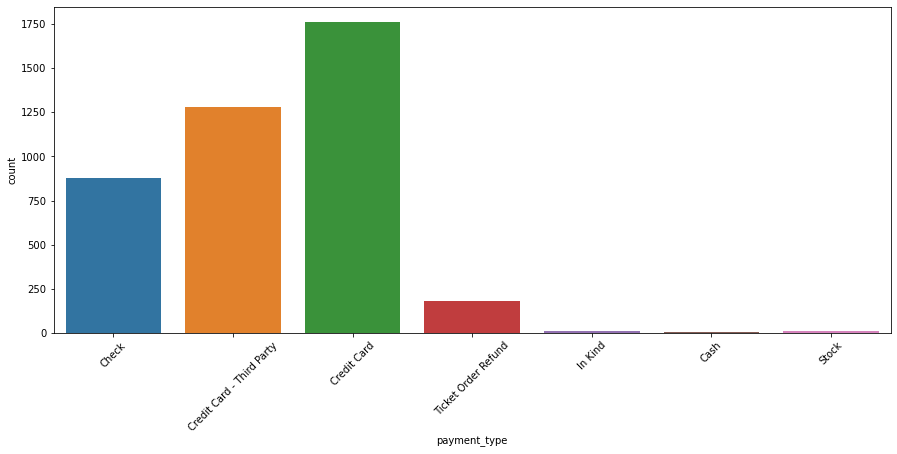

In [64]:
plt.figure(figsize=[15,6])
sns.countplot(aFund.payment_type)
plt.xticks(rotation=45)

In [65]:
#Remove the In Kind donations as they are not driven by campaigns that raise money for the annual fund:
aFund = aFund[aFund.payment_type != 'In Kind']

In [66]:
#Did it work?
aFund[aFund.payment_type == 'In Kind']

Empty DataFrame
Columns: [account_id, account_record_type, do_not_mail, donation_record_type, amount, close_date, email_opt_out, mailing_city, mailing_state, mailing_zip, fund, frequency, payment_type, pledge_amount, payment_schedule, type, stage, fiscal_year, fiscal_quarter, last_donation_amount, last_donation_date, close_month, anonymous, card_type, check_date, grant_amount, matching_amount, first_donation_date, lifetime_donation_total_amount, lifetime_donation_count, lifetime_subscription_purchase_total, lifetime_single_ticket_purchase_total, lifetime_order_count]
Index: []

Because the donors who gave the in kind donations also donated money, this in kind record removal doesn't impact the acquired donor calculation above.

In [67]:
aFund.shape

(4111, 33)

In [68]:
#Review updated summary statistics
aFund.describe(include = 'all').T

count unique                  top  freq  \
account_id                             4111   1562      0013600000VKRpL    54   
account_record_type                    4111      2           Individual  2526   
do_not_mail                            4111      2                    0  4081   
donation_record_type                   4111      3             Donation  2896   
amount                                 4111    NaN                  NaN   NaN   
close_date                             4111   1023  2018-04-19 00:00:00   226   
email_opt_out                          4111      2                    0  3801   
mailing_city                           3854    204             Richmond  2023   
mailing_state                          3853     30                   VA  3651   
mailing_zip                            3854    602                23220   324   
fund                                   4111      1          Annual Fund  4111   
frequency                              1339      2               Single  1227   
payment_type                           4111      6          Credit Card  1758   
pledge_amount                             0    NaN                  NaN   NaN   
payment_schedule                          0      0                  NaN   NaN   
type                                   2151     13         Give OUT Day   845   
stage                                  4111      3               Posted  4107   
fiscal_year                            4111      6                 2020  1412   
fiscal_quarter                         4111     23              Q4-2020   824   
last_donation_amount                   4110    NaN                  NaN   NaN   
last_donation_date                     4111    586  2020-12-01 00:00:00   434   
close_month                            4111     12                   12   880   
anonymous                              4111      2                    0  4060   
card_type                              1698      4                 Visa   982   
check_date                              893    501  2019-12-03 00:00:00    63   
grant_amount                              1    NaN                  NaN   NaN   
matching_amount                        4111    NaN                  NaN   NaN   
first_donation_date                    4111    762  2020-06-30 00:00:00   115   
lifetime_donation_total_amount         4111    NaN                  NaN   NaN   
lifetime_donation_count                4111    NaN                  NaN   NaN   
lifetime_subscription_purchase_total   4108    NaN                  NaN   NaN   
lifetime_single_ticket_purchase_total  4108    NaN                  NaN   NaN   
lifetime_order_count                   4108    NaN                  NaN   NaN   

                                           first       last     mean      std  \
account_id                                   NaT        NaT      NaN      NaN   
account_record_type                          NaT        NaT      NaN      NaN   
do_not_mail                                  NaT        NaT      NaN      NaN   
donation_record_type                         NaT        NaT      NaN      NaN   
amount                                       NaT        NaT  129.751  379.034   
close_date                            2015-07-09 2021-01-20      NaN      NaN   
email_opt_out                                NaT        NaT      NaN      NaN   
mailing_city                                 NaT        NaT      NaN      NaN   
mailing_state                                NaT        NaT      NaN      NaN   
mailing_zip                                  NaT        NaT      NaN      NaN   
fund                                         NaT        NaT      NaN      NaN   
frequency                                    NaT        NaT      NaN      NaN   
payment_type                                 NaT        NaT      NaN      NaN   
pledge_amount                                NaT        NaT      NaN      NaN   
payment_schedule                             NaT        NaT      NaN

*Only 193 of 4111 (4.69%) individual/household donations were made to funds others than 'Annual Fund'*

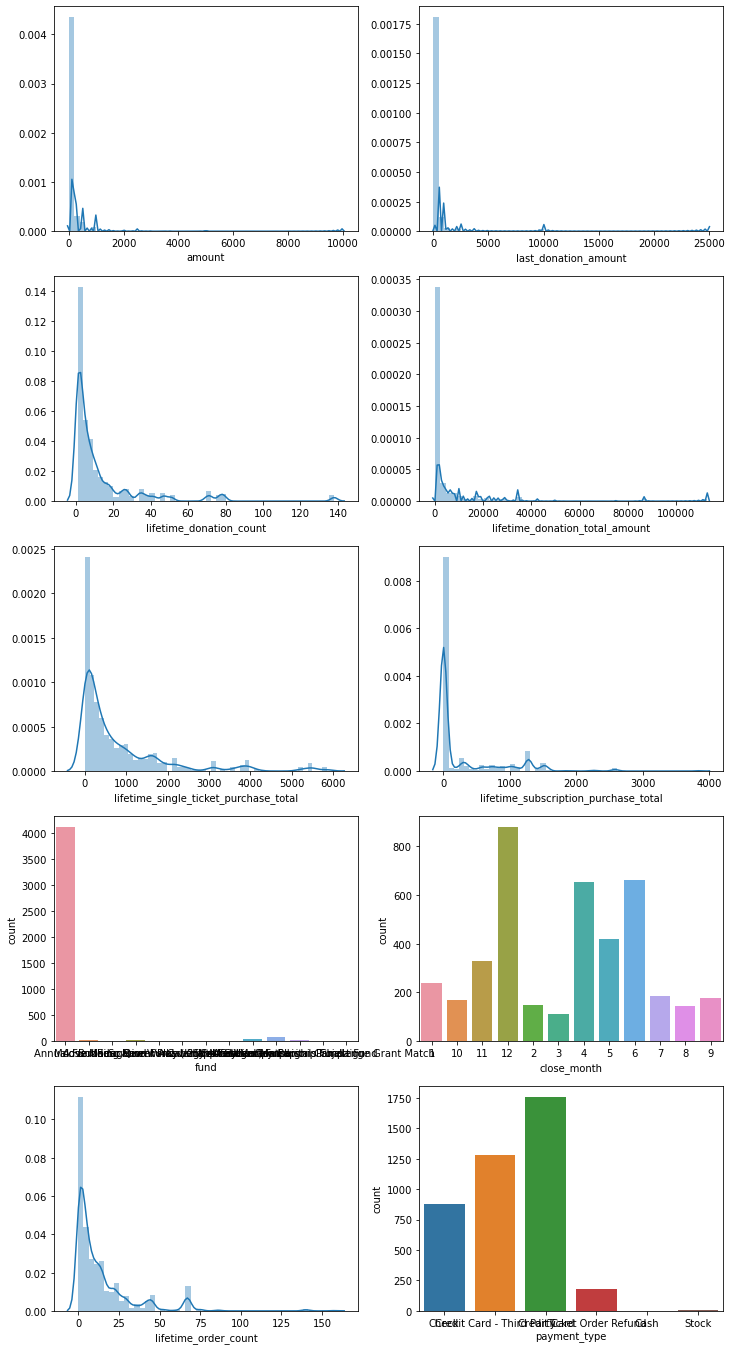

In [69]:
figure, ax = plt.subplots(5,2, figsize=(12,24))

#See the distrubution of the data

sns.distplot(aFund['amount'],ax= ax[0,0])
sns.distplot(aFund['last_donation_amount'],ax=ax[0,1])
sns.distplot(aFund['lifetime_donation_count'],ax= ax[1,0])
sns.distplot(aFund['lifetime_donation_total_amount'],ax= ax[1,1])
sns.distplot(aFund['lifetime_single_ticket_purchase_total'],ax= ax[2,0])
sns.distplot(aFund['lifetime_subscription_purchase_total'],ax=ax[2,1])
sns.countplot(donations['fund'],ax= ax[3,0])
sns.countplot(aFund['close_month'],ax= ax[3,1])
sns.distplot(aFund['lifetime_order_count'],ax= ax[4,0])
sns.countplot(aFund['payment_type'],ax=ax[4,1])


plt.show() #optional line -- eliminates strange text output before plots

Text(0.5, 1.0, 'Donation Amount Distribution')

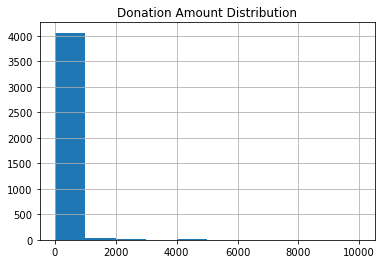

In [70]:
aFund['amount'].hist().plot(kind='bar')
plt.title('Donation Amount Distribution')

In [71]:
#import plotly.graph_objects as go # To Generate Graphs
#import plotly.express as px # To Generate box plot for statistical representation
fig = px.box(aFund, x='fiscal_year', y='amount')
fig.show()

In [72]:
#pd.set_option('display.max_rows', None)
aFund.groupby('close_date')['amount'].sum().reset_index().sort_values('close_date')

close_date  amount
0    2015-07-09  200.00
1    2015-07-14  275.00
2    2015-08-03  620.00
3    2015-08-10  125.00
4    2015-08-11  200.00
...         ...     ...
1018 2021-01-16  130.00
1019 2021-01-17  138.75
1020 2021-01-18   89.00
1021 2021-01-19   44.00
1022 2021-01-20   10.00

[1023 rows x 2 columns]

Text(0.5, 1.0, 'Annual Fund Donation Totals Per Day')

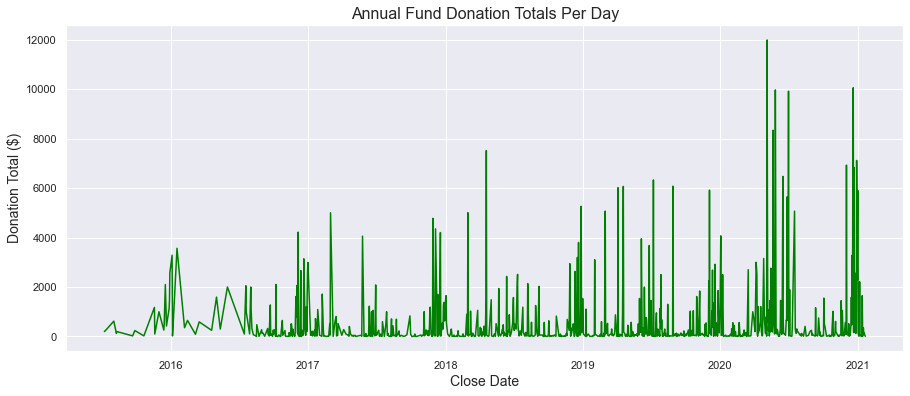

In [73]:
#Plot the daily annual fund donation totals

#set style
sns.set(style='darkgrid')

#Adjust the plot size
plt.figure(figsize=[15,6])

#Line Plot
sns.lineplot(x=aFund.groupby('close_date')['amount'].sum().index, y=aFund.groupby('close_date')['amount'].sum().values, color='green')

#Assign axis labels:
plt.ylabel('Donation Total ($)', fontsize=14)
plt.xlabel('Close Date', fontsize=14)
plt.title('Annual Fund Donation Totals Per Day', fontsize=16)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Donation Amounts By Close Date (FY2016 - FY2021)')

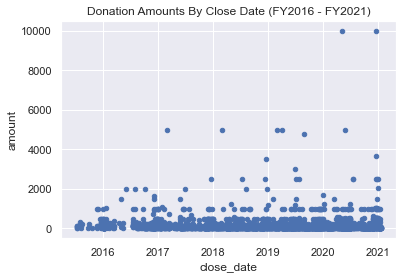

In [74]:
#Visualize donations over time
dons = aFund.plot.scatter('close_date', 'amount')
plt.title("Donation Amounts By Close Date (FY2016 - FY2021)")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


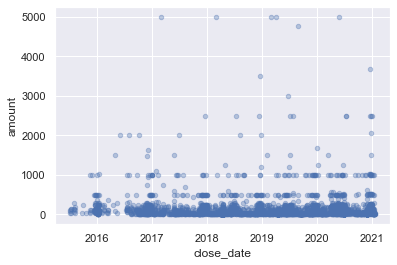

In [75]:
aFund[aFund.amount < 6000].plot('close_date', 'amount', kind='scatter', alpha=.35)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


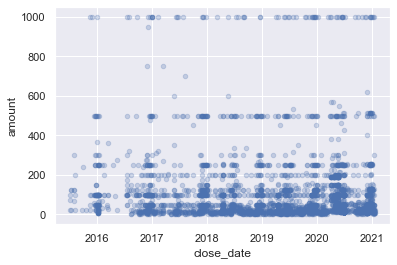

In [76]:
aFund[aFund.amount < 1001].plot('close_date', 'amount', kind='scatter', alpha=.25)

In [77]:
aFund.groupby('close_date')['amount'].sum()

close_date
2015-07-09    200.00
2015-07-14    275.00
2015-08-03    620.00
2015-08-10    125.00
2015-08-11    200.00
               ...  
2021-01-16    130.00
2021-01-17    138.75
2021-01-18     89.00
2021-01-19     44.00
2021-01-20     10.00
Name: amount, Length: 1023, dtype: float64

Text(0.5, 1.0, 'Annual Fund Donation Totals Per Day')

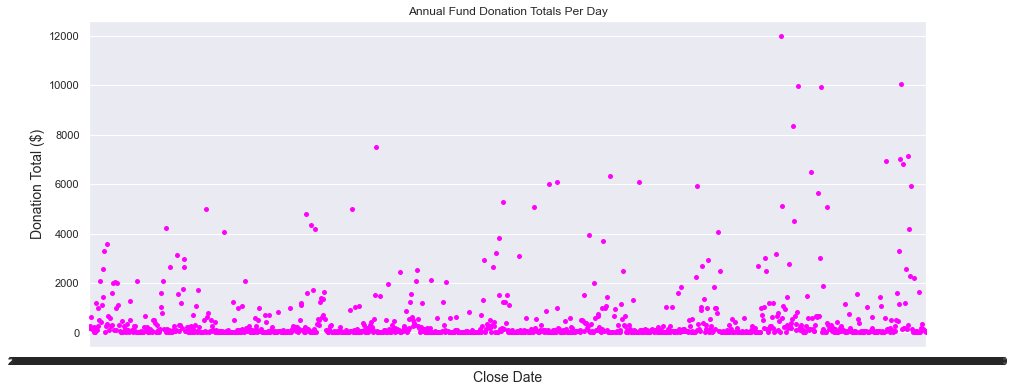

In [78]:
#Plot the daily annual fund donation totals

#set style
sns.set(style='darkgrid')

#Adjust the plot size
plt.figure(figsize=[15,6])

#Line Plot
sns.swarmplot(x=aFund.groupby('close_date')['amount'].sum().index, y=aFund.groupby('close_date')['amount'].sum().values, color='magenta')

#Assign axis labels:
plt.ylabel('Donation Total ($)', fontsize=14)
plt.xlabel('Close Date', fontsize=14)
plt.title('Annual Fund Donation Totals Per Day')

In [79]:
aFund.groupby('close_date')['amount'].sum().sort_values()

close_date
2017-10-03        1.00
2017-02-17        1.00
2020-02-23        1.00
2018-01-11        1.00
2019-01-08        1.00
                ...   
2020-05-20     8335.80
2020-06-30     9911.50
2020-05-26     9963.65
2020-12-19    10050.00
2020-05-04    11982.94
Name: amount, Length: 1023, dtype: float64

Text(0.5, 1.0, 'Donation Amount Distribution')

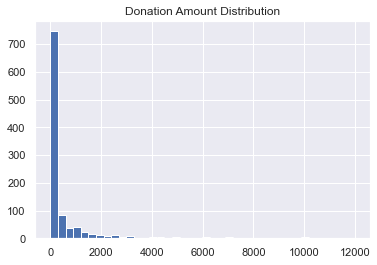

In [80]:
ax = aFund.groupby('close_date')['amount'].sum().hist(bins = 40).plot(kind='bar')
plt.title('Donation Amount Distribution')

In [81]:
#The mean gift of all donations made from 7/1/2015 to 1/10/2021 is
aFund.describe().loc['mean', 'amount']

129.75079785940162

In [82]:
#The median gift of all donations made from 7/1/2015 to 1/10/2021 is
aFund.describe().loc['50%', 'amount']

50.0

In [83]:
#The mean gift of all donations made from 7/1/2015 to 1/10/2021 is
aFund.describe().loc['max', 'amount']

10000.0

# Examine Individual Donor Engagement Patterns

Determine which and how many individual/household donor accounts made annual fund contributions in each of the fiscal year (2016-2021). Additionally, show how many donations each account made, along with their sums, per fiscal year.

In [84]:
#How many annual fund contributions did each donor make over the period?
aFund.groupby(['account_id'])['fiscal_year'].count().sort_values(ascending=False)

account_id
0013600000VKRpL    54
0013600000VKQlO    45
0013600000VKRsl    44
0013600000VKQmI    44
0013600000VKR7J    44
                   ..
0013600000s3kyx     1
0013600000sKpXg     1
0013600000vU05u     1
0013600000vVQ0W     1
0011R00001yzm4S     1
Name: fiscal_year, Length: 1562, dtype: int64

In [85]:
aFund.groupby(['account_id'])['fiscal_year'].count().sort_values(ascending=False).values

array([54, 45, 44, ...,  1,  1,  1])

In [86]:
aFund.groupby(['fiscal_year', 'account_id']).count().sort_values(by=['fiscal_year', 'account_id'])

account_record_type  do_not_mail  \
fiscal_year account_id                                          
2016        0013600000VKQkx                    1            1   
            0013600000VKQl1                    1            1   
            0013600000VKQl3                    1            1   
            0013600000VKQl6                    1            1   
            0013600000VKQlH                    1            1   
...                                          ...          ...   
2021        0013p000025LmcD                    1            1   
            0013p000025LoAk                    1            1   
            0013p000025MPPB                    1            1   
            0013p000025Mgo0                    1            1   
            0013p000025Mmo1                    1            1   

                             donation_record_type  amount  close_date  \
fiscal_year account_id                                                  
2016        0013600000VKQkx                     1       1           1   
            0013600000VKQl1                     1       1           1   
            0013600000VKQl3                     1       1           1   
            0013600000VKQl6                     1       1           1   
            0013600000VKQlH                     1       1           1   
...                                           ...     ...         ...   
2021        0013p000025LmcD                     1       1           1   
            0013p000025LoAk                     1       1           1   
            0013p000025MPPB                     1       1           1   
            0013p000025Mgo0                     1       1           1   
            0013p000025Mmo1                     1       1           1   

                             email_opt_out  mailing_city  mailing_state  \
fiscal_year account_id                                                    
2016        0013600000VKQkx              1             1              1   
            0013600000VKQl1              1             1              1   
            0013600000VKQl3              1             1              1   
            0013600000VKQl6              1             1              1   
            0013600000VKQlH              1             1              1   
...                                    ...           ...            ...   
2021        0013p000025LmcD              1             1              1   
            0013p000025LoAk              1             1              1   
            0013p000025MPPB              1             1              1   
            0013p000025Mgo0              1             1              1   
            0013p000025Mmo1              1             1              1   

                             mailing_zip  fund  frequency  payment_type  \
fiscal_year account_id                                                    
2016        0013600000VKQkx            1     1          0             1   
            0013600000VKQl1            1     1          0             1   
            0013600000VKQl3            1     1          0             1   
            0013600000VKQl6            1     1          0             1   
            0013600000VKQlH            1     1          0             1   
...                                  ...   ...        ...           ...   
2021        0013p000025LmcD            1     1          0             1   
            0013p000025LoAk            1     1          0             1   
            0013p000025MPPB            1     1          0             1   
            0013p000025Mgo0            1     1          0             1   
            0013p000025Mmo1            1     1          0             1   

                             pledge_amount  payment_schedule  type  stage  \
fiscal_year account_id                                                      
2016        0013600000VKQkx              0                 0     1      1   
            0013600000VKQl1              0        

In [87]:
#How many annual fund donations were made in each fiscal year over the analysis period
aFund.groupby(['fiscal_year'])['account_id'].count()

fiscal_year
2016     149
2017     399
2018     819
2019     759
2020    1412
2021     573
Name: account_id, dtype: int64

In [88]:
aFund.groupby(['fiscal_year'])['amount'].count()

fiscal_year
2016     149
2017     399
2018     819
2019     759
2020    1412
2021     573
Name: amount, dtype: int64

In [89]:
aFund[aFund['fiscal_year'] == '2016'].reset_index(drop=True)

account_id account_record_type do_not_mail donation_record_type  \
0    0013600000VKROV          Individual           0       Pledge Payment   
1    0013600000VKQnX           Household           0             Donation   
2    0013600000VKQqB           Household           0             Donation   
3    0013600000VKRT5          Individual           0             Donation   
4    0013600000VKQls           Household           0             Donation   
..               ...                 ...         ...                  ...   
144  0013600000VKQnz           Household           0             Donation   
145  0013600000VKQnz           Household           0             Donation   
146  0013600000VKQlO          Individual           0       Pledge Payment   
147  0013600000VKQlO          Individual           0       Pledge Payment   
148  0013600000VKQlO          Individual           0       Pledge Payment   

     amount close_date email_opt_out        mailing_city mailing_state  \
0      50.0 2015-12-30             0  North Chesterfield            VA   
1      40.0 2016-03-07             0    Woodberry Forest            VA   
2     100.0 2015-12-14             0            Richmond            VA   
3       5.0 2016-01-05             0      Fredericksburg            VA   
4      50.0 2016-03-07             0            Richmond            VA   
..      ...        ...           ...                 ...           ...   
144    25.0 2015-10-22             0            Richmond            VA   
145    25.0 2015-11-19             0            Richmond            VA   
146   125.0 2015-07-14             0            Richmond            VA   
147   125.0 2015-08-03             0            Richmond            VA   
148   125.0 2015-08-03             0            Richmond            VA   

    mailing_zip         fund frequency payment_type  pledge_amount  \
0    23235-5161  Annual Fund       NaN        Check            NaN   
1         22989  Annual Fund       NaN        Check            NaN   
2         23221  Annual Fund       NaN        Check            NaN   
3    22405-3042  Annual Fund       NaN  Credit Card            NaN   
4         23219  Annual Fund       NaN        Check            NaN   
..          ...          ...       ...          ...            ...   
144       23220  Annual Fund       NaN  Credit Card            NaN   
145       23220  Annual Fund       NaN  Credit Card            NaN   
146  23225-3502  Annual Fund       NaN        Check            NaN   
147  23225-3502  Annual Fund       NaN        Check            NaN   
148  23225-3502  Annual Fund       NaN        Check            NaN   

    payment_schedule            type   stage fiscal_year fiscal_quarter  \
0                NaN  Pledge Payment  Posted        2016        Q2-2016   
1                NaN            Gift  Posted        2016        Q3-2016   
2                NaN            Gift  Posted        2016        Q2-2016   
3                NaN            Gift  Posted        2016        Q3-2016   
4                NaN            Gift  Posted        2016        Q3-2016   
..               ...             ...     ...         ...            ...   
144              NaN            Gift  Posted        2016        Q2-2016   
145              NaN            Gift  Posted        2016        Q2-2016   
146              NaN  Pledge Payment  Posted        2016        Q1-2016   
147              NaN  Pledge Payment  Posted        2016        Q1-2016   
148              NaN  Pledge Payment  Posted        2016        Q1-2016   

     last_donation_amount   last_donation_date close_month anonymous  \
0                     NaN  2015-12-30 00:00:00          12         0   
1                    40.0  2016-03-07 00:00:00           3         0   
2                   100.0  2015-12-14 00:00:00          12         0   
3                     5.0  2016-01-05 00:00:00           1         0   
4                    50.0  2016-03-07 00:00:00           3         0   
..                    

In [90]:
#How many annual fund donors by fy?
aFund.groupby(['fiscal_year'])['account_id'].nunique()

fiscal_year
2016    136
2017    312
2018    473
2019    482
2020    892
2021    406
Name: account_id, dtype: int64

In [91]:
aFund[aFund['fiscal_year'] == '2016'].drop_duplicates('account_id').reset_index(drop=True)

account_id account_record_type do_not_mail donation_record_type  \
0    0013600000VKROV          Individual           0       Pledge Payment   
1    0013600000VKQnX           Household           0             Donation   
2    0013600000VKQqB           Household           0             Donation   
3    0013600000VKRT5          Individual           0             Donation   
4    0013600000VKQls           Household           0             Donation   
..               ...                 ...         ...                  ...   
131  0013600000VKRh3          Individual           0             Donation   
132  0013600000VKQqT           Household           0       Pledge Payment   
133  0013600000VKQlY          Individual           0             Donation   
134  0013600000VKQnz           Household           0             Donation   
135  0013600000VKQlO          Individual           0       Pledge Payment   

     amount close_date email_opt_out        mailing_city mailing_state  \
0      50.0 2015-12-30             0  North Chesterfield            VA   
1      40.0 2016-03-07             0    Woodberry Forest            VA   
2     100.0 2015-12-14             0            Richmond            VA   
3       5.0 2016-01-05             0      Fredericksburg            VA   
4      50.0 2016-03-07             0            Richmond            VA   
..      ...        ...           ...                 ...           ...   
131    50.0 2016-01-05             1            RICHMOND            VA   
132   200.0 2015-08-11             0          Glen Allen            VA   
133   276.9 2016-05-12             0             Henrico            VA   
134    25.0 2015-07-14             0            Richmond            VA   
135   125.0 2015-07-14             0            Richmond            VA   

    mailing_zip         fund frequency payment_type  pledge_amount  \
0    23235-5161  Annual Fund       NaN        Check            NaN   
1         22989  Annual Fund       NaN        Check            NaN   
2         23221  Annual Fund       NaN        Check            NaN   
3    22405-3042  Annual Fund       NaN  Credit Card            NaN   
4         23219  Annual Fund       NaN        Check            NaN   
..          ...          ...       ...          ...            ...   
131  23225-1327  Annual Fund       NaN  Credit Card            NaN   
132  23060-6199  Annual Fund       NaN        Check            NaN   
133       23228  Annual Fund       NaN        Check            NaN   
134       23220  Annual Fund       NaN  Credit Card            NaN   
135  23225-3502  Annual Fund       NaN        Check            NaN   

    payment_schedule            type   stage fiscal_year fiscal_quarter  \
0                NaN  Pledge Payment  Posted        2016        Q2-2016   
1                NaN            Gift  Posted        2016        Q3-2016   
2                NaN            Gift  Posted        2016        Q2-2016   
3                NaN            Gift  Posted        2016        Q3-2016   
4                NaN            Gift  Posted        2016        Q3-2016   
..               ...             ...     ...         ...            ...   
131              NaN            Gift  Posted        2016        Q3-2016   
132              NaN  Pledge Payment  Posted        2016        Q1-2016   
133              NaN            Gift  Posted        2016        Q4-2016   
134              NaN            Gift  Posted        2016        Q1-2016   
135              NaN  Pledge Payment  Posted        2016        Q1-2016   

     last_donation_amount   last_donation_date close_month anonymous  \
0                     NaN  2015-12-30 00:00:00          12         0   
1                    40.0  2016-03-07 00:00:00           3         0   
2                   100.0  2015-12-14 00:00:00          12         0   
3                     5.0  2016-01-05 00:00:00           1         0   
4                    50.0  2016-03-07 00:00:00           3         0   
..                    

In [92]:
#What's the average number of annual fund gifts given in each fiscal year from FY2016- FY2021 (current date of)
aFund.groupby(['fiscal_year'])['account_id'].count().values.mean()

685.1666666666666

In [93]:
#average before last fiscal year
aFund.groupby(['fiscal_year'])['account_id'].count().values[:4].mean()

531.5

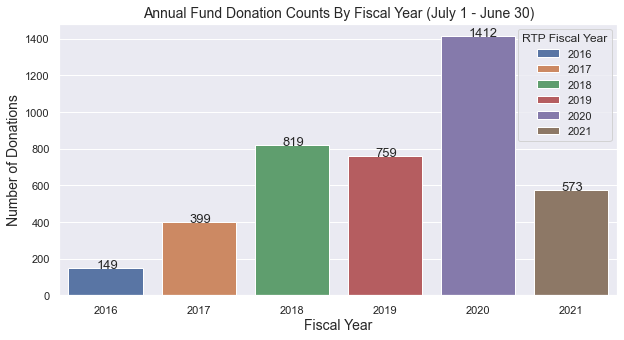

In [94]:
#Plot the annual fund means by fiscal year

#set style
sns.set(style='darkgrid')

#Adjust the plot size
plt.figure(figsize=[10,5])

#Line Plot
g = sns.barplot(x=aFund.groupby(['fiscal_year'])['account_id'].count().index, y=aFund.groupby(['fiscal_year'])['account_id'].count().values, 
            hue=aFund.groupby(['fiscal_year'])['amount'].count().loc[['2016', '2017', '2018', '2019', '2020', '2021']].index,
            dodge=False)
g.legend().set_title('RTP Fiscal Year')

#Assign axis labels:
plt.ylabel('Number of Donations', fontsize=14)
plt.xlabel('Fiscal Year', fontsize=14)
plt.title('Annual Fund Donation Counts By Fiscal Year (July 1 - June 30)', fontsize=14)

#Annotate
# This is the location for the annotated text
i = 1.0
j = 0
# Annotating the bar plot with the values (means by fy)
for i in range(len(['2016', '2017', '2018', '2019', '2020', '2021'])):
    plt.annotate(round(aFund.groupby(['fiscal_year'])['account_id'].count().loc[['2016', '2017', '2018', '2019', '2020', '2021']], 2).values[i],
                 (-0.1 + i, aFund.groupby(['fiscal_year'])['account_id'].count().loc[['2016', '2017', '2018', '2019', '2020', '2021']].values[i] + j), 
                 fontsize=13)
    
plt.show()

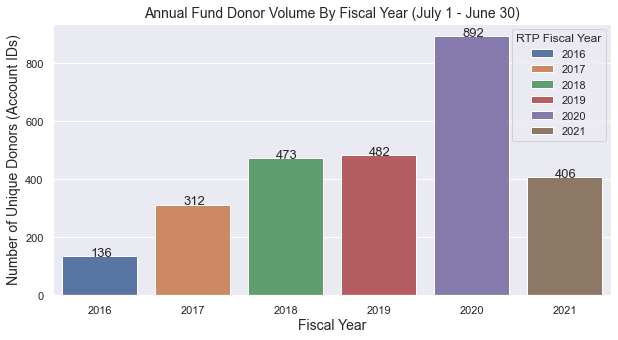

In [95]:
#Plot the annual fund means by fiscal year

#set style
sns.set(style='darkgrid')

#Adjust the plot size
plt.figure(figsize=[10,5])

#Line Plot
g = sns.barplot(x=aFund.groupby(['fiscal_year'])['account_id'].nunique().index, y=aFund.groupby(['fiscal_year'])['account_id'].nunique().values, 
            hue=aFund.groupby(['fiscal_year'])['account_id'].nunique().loc[['2016', '2017', '2018', '2019', '2020', '2021']].index,
            dodge=False)
g.legend().set_title('RTP Fiscal Year')

#Assign axis labels:
plt.ylabel('Number of Unique Donors (Account IDs)', fontsize=14)
plt.xlabel('Fiscal Year', fontsize=14)
plt.title('Annual Fund Donor Volume By Fiscal Year (July 1 - June 30)', fontsize=14)

#Annotate
# This is the location for the annotated text
i = 1.0
j = 0
# Annotating the bar plot with the values (means by fy)
for i in range(len(['2016', '2017', '2018', '2019', '2020', '2021'])):
    plt.annotate(round(aFund.groupby(['fiscal_year'])['account_id'].nunique().loc[['2016', '2017', '2018', '2019', '2020', '2021']], 2).values[i],
                 (-0.1 + i, aFund.groupby(['fiscal_year'])['account_id'].nunique().loc[['2016', '2017', '2018', '2019', '2020', '2021']].values[i] + j), 
                 fontsize=13)
    
plt.show()

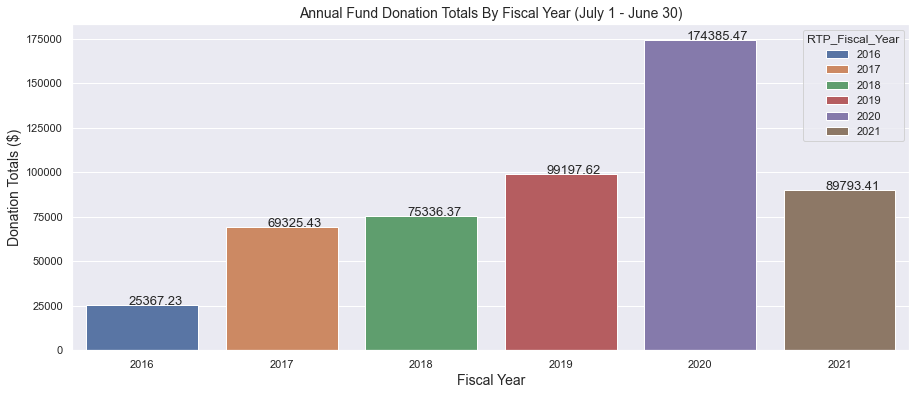

In [96]:
#Plot the annual fund means by fiscal year

#set style
sns.set(style='darkgrid')

#Adjust the plot size
plt.figure(figsize=[15,6])

#Line Plot
g = sns.barplot(x=aFund.groupby(['fiscal_year'])['amount'].sum().index, y=aFund.groupby(['fiscal_year'])['amount'].sum().values, 
            hue=aFund.groupby(['fiscal_year'])['amount'].sum().loc[['2016', '2017', '2018', '2019', '2020', '2021']].index,
            dodge=False)
g.legend().set_title("RTP_Fiscal_Year")

#Assign axis labels:
plt.ylabel('Donation Totals ($)', fontsize=14)
plt.xlabel('Fiscal Year', fontsize=14)
plt.title('Annual Fund Donation Totals By Fiscal Year (July 1 - June 30)', fontsize=14)

#Annotate
# This is the location for the annotated text
i = 1.0
j = 10
# Annotating the bar plot with the values (means by fy)
for i in range(len(np.sort(aFund.fiscal_year.unique()))):
    plt.annotate(round(aFund.groupby(['fiscal_year'])['amount'].sum().loc[['2016', '2017', '2018', '2019', '2020', '2021']], 2).values[i],
                 (-0.1 + i, aFund.groupby(['fiscal_year'])['amount'].sum().loc[['2016', '2017', '2018', '2019', '2020', '2021']].values[i] + j), 
                 fontsize=13)
    
plt.show()

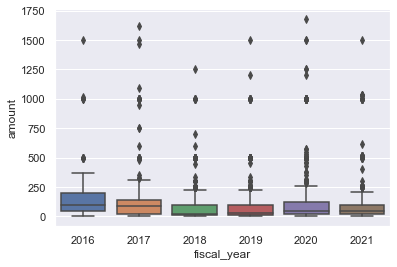

In [97]:
sns.boxplot(x='fiscal_year',y='amount',data=aFund[aFund.amount <2000])

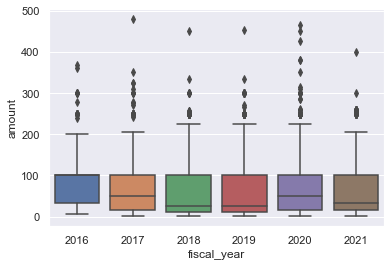

In [98]:
sns.boxplot(x='fiscal_year',y='amount',data=aFund[aFund.amount <500])

In [99]:
aFund.groupby(['fiscal_year'])['amount'].median()

fiscal_year
2016    100.0
2017     93.5
2018     25.0
2019     27.0
2020     50.0
2021     50.0
Name: amount, dtype: float64

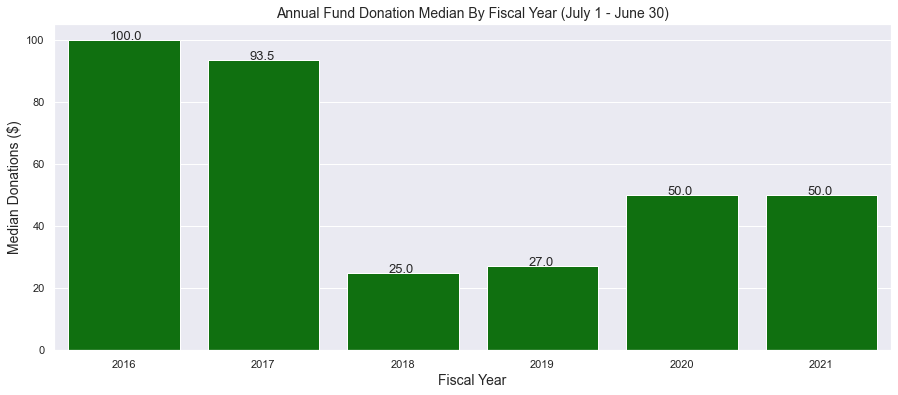

In [100]:
#Plot the annual fund medians by fiscal year

#set style
sns.set(style='darkgrid')

#Adjust the plot size
plt.figure(figsize=[15,6])

#Line Plot
sns.barplot(x=aFund.groupby(['fiscal_year'])['amount'].median().index, y=aFund.groupby(['fiscal_year'])['amount'].median().values, color='green')

#Assign axis labels:
plt.ylabel('Median Donations ($)', fontsize=14)
plt.xlabel('Fiscal Year', fontsize=14)
plt.title('Annual Fund Donation Median By Fiscal Year (July 1 - June 30)', fontsize=14)

#Annotate
# This is the location for the annotated text
i = 1.0
j = 0
# Annotating the bar plot with the values (means by fy)
for i in range(len(np.sort(aFund.fiscal_year.unique()))):
    plt.annotate(round(aFund.groupby(['fiscal_year'])['amount'].median().loc[np.sort(aFund.fiscal_year.unique())], 2).values[i],
                 (-0.1 + i, aFund.groupby(['fiscal_year'])['amount'].median().loc[np.sort(aFund.fiscal_year.unique())].values[i] + j), 
                 fontsize=13)
    
plt.show()

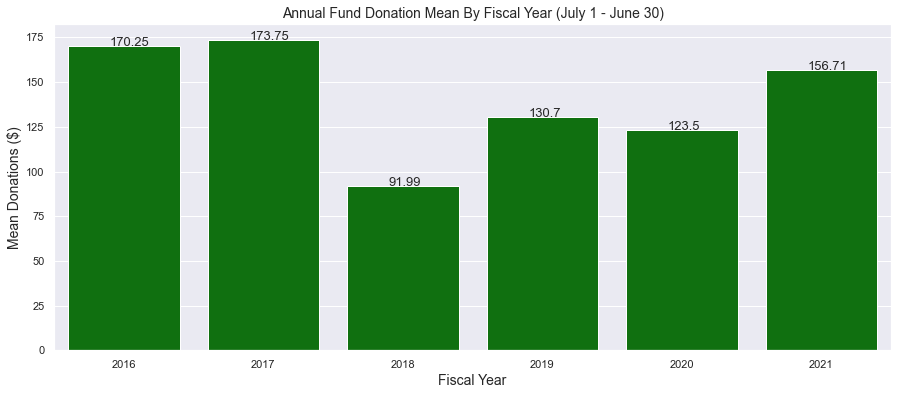

In [101]:
#Plot the annual fund medians by fiscal year

#set style
sns.set(style='darkgrid')

#Adjust the plot size
plt.figure(figsize=[15,6])

#Line Plot
sns.barplot(x=aFund.groupby(['fiscal_year'])['amount'].mean().index, y=aFund.groupby(['fiscal_year'])['amount'].mean().values, color='green')

#Assign axis labels:
plt.ylabel('Mean Donations ($)', fontsize=14)
plt.xlabel('Fiscal Year', fontsize=14)
plt.title('Annual Fund Donation Mean By Fiscal Year (July 1 - June 30)', fontsize=14)

#Annotate
# This is the location for the annotated text
i = 1.0
j = 0
# Annotating the bar plot with the values (means by fy)
for i in range(len(np.sort(aFund.fiscal_year.unique()))):
    plt.annotate(round(aFund.groupby(['fiscal_year'])['amount'].mean().loc[np.sort(aFund.fiscal_year.unique())], 2).values[i],
                 (-0.1 + i, aFund.groupby(['fiscal_year'])['amount'].mean().loc[np.sort(aFund.fiscal_year.unique())].values[i] + j), 
                 fontsize=13)
    
plt.show()

In [102]:
fq_wfy = pd.DataFrame(aFund.groupby(['fiscal_quarter'])['amount'].mean().loc[['Q1-2016', 'Q2-2016', 'Q3-2016','Q4-2016', 'Q1-2017', 'Q2-2017', 'Q3-2017','Q4-2017','Q1-2018', 'Q2-2018', 'Q3-2018','Q4-2018', 'Q1-2019', 'Q2-2019', 'Q3-2019','Q4-2019',
                     'Q1-2020', 'Q2-2020', 'Q3-2020','Q4-2020', 'Q1-2021', 'Q2-2021', 'Q3-2021']])
#Add 'FY' to year to clarify the legend labels
fq_wfy['fiscal_year'] = np.concatenate([np.repeat('FY 2016', 4), np.repeat('FY 2017', 4), np.repeat('FY 2018', 4), np.repeat('FY 2019', 4), np.repeat('FY 2020', 4), np.repeat('FY 2021', 3)])
fq_wfy['fiscal_year']#Create fiscal year array for coloring bars based on fiscal year

fiscal_quarter
Q1-2016    FY 2016
Q2-2016    FY 2016
Q3-2016    FY 2016
Q4-2016    FY 2016
Q1-2017    FY 2017
Q2-2017    FY 2017
Q3-2017    FY 2017
Q4-2017    FY 2017
Q1-2018    FY 2018
Q2-2018    FY 2018
Q3-2018    FY 2018
Q4-2018    FY 2018
Q1-2019    FY 2019
Q2-2019    FY 2019
Q3-2019    FY 2019
Q4-2019    FY 2019
Q1-2020    FY 2020
Q2-2020    FY 2020
Q3-2020    FY 2020
Q4-2020    FY 2020
Q1-2021    FY 2021
Q2-2021    FY 2021
Q3-2021    FY 2021
Name: fiscal_year, dtype: object

In [103]:
fq_wfy

amount fiscal_year
fiscal_quarter                        
Q1-2016         112.333333     FY 2016
Q2-2016         202.429434     FY 2016
Q3-2016         117.454267     FY 2016
Q4-2016         690.733333     FY 2016
Q1-2017         218.563542     FY 2017
Q2-2017         165.669559     FY 2017
Q3-2017         190.014265     FY 2017
Q4-2017         153.377468     FY 2017
Q1-2018         116.994333     FY 2018
Q2-2018         148.947094     FY 2018
Q3-2018         148.929268     FY 2018
Q4-2018          54.574367     FY 2018
Q1-2019         160.736239     FY 2019
Q2-2019         157.914179     FY 2019
Q3-2019         138.272143     FY 2019
Q4-2019         103.663675     FY 2019
Q1-2020         139.875714     FY 2020
Q2-2020         120.538982     FY 2020
Q3-2020         126.760331     FY 2020
Q4-2020         120.432621     FY 2020
Q1-2021         143.159213     FY 2021
Q2-2021         167.249163     FY 2021
Q3-2021          95.094444     FY 2021

In [104]:
aFund.groupby(['fiscal_quarter'])['amount'].sum()

fiscal_quarter
Q1-2016     1685.00
Q1-2017    10491.05
Q1-2018     7019.66
Q1-2019    17520.25
Q1-2020    25457.38
Q1-2021    12741.17
Q2-2016    10728.76
Q2-2017    33796.59
Q2-2018    30236.26
Q2-2019    31740.75
Q2-2020    34353.61
Q2-2021    71917.14
Q3-2016     8809.07
Q3-2017    12920.97
Q3-2018    12212.20
Q3-2019    13550.67
Q3-2020    15338.00
Q3-2021     5135.10
Q4-2016     4144.40
Q4-2017    12116.82
Q4-2018    25868.25
Q4-2019    36385.95
Q4-2020    99236.48
Name: amount, dtype: float64

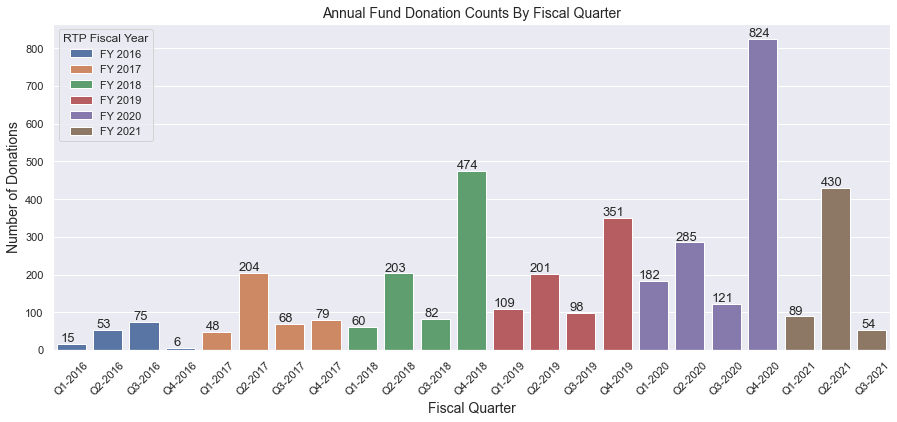

In [105]:
#Plot the annual fund totals by fiscal quarter

#set style
sns.set(style='darkgrid')

#Adjust the plot size
plt.figure(figsize=[15,6])

#Line Plot
g = sns.barplot(x=aFund.groupby(['fiscal_quarter'])['amount'].count().loc[['Q1-2016', 'Q2-2016', 'Q3-2016','Q4-2016', 'Q1-2017', 'Q2-2017', 'Q3-2017','Q4-2017','Q1-2018', 'Q2-2018', 'Q3-2018','Q4-2018', 'Q1-2019', 'Q2-2019', 'Q3-2019','Q4-2019',
                     'Q1-2020', 'Q2-2020', 'Q3-2020','Q4-2020', 'Q1-2021', 'Q2-2021', 'Q3-2021']].index, 
            y=aFund.groupby(['fiscal_quarter'])['amount'].count().loc[['Q1-2016', 'Q2-2016', 'Q3-2016','Q4-2016', 'Q1-2017', 'Q2-2017', 'Q3-2017','Q4-2017','Q1-2018', 'Q2-2018', 'Q3-2018','Q4-2018', 'Q1-2019', 'Q2-2019', 'Q3-2019','Q4-2019',
                     'Q1-2020', 'Q2-2020', 'Q3-2020','Q4-2020', 'Q1-2021', 'Q2-2021', 'Q3-2021']].values, 
            hue = fq_wfy['fiscal_year'].values,
           dodge=False)
g.legend(loc='upper left').set_title('RTP Fiscal Year')
#Assign axis labels:
plt.ylabel('Number of Donations', fontsize=14)
plt.xlabel('Fiscal Quarter', fontsize=14)
plt.xticks(rotation=45)
plt.title('Annual Fund Donation Counts By Fiscal Quarter', fontsize=14)

#Annotate
# This is the location for the annotated text
i = 1.0
j = 6
# Annotating the bar plot with the values 
for i in range(len(['Q1-2016', 'Q2-2016', 'Q3-2016','Q4-2016', 'Q1-2017', 'Q2-2017', 'Q3-2017','Q4-2017','Q1-2018', 'Q2-2018', 'Q3-2018','Q4-2018', 'Q1-2019', 'Q2-2019', 'Q3-2019','Q4-2019',
                     'Q1-2020', 'Q2-2020', 'Q3-2020','Q4-2020', 'Q1-2021', 'Q2-2021', 'Q3-2021'])):
    plt.annotate(aFund.groupby(['fiscal_quarter'])['amount'].count().loc[['Q1-2016', 'Q2-2016', 'Q3-2016','Q4-2016', 'Q1-2017', 'Q2-2017', 'Q3-2017','Q4-2017','Q1-2018', 'Q2-2018', 'Q3-2018','Q4-2018', 'Q1-2019', 'Q2-2019', 'Q3-2019','Q4-2019',
                     'Q1-2020', 'Q2-2020', 'Q3-2020','Q4-2020', 'Q1-2021', 'Q2-2021', 'Q3-2021']].values[i], (-0.1 + i, aFund.groupby(['fiscal_quarter'])['amount'].count().loc[['Q1-2016', 'Q2-2016', 'Q3-2016','Q4-2016', 'Q1-2017', 'Q2-2017', 'Q3-2017','Q4-2017','Q1-2018', 'Q2-2018', 'Q3-2018','Q4-2018', 'Q1-2019', 'Q2-2019', 'Q3-2019','Q4-2019',
                     'Q1-2020', 'Q2-2020', 'Q3-2020','Q4-2020', 'Q1-2021', 'Q2-2021', 'Q3-2021']].values[i] + j),
                horizontalalignment='center',
                 fontsize=13)

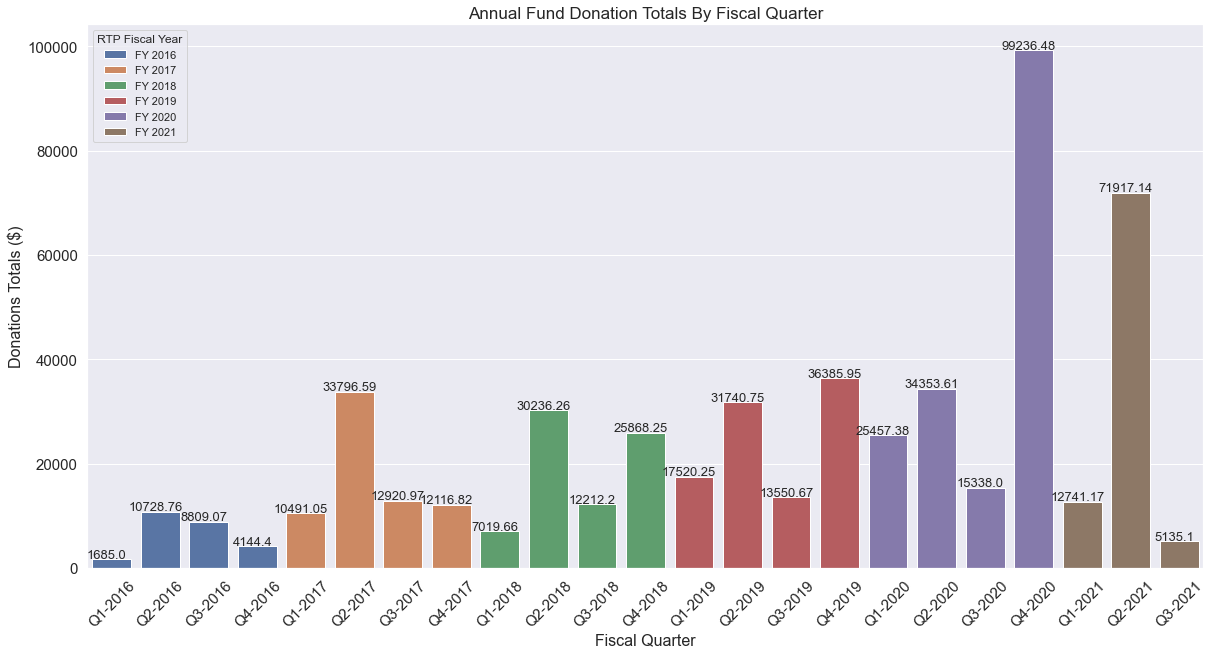

In [106]:
#Plot the annual fund totals by fiscal quarter

#set style
sns.set(style='darkgrid')

#Adjust the plot size
plt.figure(figsize=[20,10])

#Line Plot
g = sns.barplot(x=aFund.groupby(['fiscal_quarter'])['amount'].sum().loc[['Q1-2016', 'Q2-2016', 'Q3-2016','Q4-2016', 'Q1-2017', 'Q2-2017', 'Q3-2017','Q4-2017','Q1-2018', 'Q2-2018', 'Q3-2018','Q4-2018', 'Q1-2019', 'Q2-2019', 'Q3-2019','Q4-2019',
                     'Q1-2020', 'Q2-2020', 'Q3-2020','Q4-2020', 'Q1-2021', 'Q2-2021', 'Q3-2021']].index, 
            y=aFund.groupby(['fiscal_quarter'])['amount'].sum().loc[['Q1-2016', 'Q2-2016', 'Q3-2016','Q4-2016', 'Q1-2017', 'Q2-2017', 'Q3-2017','Q4-2017','Q1-2018', 'Q2-2018', 'Q3-2018','Q4-2018', 'Q1-2019', 'Q2-2019', 'Q3-2019','Q4-2019',
                     'Q1-2020', 'Q2-2020', 'Q3-2020','Q4-2020', 'Q1-2021', 'Q2-2021', 'Q3-2021']].values, 
            hue = fq_wfy['fiscal_year'].values,
           dodge=False)
g.legend(loc='upper left').set_title('RTP Fiscal Year')
#Assign axis labels:
plt.ylabel('Donations Totals ($)', fontsize=16)
plt.xlabel('Fiscal Quarter', fontsize=16)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.title('Annual Fund Donation Totals By Fiscal Quarter', fontsize=17)

#Annotate
# This is the location for the annotated text
i = 1.0
j = 2000
# Annotating the bar plot with the values 
for i in range(len(['Q1-2016', 'Q2-2016', 'Q3-2016','Q4-2016', 'Q1-2017', 'Q2-2017', 'Q3-2017','Q4-2017','Q1-2018', 'Q2-2018', 'Q3-2018','Q4-2018', 'Q1-2019', 'Q2-2019', 'Q3-2019','Q4-2019',
                     'Q1-2020', 'Q2-2020', 'Q3-2020','Q4-2020', 'Q1-2021', 'Q2-2021', 'Q3-2021'])):
    plt.annotate(round(aFund.groupby(['fiscal_quarter'])['amount'].sum().loc[['Q1-2016', 'Q2-2016', 'Q3-2016','Q4-2016', 'Q1-2017', 'Q2-2017', 'Q3-2017','Q4-2017','Q1-2018', 'Q2-2018', 'Q3-2018','Q4-2018', 'Q1-2019', 'Q2-2019', 'Q3-2019','Q4-2019',
                     'Q1-2020', 'Q2-2020', 'Q3-2020','Q4-2020', 'Q1-2021', 'Q2-2021', 'Q3-2021']], 3).values[i], (-0.1 + i, aFund.groupby(['fiscal_quarter'])['amount'].sum().loc[['Q1-2016', 'Q2-2016', 'Q3-2016','Q4-2016', 'Q1-2017', 'Q2-2017', 'Q3-2017','Q4-2017','Q1-2018', 'Q2-2018', 'Q3-2018','Q4-2018', 'Q1-2019', 'Q2-2019', 'Q3-2019','Q4-2019',
                     'Q1-2020', 'Q2-2020', 'Q3-2020','Q4-2020', 'Q1-2021', 'Q2-2021', 'Q3-2021']].values[i] + j), 
                 horizontalalignment='center',
                 verticalalignment='top',
                 fontsize=13)

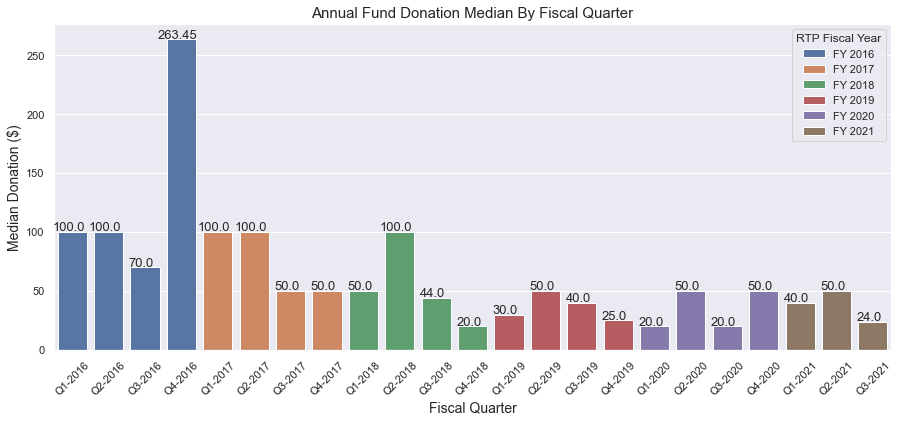

In [107]:
#Plot the annual fund medians by fiscal year

#set style
sns.set(style='darkgrid')

#Adjust the plot size
plt.figure(figsize=[15,6])

#Line Plot
g = sns.barplot(x=aFund.groupby(['fiscal_quarter'])['amount'].median().loc[['Q1-2016', 'Q2-2016', 'Q3-2016','Q4-2016', 'Q1-2017', 'Q2-2017', 'Q3-2017','Q4-2017','Q1-2018', 'Q2-2018', 'Q3-2018','Q4-2018', 'Q1-2019', 'Q2-2019', 'Q3-2019','Q4-2019',
                     'Q1-2020', 'Q2-2020', 'Q3-2020','Q4-2020', 'Q1-2021', 'Q2-2021', 'Q3-2021']].index, 
            y=aFund.groupby(['fiscal_quarter'])['amount'].median().loc[['Q1-2016', 'Q2-2016', 'Q3-2016','Q4-2016', 'Q1-2017', 'Q2-2017', 'Q3-2017','Q4-2017','Q1-2018', 'Q2-2018', 'Q3-2018','Q4-2018', 'Q1-2019', 'Q2-2019', 'Q3-2019','Q4-2019',
                     'Q1-2020', 'Q2-2020', 'Q3-2020','Q4-2020', 'Q1-2021', 'Q2-2021', 'Q3-2021']].values, 
            hue = fq_wfy['fiscal_year'].values,
           dodge=False)
#Add legend title (line below + setting the sns.barplot object equal to 'g' as above)
g.legend().set_title('RTP Fiscal Year')

#Assign axis labels:
plt.ylabel('Median Donation ($)', fontsize=14)
plt.xlabel('Fiscal Quarter', fontsize=14)
plt.xticks(rotation=45)
plt.title('Annual Fund Donation Median By Fiscal Quarter', fontsize=15)

#Annotate
# This is the location for the annotated text
i = 1.0
j = 1
# Annotating the bar plot with the values 
for i in range(len(['Q1-2016', 'Q2-2016', 'Q3-2016','Q4-2016', 'Q1-2017', 'Q2-2017', 'Q3-2017','Q4-2017','Q1-2018', 'Q2-2018', 'Q3-2018','Q4-2018', 'Q1-2019', 'Q2-2019', 'Q3-2019','Q4-2019',
                     'Q1-2020', 'Q2-2020', 'Q3-2020','Q4-2020', 'Q1-2021', 'Q2-2021', 'Q3-2021'])):
    plt.annotate(round(aFund.groupby(['fiscal_quarter'])['amount'].median().loc[['Q1-2016', 'Q2-2016', 'Q3-2016','Q4-2016', 'Q1-2017', 'Q2-2017', 'Q3-2017','Q4-2017','Q1-2018', 'Q2-2018', 'Q3-2018','Q4-2018', 'Q1-2019', 'Q2-2019', 'Q3-2019','Q4-2019',
                     'Q1-2020', 'Q2-2020', 'Q3-2020','Q4-2020', 'Q1-2021', 'Q2-2021', 'Q3-2021']], 2).values[i], (-0.1 + i, aFund.groupby(['fiscal_quarter'])['amount'].median().loc[['Q1-2016', 'Q2-2016', 'Q3-2016','Q4-2016', 'Q1-2017', 'Q2-2017', 'Q3-2017','Q4-2017','Q1-2018', 'Q2-2018', 'Q3-2018','Q4-2018', 'Q1-2019', 'Q2-2019', 'Q3-2019','Q4-2019',
                     'Q1-2020', 'Q2-2020', 'Q3-2020','Q4-2020', 'Q1-2021', 'Q2-2021', 'Q3-2021']].values[i] + j),
                horizontalalignment='center',
                fontsize=13)

In [108]:
fq_mean = (aFund.groupby(['fiscal_quarter'])['amount'].mean().loc[['Q1-2016', 'Q2-2016', 'Q3-2016','Q4-2016', 'Q1-2017', 'Q2-2017', 'Q3-2017','Q4-2017','Q1-2018', 'Q2-2018', 'Q3-2018','Q4-2018', 'Q1-2019', 'Q2-2019', 'Q3-2019','Q4-2019',
                     'Q1-2020', 'Q2-2020', 'Q3-2020','Q4-2020', 'Q1-2021', 'Q2-2021', 'Q3-2021']])

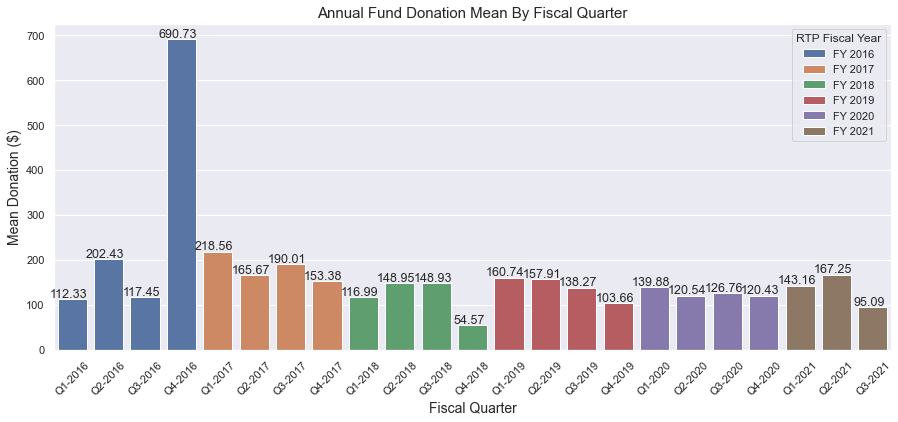

In [109]:
#Plot the annual fund means by fiscal quarter

#set style
sns.set(style='darkgrid')

#Adjust the plot size
plt.figure(figsize=[15,6])

#Line Plot

g = sns.barplot(x=fq_mean.index, 
            y=fq_mean.values,
           hue = fq_wfy['fiscal_year'].values,
           dodge=False)
g.legend(loc='upper right').set_title('RTP Fiscal Year')
#Assign axis labels:
plt.ylabel('Mean Donation ($)', fontsize=14)
plt.xlabel('Fiscal Quarter', fontsize=14)
plt.xticks(rotation=45)
plt.title('Annual Fund Donation Mean By Fiscal Quarter', fontsize=15)

#Annotate
# This is the location for the annotated text
i = 1.0
j = 4
# Annotating the bar plot with the values 
for i in range(len(['Q1-2016', 'Q2-2016', 'Q3-2016','Q4-2016', 'Q1-2017', 'Q2-2017', 'Q3-2017','Q4-2017','Q1-2018', 'Q2-2018', 'Q3-2018','Q4-2018', 'Q1-2019', 'Q2-2019', 'Q3-2019','Q4-2019',
                     'Q1-2020', 'Q2-2020', 'Q3-2020','Q4-2020', 'Q1-2021', 'Q2-2021', 'Q3-2021'])):
    plt.annotate(round(aFund.groupby(['fiscal_quarter'])['amount'].mean().loc[['Q1-2016', 'Q2-2016', 'Q3-2016','Q4-2016', 'Q1-2017', 'Q2-2017', 'Q3-2017','Q4-2017','Q1-2018', 'Q2-2018', 'Q3-2018','Q4-2018', 'Q1-2019', 'Q2-2019', 'Q3-2019','Q4-2019',
                     'Q1-2020', 'Q2-2020', 'Q3-2020','Q4-2020', 'Q1-2021', 'Q2-2021', 'Q3-2021']], 2).values[i], (-0.1 + i, aFund.groupby(['fiscal_quarter'])['amount'].mean().loc[['Q1-2016', 'Q2-2016', 'Q3-2016','Q4-2016', 'Q1-2017', 'Q2-2017', 'Q3-2017','Q4-2017','Q1-2018', 'Q2-2018', 'Q3-2018','Q4-2018', 'Q1-2019', 'Q2-2019', 'Q3-2019','Q4-2019',
                     'Q1-2020', 'Q2-2020', 'Q3-2020','Q4-2020', 'Q1-2021', 'Q2-2021', 'Q3-2021']].values[i] + j),
                horizontalalignment='center',
                fontsize=12.5)

**INTERESTING THAT EARLIER QUARTERS HAVE HIGHER MEAN AND MEDIAN DONATION AMOUNTS GIVEN THEY ALSO TEND TO HAVE FEWER DONATIONS AND LOWER TOTALS. THIS INSIGHT MAY BE DUE TO OUR BEGINNING TO TAKE PART IN DEVELOPMENT INITIATIVES THAT AWARD PRIZES BASED ON NUMBER OF DONORS -- THESE EFFORTS EXPLAIN AT LEAST A GOOD PORTION OF THE REASON LATER QUARTERS HAVE LOWER AVG METRICS**

In [110]:
#Combine aggregations of interest into a single df
#Create dictionary of aggregations needed to summarize data as desired.
aggregations = {
    'number_of_donations_byFY' : ('account_id', 'size'),
    'donor_total_byFY' : ('amount', 'sum'),
    'donor_median_byFY' : ('amount', 'median'),
    'donor_avg_byFY' : ('amount', 'mean'),
    'donor_max_byFY' : ('amount', 'max'),
    'donor_min_byFY' : ('amount', 'min'),
    'donor_last_gift_date' : ('last_donation_date', 'max'),
    'donor_first_gift_date' : ('first_donation_date', 'min')
    #'don_recency_median' : ('donation_recency', 'median'),
    #'don_recency_avg' : ('donation_recency', 'mean'),
    #'last_don_median' : ('last_donation_amount', 'median'),
    #'last_don_avg' : ('last_donation_amount', 'median'),
    #'avg_days_since_last' : ('days_since_last', 'mean'),
    #'median_days_since_last' : ('days_since_last', 'median'),
    #'avg_days_since_first' : ('days_since_first', 'mean'),
    #'median_days_since_first' : ('days_since_first', 'median'),
    #'number_firsts_byFY' : ('first_donation_flag', 'sum'),
    #'number_lastsbyFY' : ('last_donation_flag', 'sum')
}

In [111]:
donors_by_fy = aFund.groupby(['fiscal_year', 'account_id']).agg(**aggregations).reset_index()
donors_by_fy.head(25)

fiscal_year       account_id  number_of_donations_byFY  donor_total_byFY  \
0         2016  0013600000VKQkx                         1             250.0   
1         2016  0013600000VKQl1                         1             500.0   
2         2016  0013600000VKQl3                         1             250.0   
3         2016  0013600000VKQl6                         1             500.0   
4         2016  0013600000VKQlH                         1            1000.0   
5         2016  0013600000VKQlJ                         2             125.0   
6         2016  0013600000VKQlO                         3             375.0   
7         2016  0013600000VKQlR                         1              35.0   
8         2016  0013600000VKQlY                         1             276.9   
9         2016  0013600000VKQlc                         1             200.0   
10        2016  0013600000VKQlj                         1             150.0   
11        2016  0013600000VKQlo                         1             100.0   
12        2016  0013600000VKQlp                         1              70.0   
13        2016  0013600000VKQls                         1              50.0   
14        2016  0013600000VKQlv                         1             300.0   
15        2016  0013600000VKQm8                         1              50.0   
16        2016  0013600000VKQm9                         1              25.0   
17        2016  0013600000VKQmD                         1             100.0   
18        2016  0013600000VKQmE                         1             100.0   
19        2016  0013600000VKQmO                         1             100.0   
20        2016  0013600000VKQmW                         1             250.0   
21        2016  0013600000VKQma                         1             100.0   
22        2016  0013600000VKQmi                         1              25.0   
23        2016  0013600000VKQml                         1             250.0   
24        2016  0013600000VKQmm                         1             100.0   

    donor_median_byFY  donor_avg_byFY  donor_max_byFY  donor_min_byFY  \
0               250.0           250.0           250.0           250.0   
1               500.0           500.0           500.0           500.0   
2               250.0           250.0           250.0           250.0   
3               500.0           500.0           500.0           500.0   
4              1000.0          1000.0          1000.0          1000.0   
5                62.5            62.5           100.0            25.0   
6               125.0           125.0           125.0           125.0   
7                35.0            35.0            35.0            35.0   
8               276.9           276.9           276.9           276.9   
9               200.0           200.0           200.0           200.0   
10              150.0           150.0           150.0           150.0   
11              100.0           100.0           100.0           100.0   
12               70.0            70.0            70.0            70.0   
13               50.0            50.0            50.0            50.0   
14              300.0           300.0           300.0           300.0   
15               50.0            50.0            50.0            50.0   
16               25.0            25.0            25.0            25.0   
17              100.0           100.0           100.0           100.0   
18              100.0           100.0           100.0           100.0   
19              100.0           100.0           100.0           100.0   
20              250.0           250.0           250.0           250.0   
21              100.0           100.0           100.0           100.0   
22               25.0            25.0            25.0            25.0   
23              250.0           250.0           250.0           250.0   
24              100.0           100.0           100.0           100.0   

   donor_last_gift_date donor_first_gift_date  
0

In [112]:
donors_by_fy.isna().sum()

fiscal_year                 0
account_id                  0
number_of_donations_byFY    0
donor_total_byFY            0
donor_median_byFY           0
donor_avg_byFY              0
donor_max_byFY              0
donor_min_byFY              0
donor_last_gift_date        0
donor_first_gift_date       0
dtype: int64

In [113]:
#Which donors gave in each of the fiscal years under review?
donors_by_fy.loc[donors_by_fy['fiscal_year'] == '2017',:].sort_values('donor_last_gift_date')

fiscal_year       account_id  number_of_donations_byFY  donor_total_byFY  \
348        2017  0013600000YkPYv                         1              50.0   
294        2017  0013600000VKRW2                         1              70.0   
342        2017  0013600000XsalD                         1              25.0   
305        2017  0013600000VKRbI                         1              20.0   
355        2017  0013600000ggHsz                         1               5.0   
..          ...              ...                       ...               ...   
332        2017  0013600000VKRw8                         1             100.0   
345        2017  0013600000YDbzK                         1             100.0   
377        2017  0013600000i50VL                         1              10.0   
284        2017  0013600000VKRQP                         1             100.0   
308        2017  0013600000VKRe8                         1             250.0   

     donor_median_byFY  donor_avg_byFY  donor_max_byFY  donor_min_byFY  \
348               50.0            50.0            50.0            50.0   
294               70.0            70.0            70.0            70.0   
342               25.0            25.0            25.0            25.0   
305               20.0            20.0            20.0            20.0   
355                5.0             5.0             5.0             5.0   
..                 ...             ...             ...             ...   
332              100.0           100.0           100.0           100.0   
345              100.0           100.0           100.0           100.0   
377               10.0            10.0            10.0            10.0   
284              100.0           100.0           100.0           100.0   
308              250.0           250.0           250.0           250.0   

    donor_last_gift_date donor_first_gift_date  
348           2016-07-19            2016-07-19  
294           2016-08-08            2008-12-18  
342           2016-08-15            2016-08-15  
305           2016-09-19            2015-06-01  
355           2016-10-06            2016-10-06  
..                   ...                   ...  
332           2021-01-15            2016-01-05  
345           2021-01-16            2013-09-19  
377           2021-01-17            2016-10-13  
284           2021-01-18            2013-09-19  
308           2021-01-19            2016-12-16  

[312 rows x 10 columns]

In [114]:
len(donors_by_fy.loc[donors_by_fy['fiscal_year'] == '2017', 'account_id'].values)

312

In [115]:
#Double check the number of unique accounts across the entire period
len(aFund.account_id.unique())

1562

# Create data table of retention metrics

**Create arrays of the each fiscal year's retained account ids.**

In [116]:
retained_2021 = ([a for a in donors_by_fy.loc[donors_by_fy['fiscal_year'] == '2021', 'account_id'].values if a in donors_by_fy.loc[donors_by_fy['fiscal_year'] == '2020', 'account_id'].values])
retained_2020 = ([a for a in donors_by_fy.loc[donors_by_fy['fiscal_year'] == '2020', 'account_id'].values if a in donors_by_fy.loc[donors_by_fy['fiscal_year'] == '2019', 'account_id'].values])
retained_2019 = ([a for a in donors_by_fy.loc[donors_by_fy['fiscal_year'] == '2019', 'account_id'].values if a in donors_by_fy.loc[donors_by_fy['fiscal_year'] == '2018', 'account_id'].values])
retained_2018 = ([a for a in donors_by_fy.loc[donors_by_fy['fiscal_year'] == '2018', 'account_id'].values if a in donors_by_fy.loc[donors_by_fy['fiscal_year'] == '2017', 'account_id'].values])
retained_2017 = ([a for a in donors_by_fy.loc[donors_by_fy['fiscal_year'] == '2017', 'account_id'].values if a in donors_by_fy.loc[donors_by_fy['fiscal_year'] == '2016', 'account_id'].values])

**Calculate Retention Rates by Fiscal Year**

In [117]:
# retained_2021 = ([a for a in donors_by_fy.loc[donors_by_fy['fiscal_year'] == '2021', 'account_id'].values if a in donors_by_fy.loc[donors_by_fy['fiscal_year'] == '2020', 'account_id'].values])
# retained_2020 = ([a for a in donors_by_fy.loc[donors_by_fy['fiscal_year'] == '2020', 'account_id'].values if a in donors_by_fy.loc[donors_by_fy['fiscal_year'] == '2019', 'account_id'].values])
# retained_2019 = ([a for a in donors_by_fy.loc[donors_by_fy['fiscal_year'] == '2019', 'account_id'].values if a in donors_by_fy.loc[donors_by_fy['fiscal_year'] == '2018', 'account_id'].values])
# retained_2018 = ([a for a in donors_by_fy.loc[donors_by_fy['fiscal_year'] == '2018', 'account_id'].values if a in donors_by_fy.loc[donors_by_fy['fiscal_year'] == '2017', 'account_id'].values])
# retained_2017 = ([a for a in donors_by_fy.loc[donors_by_fy['fiscal_year'] == '2017', 'account_id'].values if a in donors_by_fy.loc[donors_by_fy['fiscal_year'] == '2016', 'account_id'].values])

In [118]:
len(donors_by_fy.loc[donors_by_fy['fiscal_year'] == '2020', 'account_id'].values)

892

In [119]:
len(retained_2021)

246

In [120]:
#2021 retention rate
round(len(retained_2021)/len(donors_by_fy.loc[donors_by_fy['fiscal_year'] == '2020', 'account_id'].values)*100, 2)

27.58

**Create arrays of each fiscal year's acquired account ids.**

In [121]:
donors_by_fy[(donors_by_fy['donor_first_gift_date'] > '2020-06-30') & (donors_by_fy['fiscal_year'] == '2021')].sort_values('donor_first_gift_date').reset_index(drop=True)

fiscal_year       account_id  number_of_donations_byFY  donor_total_byFY  \
0          2021  0013p00001uSLRH                         1              10.0   
1          2021  0013p00001uSLSo                         1              10.0   
2          2021  0013600000VKR0b                         1              25.0   
3          2021  0013600000VKRyu                         2             250.0   
4          2021  0013p00001uSJja                         1             206.0   
..          ...              ...                       ...               ...   
119        2021  0013600000VKRFC                         1              10.0   
120        2021  0013p0000258fW6                         1               5.0   
121        2021  0013p0000259AVX                         1              20.0   
122        2021  0013p0000259AUt                         1               5.0   
123        2021  0013p0000259Ery                         1               5.0   

     donor_median_byFY  donor_avg_byFY  donor_max_byFY  donor_min_byFY  \
0                 10.0            10.0            10.0            10.0   
1                 10.0            10.0            10.0            10.0   
2                 25.0            25.0            25.0            25.0   
3                125.0           125.0           125.0           125.0   
4                206.0           206.0           206.0           206.0   
..                 ...             ...             ...             ...   
119               10.0            10.0            10.0            10.0   
120                5.0             5.0             5.0             5.0   
121               20.0            20.0            20.0            20.0   
122                5.0             5.0             5.0             5.0   
123                5.0             5.0             5.0             5.0   

    donor_last_gift_date donor_first_gift_date  
0             2020-07-01            2020-07-01  
1             2020-07-01            2020-07-01  
2             2020-07-02            2020-07-02  
3             2020-12-18            2020-07-03  
4             2020-07-03            2020-07-03  
..                   ...                   ...  
119           2021-01-17            2021-01-17  
120           2021-01-18            2021-01-18  
121           2021-01-19            2021-01-19  
122           2021-01-20            2021-01-20  
123           2021-01-20            2021-01-20  

[124 rows x 10 columns]

In [122]:
acquired_2021 = donors_by_fy.loc[(donors_by_fy['donor_first_gift_date'] > '2020-06-30') & (donors_by_fy['fiscal_year'] == '2021'), 'account_id'].values
len(acquired_2021)

124

In [123]:
acquired_2020 = donors_by_fy.loc[(donors_by_fy['donor_first_gift_date'] > '2019-06-30') & (donors_by_fy['donor_first_gift_date'] < '2020-07-01') & (donors_by_fy['fiscal_year'] == '2020'), 'account_id'].values
len(acquired_2020)

497

In [124]:
acquired_2019 = donors_by_fy.loc[(donors_by_fy['donor_first_gift_date'] > '2018-06-30') & (donors_by_fy['donor_first_gift_date'] < '2019-07-01') & (donors_by_fy['fiscal_year'] == '2019'), 'account_id'].values
len(acquired_2019)

219

In [125]:
donors_by_fy.loc[(donors_by_fy['donor_first_gift_date'] > '2017-06-30') & (donors_by_fy['donor_first_gift_date'] < '2018-07-01') & (donors_by_fy['fiscal_year'] == '2018')].sort_values('donor_first_gift_date').reset_index(drop=True)

fiscal_year       account_id  number_of_donations_byFY  donor_total_byFY  \
0          2018  0013600001CH9sk                         1              10.0   
1          2018  0013600001AgdYk                        12             120.0   
2          2018  0013600001CIkeh                         1              25.0   
3          2018  0013600000VKRbx                         1              10.0   
4          2018  0013600001EnaHj                         1               5.0   
..          ...              ...                       ...               ...   
248        2018  0013600001nkb2w                         1              42.0   
249        2018  0013600000VKRru                         1             334.0   
250        2018  0013600000VKRaK                         1              25.0   
251        2018  0013600000VKRUj                         1             500.0   
252        2018  0013600000VKQu4                         1              50.0   

     donor_median_byFY  donor_avg_byFY  donor_max_byFY  donor_min_byFY  \
0                 10.0            10.0            10.0            10.0   
1                 10.0            10.0            10.0            10.0   
2                 25.0            25.0            25.0            25.0   
3                 10.0            10.0            10.0            10.0   
4                  5.0             5.0             5.0             5.0   
..                 ...             ...             ...             ...   
248               42.0            42.0            42.0            42.0   
249              334.0           334.0           334.0           334.0   
250               25.0            25.0            25.0            25.0   
251              500.0           500.0           500.0           500.0   
252               50.0            50.0            50.0            50.0   

    donor_last_gift_date donor_first_gift_date  
0             2019-06-08            2017-07-09  
1             2021-01-16            2017-07-10  
2             2017-07-13            2017-07-13  
3             2017-07-16            2017-07-16  
4             2017-07-22            2017-07-22  
..                   ...                   ...  
248           2018-06-29            2018-06-29  
249           2018-09-20            2018-06-29  
250           2019-12-26            2018-06-30  
251           2018-06-30            2018-06-30  
252           2020-12-12            2018-06-30  

[253 rows x 10 columns]

In [126]:
acquired_2018 = donors_by_fy.loc[(donors_by_fy['donor_first_gift_date'] > '2017-06-30') & (donors_by_fy['donor_first_gift_date'] < '2018-07-01') & (donors_by_fy['fiscal_year'] == '2018'), 'account_id'].values
len(acquired_2018)

253

In [127]:
acquired_2017 = donors_by_fy.loc[(donors_by_fy['donor_first_gift_date'] > '2016-06-30') & (donors_by_fy['donor_first_gift_date'] < '2017-07-01') & (donors_by_fy['fiscal_year'] == '2017'), 'account_id'].values
len(acquired_2017)

157

**Create arrays of the each fiscal year's reactivated account ids.**

In [128]:
donors_by_fy.loc[(donors_by_fy['donor_first_gift_date'] < '2016-06-30') & (donors_by_fy['donor_last_gift_date'] > '2020-06-30')].reset_index(drop=True)

fiscal_year       account_id  number_of_donations_byFY  donor_total_byFY  \
0          2016  0013600000VKQkx                         1            250.00   
1          2016  0013600000VKQlH                         1           1000.00   
2          2016  0013600000VKQlJ                         2            125.00   
3          2016  0013600000VKQlY                         1            276.90   
4          2016  0013600000VKQlo                         1            100.00   
..          ...              ...                       ...               ...   
474        2021  0013600000ggdP1                         1           1030.00   
475        2021  0013600000ggdQA                         1            128.75   
476        2021  0013600000ggdRJ                         1             50.00   
477        2021  0013600000ggdc5                         1            128.75   
478        2021  0013600000ggdcH                         1             25.00   

     donor_median_byFY  donor_avg_byFY  donor_max_byFY  donor_min_byFY  \
0               250.00          250.00          250.00          250.00   
1              1000.00         1000.00         1000.00         1000.00   
2                62.50           62.50          100.00           25.00   
3               276.90          276.90          276.90          276.90   
4               100.00          100.00          100.00          100.00   
..                 ...             ...             ...             ...   
474            1030.00         1030.00         1030.00         1030.00   
475             128.75          128.75          128.75          128.75   
476              50.00           50.00           50.00           50.00   
477             128.75          128.75          128.75          128.75   
478              25.00           25.00           25.00           25.00   

    donor_last_gift_date donor_first_gift_date  
0             2020-12-16            2011-09-13  
1             2020-12-30            2007-12-29  
2             2021-01-05            2015-12-29  
3             2020-12-01            2008-07-31  
4             2020-12-01            2009-10-21  
..                   ...                   ...  
474           2020-12-18            2011-06-30  
475           2020-12-30            2010-12-06  
476           2020-12-28            2013-12-18  
477           2020-12-28            2012-09-15  
478           2020-12-28            2013-10-18  

[479 rows x 10 columns]

In [129]:
#Reactivated in FY2017:
reactivated_2017 = donors_by_fy.loc[(donors_by_fy['donor_first_gift_date'] <= '2015-06-30') & (donors_by_fy['fiscal_year'] == '2017') & (~donors_by_fy['account_id'].isin(donors_by_fy.loc[donors_by_fy['fiscal_year'] == '2016', 'account_id'].values))]['account_id'].values

In [130]:
#Reactivated in FY2018:
reactivated_2018 = donors_by_fy.loc[(donors_by_fy['donor_first_gift_date'] <= '2016-06-30') & (donors_by_fy['fiscal_year'] == '2018') & (~donors_by_fy['account_id'].isin(donors_by_fy.loc[donors_by_fy['fiscal_year'] == '2017', 'account_id'].values))].sort_values('donor_first_gift_date')['account_id'].values

In [131]:
#Reactivated in FY2019:
reactivated_2019 = donors_by_fy.loc[(donors_by_fy['donor_first_gift_date'] <= '2017-06-30') & (donors_by_fy['fiscal_year'] == '2019') & (~donors_by_fy['account_id'].isin(donors_by_fy.loc[donors_by_fy['fiscal_year'] == '2018', 'account_id'].values))].sort_values('donor_first_gift_date')['account_id'].values

In [132]:
#Reactivated in FY2020:
reactivated_2020 = donors_by_fy.loc[(donors_by_fy['donor_first_gift_date'] <= '2018-06-30') & (donors_by_fy['fiscal_year'] == '2020') & (~donors_by_fy['account_id'].isin(donors_by_fy.loc[donors_by_fy['fiscal_year'] == '2019', 'account_id'].values))].sort_values('donor_first_gift_date')['account_id'].values

In [133]:
#Reactivated in FY2021:
reactivated_2021 = donors_by_fy.loc[(donors_by_fy['donor_first_gift_date'] <= '2019-06-30') & (donors_by_fy['fiscal_year'] == '2021') & (~donors_by_fy['account_id'].isin(donors_by_fy.loc[donors_by_fy['fiscal_year'] == '2020', 'account_id'].values))].sort_values('donor_first_gift_date')['account_id'].values

**Create arrays of the each fiscal year's lapsed account ids.**

In [134]:
lapsed_2021 = ([a for a in donors_by_fy.loc[donors_by_fy['fiscal_year'] == '2020', 'account_id'].values if a not in donors_by_fy.loc[donors_by_fy['fiscal_year'] == '2021', 'account_id'].values])
lapsed_2020 = ([a for a in donors_by_fy.loc[donors_by_fy['fiscal_year'] == '2019', 'account_id'].values if a not in donors_by_fy.loc[donors_by_fy['fiscal_year'] == '2020', 'account_id'].values])
lapsed_2019 = ([a for a in donors_by_fy.loc[donors_by_fy['fiscal_year'] == '2018', 'account_id'].values if a not in donors_by_fy.loc[donors_by_fy['fiscal_year'] == '2019', 'account_id'].values])
lapsed_2018 = ([a for a in donors_by_fy.loc[donors_by_fy['fiscal_year'] == '2017', 'account_id'].values if a not in donors_by_fy.loc[donors_by_fy['fiscal_year'] == '2018', 'account_id'].values])
lapsed_2017 = ([a for a in donors_by_fy.loc[donors_by_fy['fiscal_year'] == '2016', 'account_id'].values if a not in donors_by_fy.loc[donors_by_fy['fiscal_year'] == '2017', 'account_id'].values])

In [135]:
#Confirm that np.tile will, in fact, repeat the array elements 5 times while retaining the impute order with each iteration
#Unlike np.repeat, which seems to sort like array values together
np.tile(aFund.account_id.unique(), 5)

array(['0011R00001zaq0m', '0011R00001zbJO4', '0011R00001zcCFw', ...,
       '0013600000VKQmI', '0013600000VKRpL', '0013600000VKQlO'],
      dtype=object)

In [136]:
round(len(lapsed_2017)/len(donors_by_fy.loc[donors_by_fy['fiscal_year'] == '2016', 'account_id'].values)*100, 2)

43.38

In [137]:
round(len(retained_2017)/len(donors_by_fy.loc[donors_by_fy['fiscal_year'] == '2016', 'account_id'].values)*100, 2)

56.62

In [138]:
#Create a new dataframe to store the retention metrics
donor_accounts =pd.DataFrame()
donor_accounts['account_id'] = np.tile(aFund.account_id.unique(), 5) #create 1 row for every unique account for each fiscal year
donor_accounts['fiscal_year'] = np.concatenate([np.repeat('2017', len(aFund.account_id.unique())), np.repeat('2018', len(aFund.account_id.unique())), np.repeat('2019', len(aFund.account_id.unique())), np.repeat('2020', len(aFund.account_id.unique())), np.repeat('2021', len(aFund.account_id.unique()))])
#Add retention rates by fy as column in donor_accounts:
donor_accounts['ret_rate_xfy'] = np.concatenate([np.repeat(round(len(retained_2017)/len(donors_by_fy.loc[donors_by_fy['fiscal_year'] == '2016', 'account_id'].values)*100, 2), len(aFund.account_id.unique())),                              
                                                 np.repeat(round(len(retained_2018)/len(donors_by_fy.loc[donors_by_fy['fiscal_year'] == '2017', 'account_id'].values)*100, 2), len(aFund.account_id.unique())),
                                                 np.repeat(round(len(retained_2019)/len(donors_by_fy.loc[donors_by_fy['fiscal_year'] == '2018', 'account_id'].values)*100, 2), len(aFund.account_id.unique())), 
                                                 np.repeat(round(len(retained_2020)/len(donors_by_fy.loc[donors_by_fy['fiscal_year'] == '2019', 'account_id'].values)*100, 2), len(aFund.account_id.unique())),
                                                 np.repeat(round(len(retained_2021)/len(donors_by_fy.loc[donors_by_fy['fiscal_year'] == '2020', 'account_id'].values)*100, 2), len(aFund.account_id.unique()))], axis=0)

donor_accounts['lapse_rate_xfy'] = np.concatenate([np.repeat(round(len(lapsed_2017)/len(donors_by_fy.loc[donors_by_fy['fiscal_year'] == '2016', 'account_id'].values)*100, 2), len(aFund.account_id.unique())),
np.repeat(round(len(lapsed_2018)/len(donors_by_fy.loc[donors_by_fy['fiscal_year'] == '2017', 'account_id'].values)*100, 2), len(aFund.account_id.unique())),
np.repeat(round(len(lapsed_2019)/len(donors_by_fy.loc[donors_by_fy['fiscal_year'] == '2018', 'account_id'].values)*100, 2), len(aFund.account_id.unique())),
np.repeat(round(len(lapsed_2020)/len(donors_by_fy.loc[donors_by_fy['fiscal_year'] == '2019', 'account_id'].values)*100, 2), len(aFund.account_id.unique())),
np.repeat(round(len(lapsed_2021)/len(donors_by_fy.loc[donors_by_fy['fiscal_year'] == '2020', 'account_id'].values)*100, 2), len(aFund.account_id.unique()))], axis=0)
donor_accounts.tail()

account_id fiscal_year  ret_rate_xfy  lapse_rate_xfy
7805  0013600000VKQnz        2021         27.58           72.42
7806  0013600000VKR7J        2021         27.58           72.42
7807  0013600000VKQmI        2021         27.58           72.42
7808  0013600000VKRpL        2021         27.58           72.42
7809  0013600000VKQlO        2021         27.58           72.42

In [139]:
donor_accounts.head()

account_id fiscal_year  ret_rate_xfy  lapse_rate_xfy
0  0011R00001zaq0m        2017         56.62           43.38
1  0011R00001zbJO4        2017         56.62           43.38
2  0011R00001zcCFw        2017         56.62           43.38
3  0011R000020QPEz        2017         56.62           43.38
4  0011R000020bh4G        2017         56.62           43.38

In [140]:
donor_accounts['ret_rate_xfy'].value_counts()

56.62    1562
58.09    1562
45.24    1562
27.58    1562
47.12    1562
Name: ret_rate_xfy, dtype: int64

In [141]:
donor_accounts['lapse_rate_xfy'].value_counts()

41.91    1562
43.38    1562
52.88    1562
54.76    1562
72.42    1562
Name: lapse_rate_xfy, dtype: int64

In [142]:
donor_accounts.shape

(7810, 4)

In [143]:
#Add the ret_rate_xfy and lapse_rate_xfy columns to donors_by_fy df
donor_accounts = pd.merge(donor_accounts, donors_by_fy, how='left', on=['account_id', 'fiscal_year']).sort_values(by=['fiscal_year', 'account_id']).reset_index(drop=True)
donor_accounts.tail(20)

account_id fiscal_year  ret_rate_xfy  lapse_rate_xfy  \
7790  0013p0000257Xmz        2021         27.58           72.42   
7791  0013p0000257ZCI        2021         27.58           72.42   
7792  0013p0000257ZFT        2021         27.58           72.42   
7793  0013p0000257zzd        2021         27.58           72.42   
7794  0013p0000257zzx        2021         27.58           72.42   
7795  0013p0000258B50        2021         27.58           72.42   
7796  0013p0000258B5x        2021         27.58           72.42   
7797  0013p0000258B8Q        2021         27.58           72.42   
7798  0013p0000258fW6        2021         27.58           72.42   
7799  0013p0000259AUt        2021         27.58           72.42   
7800  0013p0000259AVX        2021         27.58           72.42   
7801  0013p0000259Ery        2021         27.58           72.42   
7802  0013p000025Jmos        2021         27.58           72.42   
7803  0013p000025LZRI        2021         27.58           72.42   
7804  0013p000025LZdq        2021         27.58           72.42   
7805  0013p000025LmcD        2021         27.58           72.42   
7806  0013p000025LoAk        2021         27.58           72.42   
7807  0013p000025MPPB        2021         27.58           72.42   
7808  0013p000025Mgo0        2021         27.58           72.42   
7809  0013p000025Mmo1        2021         27.58           72.42   

      number_of_donations_byFY  donor_total_byFY  donor_median_byFY  \
7790                       1.0               5.0                5.0   
7791                       1.0               9.0                9.0   
7792                       1.0              20.0               20.0   
7793                       1.0              20.0               20.0   
7794                       1.0               5.0                5.0   
7795                       1.0              20.0               20.0   
7796                       1.0              50.0               50.0   
7797                       1.0              20.0               20.0   
7798                       1.0               5.0                5.0   
7799                       1.0               5.0                5.0   
7800                       1.0              20.0               20.0   
7801                       1.0               5.0                5.0   
7802                       1.0              51.5               51.5   
7803                       1.0              25.0               25.0   
7804                       1.0              20.0               20.0   
7805                       1.0               5.0                5.0   
7806                       1.0              10.0               10.0   
7807                       1.0              10.0               10.0   
7808                       1.0               5.0                5.0   
7809                       1.0               1.0                1.0   

      donor_avg_byFY  donor_max_byFY  donor_min_byFY donor_last_gift_date  \
7790             5.0             5.0             5.0           2021-01-13   
7791             9.0             9.0             9.0           2021-01-14   
7792            20.0            20.0            20.0           2021-01-14   
7793            20.0            20.0            20.0           2021-01-15   
7794             5.0             5.0             5.0           2021-01-15   
7795            20.0            20.0            20.0           2021-01-16   
7796            50.0            50.0            50.0           2021-01-16   
7797            20.0            20.0            20.0           2021-01-16   
7798             5.0             5.0             5.0           2021-01-18   
7799             5.0             5.0             5.0           2021-01-20   
7800            20.0            20.0            20.0           2021-01-19   
7801             5.0             5.0             5.0           2021-01-20   
7802            51.5            51.5            51.5           2021-01-04   
7803            25.0            2

In [144]:
donor_accounts[donor_accounts['number_of_donations_byFY'].isna()].reset_index(drop=True)

account_id fiscal_year  ret_rate_xfy  lapse_rate_xfy  \
0     0011R00001yzm4S        2017         56.62           43.38   
1     0011R00001zaq0m        2017         56.62           43.38   
2     0011R00001zbJNc        2017         56.62           43.38   
3     0011R00001zbJO4        2017         56.62           43.38   
4     0011R00001zcCFw        2017         56.62           43.38   
...               ...         ...           ...             ...   
5240  0013p00001uT2vR        2021         27.58           72.42   
5241  0013p00001uT2vg        2021         27.58           72.42   
5242  0013p00001uT2vv        2021         27.58           72.42   
5243  0013p00001uT2wA        2021         27.58           72.42   
5244  0013p00001uTt8h        2021         27.58           72.42   

      number_of_donations_byFY  donor_total_byFY  donor_median_byFY  \
0                          NaN               NaN                NaN   
1                          NaN               NaN                NaN   
2                          NaN               NaN                NaN   
3                          NaN               NaN                NaN   
4                          NaN               NaN                NaN   
...                        ...               ...                ...   
5240                       NaN               NaN                NaN   
5241                       NaN               NaN                NaN   
5242                       NaN               NaN                NaN   
5243                       NaN               NaN                NaN   
5244                       NaN               NaN                NaN   

      donor_avg_byFY  donor_max_byFY  donor_min_byFY donor_last_gift_date  \
0                NaN             NaN             NaN                  NaT   
1                NaN             NaN             NaN                  NaT   
2                NaN             NaN             NaN                  NaT   
3                NaN             NaN             NaN                  NaT   
4                NaN             NaN             NaN                  NaT   
...              ...             ...             ...                  ...   
5240             NaN             NaN             NaN                  NaT   
5241             NaN             NaN             NaN                  NaT   
5242             NaN             NaN             NaN                  NaT   
5243             NaN             NaN             NaN                  NaT   
5244             NaN             NaN             NaN                  NaT   

     donor_first_gift_date  
0                      NaT  
1                      NaT  
2                      NaT  
3                      NaT  
4                      NaT  
...                    ...  
5240                   NaT  
5241                   NaT  
5242                   NaT  
5243                   NaT  
5244                   NaT  

[5245 rows x 12 columns]

In [145]:
donor_accounts[donor_accounts['number_of_donations_byFY'].notnull()].reset_index(drop=True)

account_id fiscal_year  ret_rate_xfy  lapse_rate_xfy  \
0     0013600000VKQhm        2017         56.62           43.38   
1     0013600000VKQjK        2017         56.62           43.38   
2     0013600000VKQl6        2017         56.62           43.38   
3     0013600000VKQlB        2017         56.62           43.38   
4     0013600000VKQlH        2017         56.62           43.38   
...               ...         ...           ...             ...   
2560  0013p000025LmcD        2021         27.58           72.42   
2561  0013p000025LoAk        2021         27.58           72.42   
2562  0013p000025MPPB        2021         27.58           72.42   
2563  0013p000025Mgo0        2021         27.58           72.42   
2564  0013p000025Mmo1        2021         27.58           72.42   

      number_of_donations_byFY  donor_total_byFY  donor_median_byFY  \
0                          1.0              3.25               3.25   
1                          1.0             10.00              10.00   
2                          1.0            750.00             750.00   
3                          1.0            250.00             250.00   
4                          2.0           1500.00             750.00   
...                        ...               ...                ...   
2560                       1.0              5.00               5.00   
2561                       1.0             10.00              10.00   
2562                       1.0             10.00              10.00   
2563                       1.0              5.00               5.00   
2564                       1.0              1.00               1.00   

      donor_avg_byFY  donor_max_byFY  donor_min_byFY donor_last_gift_date  \
0               3.25            3.25            3.25           2019-04-18   
1              10.00           10.00           10.00           2019-03-11   
2             750.00          750.00          750.00           2020-06-29   
3             250.00          250.00          250.00           2020-06-15   
4             750.00         1000.00          500.00           2020-12-30   
...              ...             ...             ...                  ...   
2560            5.00            5.00            5.00           2021-01-10   
2561           10.00           10.00           10.00           2021-01-10   
2562           10.00           10.00           10.00           2021-01-11   
2563            5.00            5.00            5.00           2021-01-13   
2564            1.00            1.00            1.00           2021-01-13   

     donor_first_gift_date  
0               2017-06-23  
1               2017-03-16  
2               2007-12-29  
3               2016-12-12  
4               2007-12-29  
...                    ...  
2560            2021-01-10  
2561            2021-01-10  
2562            2021-01-11  
2563            2021-01-13  
2564            2021-01-13  

[2565 rows x 12 columns]

In [146]:
#How many annual fund donations were given over the period.
donor_accounts['number_of_donations_byFY'].sum()

3962.0

In [147]:
#Column addition doesn't show up when checking the donor_accounts.columns. Add it a different way and check
donor_accounts['retention_status'] = 'awaiting value'
donor_accounts.loc[donor_accounts['number_of_donations_byFY'].isna(), 'retention_status'] = np.nan

In [148]:
#Assign values to new retention_status column based on conditions.
conditions = [
    ((donor_accounts['account_id'].isin(retained_2021)) & (donor_accounts.fiscal_year == '2021')),
    ((donor_accounts['account_id'].isin(lapsed_2021)) & (donor_accounts.fiscal_year == '2021')),
    ((donor_accounts['account_id'].isin(acquired_2021)) & (donor_accounts.fiscal_year == '2021')),
    ((donor_accounts['account_id'].isin(retained_2020)) & (donor_accounts.fiscal_year == '2020')),
    ((donor_accounts['account_id'].isin(lapsed_2020)) & (donor_accounts.fiscal_year == '2020')),
    ((donor_accounts['account_id'].isin(acquired_2020)) & (donor_accounts.fiscal_year == '2020')),
    ((donor_accounts['account_id'].isin(retained_2019)) & (donor_accounts.fiscal_year == '2019')),
    ((donor_accounts['account_id'].isin(lapsed_2019)) & (donor_accounts.fiscal_year == '2019')),
    ((donor_accounts['account_id'].isin(acquired_2019)) & (donor_accounts.fiscal_year == '2019')),
    ((donor_accounts['account_id'].isin(retained_2018)) & (donor_accounts.fiscal_year == '2018')),
    ((donor_accounts['account_id'].isin(lapsed_2018)) & (donor_accounts.fiscal_year == '2018')),
    ((donor_accounts['account_id'].isin(acquired_2018)) & (donor_accounts.fiscal_year == '2018')),
    ((donor_accounts['account_id'].isin(retained_2017)) & (donor_accounts.fiscal_year == '2017')),
    ((donor_accounts['account_id'].isin(lapsed_2017)) & (donor_accounts.fiscal_year == '2017')),
    ((donor_accounts['account_id'].isin(acquired_2017)) & (donor_accounts.fiscal_year == '2017'))
]

choices = ['Retained', 'Lapsed', 'Acquired', 'Retained', 'Lapsed', 'Acquired', 'Retained', 'Lapsed', 'Acquired', 'Retained', 'Lapsed', 'Acquired', 'Retained', 'Lapsed', 'Acquired']

donor_accounts['retention_status'] = np.select(conditions, choices, default=donor_accounts['retention_status'])

**Assign 'Reactivated' status to appropriate rows in the new column**

In [149]:
donor_accounts.loc[donor_accounts.account_id.isin(reactivated_2017) & (donor_accounts.fiscal_year == '2017'), 'retention_status'] = 'Reactivated'

In [150]:
donor_accounts.loc[(donor_accounts['account_id'].isin(reactivated_2018)) & (donor_accounts['fiscal_year'] == '2018'), 'retention_status'] = 'Reactivated'

In [151]:
donor_accounts.loc[(donor_accounts['account_id'].isin(reactivated_2019)) & (donor_accounts['fiscal_year'] == '2019'), 'retention_status'] = 'Reactivated'

In [152]:
donor_accounts.loc[(donor_accounts['account_id'].isin(reactivated_2020)) & (donor_accounts['fiscal_year'] == '2020'), 'retention_status'] = 'Reactivated'

In [153]:
donor_accounts.loc[(donor_accounts['account_id'].isin(reactivated_2021)) & (donor_accounts['fiscal_year'] == '2021'), 'retention_status'] = 'Reactivated'

In [154]:
donor_accounts['retention_status'].value_counts(dropna=False)

NaN            3914
Lapsed         1331
Acquired       1250
Retained        964
Reactivated     351
Name: retention_status, dtype: int64

# Visualize Retention Status (including, by fiscal year)

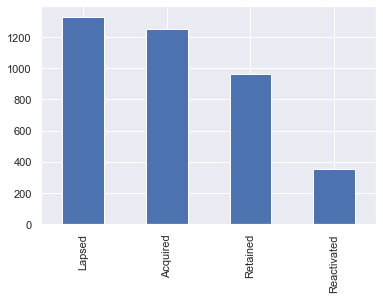

In [155]:
#Plot retention status values counts
donor_accounts['retention_status'].value_counts().plot(kind='bar')

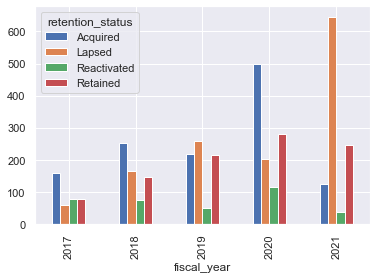

In [156]:
#Plot retention status by fiscal year
donor_accounts.pivot_table(index='fiscal_year', columns='retention_status', aggfunc='size').plot.bar()

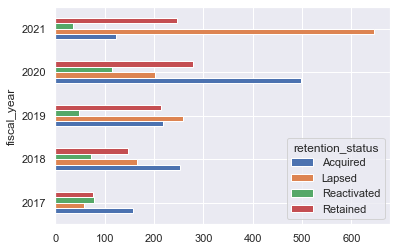

In [157]:
donor_accounts.pivot_table(index='fiscal_year', columns='retention_status', aggfunc='size').plot.barh()

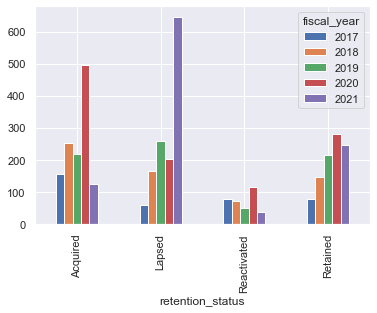

In [158]:
donor_accounts.pivot_table(index='retention_status', columns='fiscal_year', aggfunc='size').plot.bar()
plt.show()

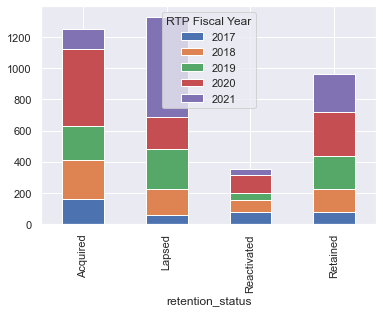

In [159]:
g = donor_accounts.pivot_table(index='retention_status', columns='fiscal_year', aggfunc='size').plot.bar(stacked='True')
g.legend(loc='upper center').set_title("RTP Fiscal Year")
plt.show()

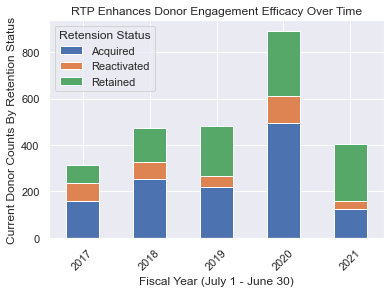

In [160]:
g = donor_accounts.loc[donor_accounts['retention_status'] != 'Lapsed'].pivot_table(index='fiscal_year', columns='retention_status', aggfunc='size').plot.bar(stacked='True')
plt.title("RTP Enhances Donor Engagement Efficacy Over Time")
plt.xlabel('Fiscal Year (July 1 - June 30)')
plt.ylabel('Current Donor Counts By Retention Status')
plt.xticks(rotation=45)
g.legend().set_title("Retension Status")
plt.show()

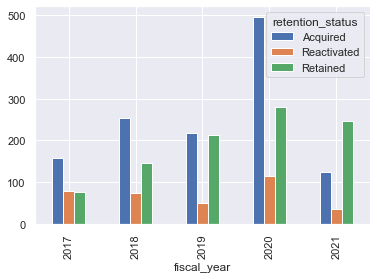

In [161]:
donor_accounts.loc[donor_accounts['retention_status'] != 'Lapsed'].pivot_table(index='fiscal_year', columns='retention_status', aggfunc='size').plot.bar()
plt.show()

In [162]:
donor_accounts.describe(include = 'all').T

count unique                  top  freq      first  \
account_id                7810   1562      0013600000VKRBG     5        NaT   
fiscal_year               7810      5                 2018  1562        NaT   
ret_rate_xfy              7810    NaN                  NaN   NaN        NaT   
lapse_rate_xfy            7810    NaN                  NaN   NaN        NaT   
number_of_donations_byFY  2565    NaN                  NaN   NaN        NaT   
donor_total_byFY          2565    NaN                  NaN   NaN        NaT   
donor_median_byFY         2565    NaN                  NaN   NaN        NaT   
donor_avg_byFY            2565    NaN                  NaN   NaN        NaT   
donor_max_byFY            2565    NaN                  NaN   NaN        NaT   
donor_min_byFY            2565    NaN                  NaN   NaN        NaT   
donor_last_gift_date      2565    572  2020-12-01 00:00:00   218 2016-07-19   
donor_first_gift_date     2565    751  2020-06-30 00:00:00   105 2007-09-16   
retention_status          3896      4               Lapsed  1331        NaT   

                               last     mean      std    min    25%    50%  \
account_id                      NaT      NaN      NaN    NaN    NaN    NaN   
fiscal_year                     NaT      NaN      NaN    NaN    NaN    NaN   
ret_rate_xfy                    NaT    46.93  10.9163  27.58  45.24  47.12   
lapse_rate_xfy                  NaT    53.07  10.9163  41.91  43.38  52.88   
number_of_donations_byFY        NaT  1.54464  1.53077      1      1      1   
donor_total_byFY                NaT  198.066  548.041   0.25     20     50   
donor_median_byFY               NaT  109.421  248.584   0.25     13     50   
donor_avg_byFY                  NaT  116.874  258.182   0.25     15     50   
donor_max_byFY                  NaT  156.854  461.616   0.25     16     50   
donor_min_byFY                  NaT   96.289  240.725   0.25     10     28   
donor_last_gift_date     2021-01-20      NaN      NaN    NaN    NaN    NaN   
donor_first_gift_date    2021-01-20      NaN      NaN    NaN    NaN    NaN   
retention_status                NaT      NaN      NaN    NaN    NaN    NaN   

                            75%    max  
account_id                  NaN    NaN  
fiscal_year                 NaN    NaN  
ret_rate_xfy              56.62  58.09  
lapse_rate_xfy            54.76  72.42  
number_of_donations_byFY      2     28  
donor_total_byFY            150  12045  
donor_median_byFY           100   5000  
donor_avg_byFY            112.5   5000  
donor_max_byFY              125  10000  
donor_min_byFY              100   5000  
donor_last_gift_date        NaN    NaN  
donor_first_gift_date       NaN    NaN  
retention_status            NaN    NaN

In [163]:
donor_accounts.isna().sum()

account_id                     0
fiscal_year                    0
ret_rate_xfy                   0
lapse_rate_xfy                 0
number_of_donations_byFY    5245
donor_total_byFY            5245
donor_median_byFY           5245
donor_avg_byFY              5245
donor_max_byFY              5245
donor_min_byFY              5245
donor_last_gift_date        5245
donor_first_gift_date       5245
retention_status            3914
dtype: int64

In [164]:
pd.crosstab(donor_accounts['fiscal_year'], donor_accounts['retention_status'], margins=True)

retention_status  Acquired  Lapsed  Reactivated  Retained   All
fiscal_year                                                    
2017                   157      59           78        77   371
2018                   253     165           73       147   638
2019                   219     259           49       214   741
2020                   497     202          115       280  1094
2021                   124     646           36       246  1052
All                   1250    1331          351       964  3896

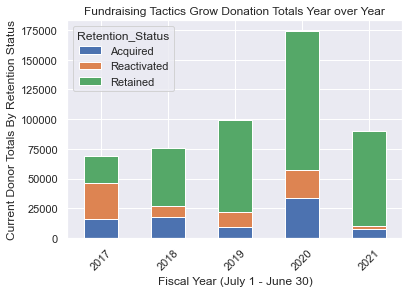

In [165]:
g = donor_accounts.loc[donor_accounts['retention_status'] != 'Lapsed'].pivot_table(values = 'donor_total_byFY', index='fiscal_year', columns='retention_status', aggfunc='sum').plot(kind='bar', stacked='True')
plt.title("Fundraising Tactics Grow Donation Totals Year over Year")
plt.xlabel('Fiscal Year (July 1 - June 30)')
plt.ylabel('Current Donor Totals By Retention Status')
plt.xticks(rotation=45)
g.legend().set_title("Retention_Status")
plt.show()

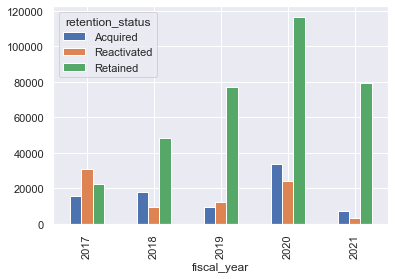

In [166]:
donor_accounts.loc[donor_accounts['retention_status'] != 'Lapsed'].pivot_table(values = 'donor_total_byFY', index='fiscal_year', columns='retention_status', aggfunc='sum').plot(kind='bar')

# Return here to fix error below and effectively label the bars in the plot. See page #270 in Python for DS

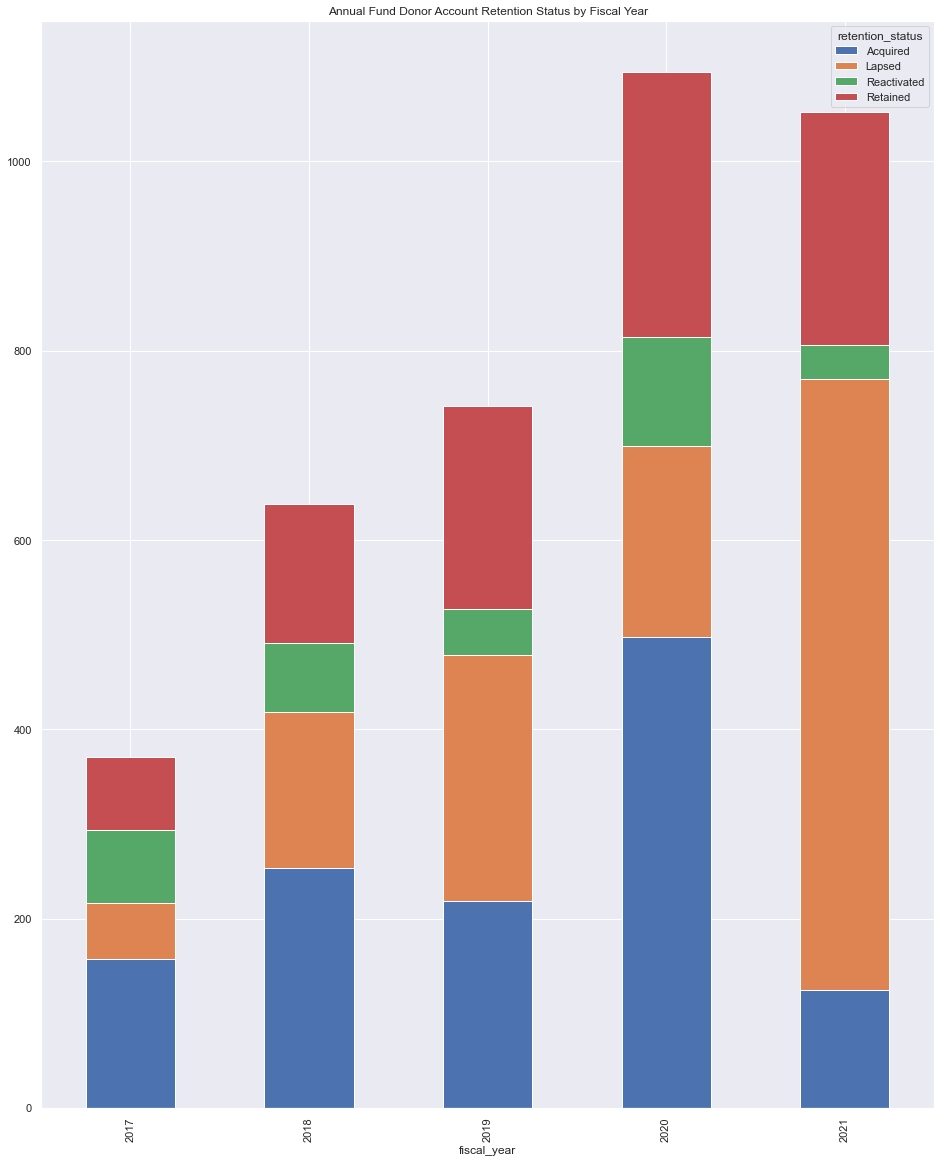

In [167]:
fig, ax = plt.subplots(figsize=(16,20))
donor_accounts.pivot_table(values = 'donor_total_byFY', index='fiscal_year', columns='retention_status', aggfunc='size', fill_value=0).plot(ax=ax, kind='bar', stacked=True, title='Annual Fund Donor Account Retention Status by Fiscal Year')

style = dict(size=10, color='blue')
#ax.text('Q1-2017', 31, '31', **style)

# Stewardship Program##

Create necessary columns to assign donor levels.

In [168]:
#Only Annual Fund dontations made by Household or Individual donors are included in stewardship program totals

aFund['stp_total_s28'] = aFund.loc[(aFund['close_date'] >= '2019-07-01')].groupby('account_id')['amount'].transform('sum')
aFund['stp_total_s27'] = aFund.loc[(aFund['close_date'] >= '2018-07-01') & (aFund['close_date'] <= '2020-06-30')].groupby('account_id')['amount'].transform('sum')
aFund['stp_total_s26'] = aFund.loc[(aFund['close_date'] >= '2017-07-01') & (aFund['close_date'] <= '2019-06-30')].groupby('account_id')['amount'].transform('sum')
aFund['stp_total_s25'] = aFund.loc[(aFund['close_date'] >= '2016-07-01') & (aFund['close_date'] <= '2018-06-30')].groupby('account_id')['amount'].transform('sum')
aFund['stp_total_s24'] = aFund.loc[(aFund['close_date'] >= '2015-07-01') & (aFund['close_date'] <= '2017-06-30')].groupby('account_id')['amount'].transform('sum')
#The data does not include the complete date ranges below that are necessary to create the variables commented below
#aFund['stp_total_s23'] = aFund.loc[(aFund['close_date'] >= '2014-07-01') & (aFund['close_date'] <= '2016-06-30')].groupby('account_id')['amount'].transform('sum')

In [169]:
# aFund['stp_total_s24'] = aFund.loc[(aFund['close_date'] >= '2015-07-01') & (aFund['close_date'] <= '2017-06-30')].groupby('account_id')['amount'].transform('sum')
# aFund['stp_toDate_s24'] = aFund.loc[(aFund['close_date'] >= '2015-07-01') & (aFund['close_date'] <= '2017-01-20')].groupby('account_id')['amount'].transform('sum')

In [170]:
#Create a another similar set of columns to generate comparable (date range thru 1/11/YY) period over period comparisons

aFund['stp_toDate_s28'] = aFund.loc[(aFund['close_date'] >= '2019-07-01')].groupby('account_id')['amount'].transform('sum')
aFund['stp_toDate_s27'] = aFund.loc[(aFund['close_date'] >= '2018-07-01') & (aFund['close_date'] <= '2020-01-20')].groupby('account_id')['amount'].transform('sum')
aFund['stp_toDate_s26'] = aFund.loc[(aFund['close_date'] >= '2017-07-01') & (aFund['close_date'] <= '2019-01-20')].groupby('account_id')['amount'].transform('sum')
aFund['stp_toDate_s25'] = aFund.loc[(aFund['close_date'] >= '2016-07-01') & (aFund['close_date'] <= '2018-01-20')].groupby('account_id')['amount'].transform('sum')
aFund['stp_toDate_s24'] = aFund.loc[(aFund['close_date'] >= '2015-07-01') & (aFund['close_date'] <= '2017-01-20')].groupby('account_id')['amount'].transform('sum')

In [171]:
#Fill NaNs with max value for that account_id shown in other rows for that particular stp_total_sXX column 
stp_total_cols = ['stp_total_s28', 'stp_total_s27', 'stp_total_s26', 'stp_total_s25', 'stp_total_s24', 'stp_toDate_s28', 'stp_toDate_s27', 'stp_toDate_s26', 'stp_toDate_s25', 'stp_toDate_s24']
for col in stp_total_cols:
    aFund.loc[aFund[col].isnull(), col] = aFund.groupby('account_id')[col].transform('max')

In [172]:
#Now, fill remaining nan in stp_total_sXX cols with 0 to simplify ufunc (stp_level_generator) below:  
aFund.loc[:,['stp_total_s28', 'stp_total_s27', 'stp_total_s26', 'stp_total_s25', 'stp_total_s24', 'stp_toDate_s28', 'stp_toDate_s27', 'stp_toDate_s26', 'stp_toDate_s25', 'stp_toDate_s24']] = aFund[['stp_total_s28', 'stp_total_s27', 'stp_total_s26', 'stp_total_s25', 'stp_total_s24', 'stp_toDate_s28', 'stp_toDate_s27', 'stp_toDate_s26', 'stp_toDate_s25', 'stp_toDate_s24']].fillna(0)

In [173]:
aFund.isna().sum()

account_id                                  0
account_record_type                         0
do_not_mail                                 0
donation_record_type                        0
amount                                      0
close_date                                  0
email_opt_out                               0
mailing_city                              257
mailing_state                             258
mailing_zip                               257
fund                                        0
frequency                                2772
payment_type                                0
pledge_amount                            4111
payment_schedule                         4111
type                                     1960
stage                                       0
fiscal_year                                 0
fiscal_quarter                              0
last_donation_amount                        1
last_donation_date                          0
close_month                       

In [174]:
#Review a selection of account_id that made more than one donation to ensure previous two steps executed as expected
#pd.set_option('display.max_rows', None)
#aFund.loc[aFund.drop_duplicates(subset=['account_id'], keep='last', inplace=True),:].sort_values(by='account_id').reset_index(drop=True)[50:100]

In [175]:
aFund.describe(include='all').T

count unique                  top  freq  \
account_id                             4111   1562      0013600000VKRpL    54   
account_record_type                    4111      2           Individual  2526   
do_not_mail                            4111      2                    0  4081   
donation_record_type                   4111      3             Donation  2896   
amount                                 4111    NaN                  NaN   NaN   
close_date                             4111   1023  2018-04-19 00:00:00   226   
email_opt_out                          4111      2                    0  3801   
mailing_city                           3854    204             Richmond  2023   
mailing_state                          3853     30                   VA  3651   
mailing_zip                            3854    602                23220   324   
fund                                   4111      1          Annual Fund  4111   
frequency                              1339      2               Single  1227   
payment_type                           4111      6          Credit Card  1758   
pledge_amount                             0    NaN                  NaN   NaN   
payment_schedule                          0      0                  NaN   NaN   
type                                   2151     13         Give OUT Day   845   
stage                                  4111      3               Posted  4107   
fiscal_year                            4111      6                 2020  1412   
fiscal_quarter                         4111     23              Q4-2020   824   
last_donation_amount                   4110    NaN                  NaN   NaN   
last_donation_date                     4111    586  2020-12-01 00:00:00   434   
close_month                            4111     12                   12   880   
anonymous                              4111      2                    0  4060   
card_type                              1698      4                 Visa   982   
check_date                              893    501  2019-12-03 00:00:00    63   
grant_amount                              1    NaN                  NaN   NaN   
matching_amount                        4111    NaN                  NaN   NaN   
first_donation_date                    4111    762  2020-06-30 00:00:00   115   
lifetime_donation_total_amount         4111    NaN                  NaN   NaN   
lifetime_donation_count                4111    NaN                  NaN   NaN   
lifetime_subscription_purchase_total   4108    NaN                  NaN   NaN   
lifetime_single_ticket_purchase_total  4108    NaN                  NaN   NaN   
lifetime_order_count                   4108    NaN                  NaN   NaN   
stp_total_s28                          4111    NaN                  NaN   NaN   
stp_total_s27                          4111    NaN                  NaN   NaN   
stp_total_s26                          4111    NaN                  NaN   NaN   
stp_total_s25                          4111    NaN                  NaN   NaN   
stp_total_s24                          4111    NaN                  NaN   NaN   
stp_toDate_s28                         4111    NaN                  NaN   NaN   
stp_toDate_s27                         4111    NaN                  NaN   NaN   
stp_toDate_s26                         4111    NaN                  NaN   NaN   
stp_toDate_s25                         4111    NaN                  NaN   NaN   
stp_toDate_s24                         4111    NaN                  NaN   NaN   

                                           first       last     mean      std  \
account_id                                   NaT        NaT      NaN      NaN   
account_record_type                          NaT        NaT      NaN      NaN   
do_not_mail                                  NaT        NaT      NaN      NaN   
donation_record_type                         NaT        NaT      NaN      NaN   
amount                                       NaT        NaT  129.751

In [176]:
aFund.shape

(4111, 43)

In [177]:
aFund.drop(['pledge_amount', 'payment_schedule', 'grant_amount'], axis=1, inplace=True)

In [178]:
#Define function to translate stewardship sums by season into stewardship levels by account_id
def stp_level_generator(series):
    if series == 0:
        return 'Did Not Give'
    elif (series > 0) & (series < 125):
        return 'Pre-Steward'
    elif (series >= 125) & (series < 250):
        return 'Supporter'
    elif (series >= 250) & (series < 500):
        return 'Investor'
    elif (series >= 500) & (series < 1000):
        return 'Underwriter'
    elif (series >= 1000) & (series < 2500):
        return 'Performer'
    elif (series >= 2500) & (series < 5000):
        return 'Director'
    elif (series >= 5000):
        return 'Producer'

In [179]:
#Create new dataframe with account_id, stp_total_sX cols and corresponding stp_level cols: 
stp_amt_list = ['stp_total_s28', 'stp_total_s27', 'stp_total_s26', 'stp_total_s25', 'stp_total_s24', 
                'stp_toDate_s28', 'stp_toDate_s27', 'stp_toDate_s26', 'stp_toDate_s25', 'stp_toDate_s24']
levels_by_season_df = pd.DataFrame()
levels_by_season_df['account_id'] = aFund['account_id'].copy()

for col in stp_amt_list:
    levels_by_season_df[col] = aFund[col]
    col_name = col + '_level'
    levels_by_season_df[col_name] = (aFund[col].apply(stp_level_generator))

In [180]:
levels_by_season_df.head()

account_id  stp_total_s28 stp_total_s28_level  stp_total_s27  \
0  0011R00001zaq0m           25.0         Pre-Steward           25.0   
1  0011R00001zbJO4            0.0        Did Not Give           10.0   
2  0011R00001zcCFw           51.5         Pre-Steward            0.0   
3  0011R000020QPEz           10.0         Pre-Steward           10.0   
4  0011R000020bh4G           25.0         Pre-Steward           25.0   

  stp_total_s27_level  stp_total_s26 stp_total_s26_level  stp_total_s25  \
0         Pre-Steward            0.0        Did Not Give            0.0   
1         Pre-Steward           10.0         Pre-Steward            0.0   
2        Did Not Give            0.0        Did Not Give            0.0   
3         Pre-Steward            0.0        Did Not Give            0.0   
4         Pre-Steward            0.0        Did Not Give            0.0   

  stp_total_s25_level  stp_total_s24 stp_total_s24_level  stp_toDate_s28  \
0        Did Not Give            0.0        Did Not Give            25.0   
1        Did Not Give            0.0        Did Not Give             0.0   
2        Did Not Give            0.0        Did Not Give            51.5   
3        Did Not Give            0.0        Did Not Give            10.0   
4        Did Not Give            0.0        Did Not Give            25.0   

  stp_toDate_s28_level  stp_toDate_s27 stp_toDate_s27_level  stp_toDate_s26  \
0          Pre-Steward             0.0         Did Not Give             0.0   
1         Did Not Give            10.0          Pre-Steward             0.0   
2          Pre-Steward             0.0         Did Not Give             0.0   
3          Pre-Steward            10.0          Pre-Steward             0.0   
4          Pre-Steward             0.0         Did Not Give             0.0   

  stp_toDate_s26_level  stp_toDate_s25 stp_toDate_s25_level  stp_toDate_s24  \
0         Did Not Give             0.0         Did Not Give             0.0   
1         Did Not Give             0.0         Did Not Give             0.0   
2         Did Not Give             0.0         Did Not Give             0.0   
3         Did Not Give             0.0         Did Not Give             0.0   
4         Did Not Give             0.0         Did Not Give             0.0   

  stp_toDate_s24_level  
0         Did Not Give  
1         Did Not Give  
2         Did Not Give  
3         Did Not Give  
4         Did Not Give

In [181]:
levels_by_season_df.shape

(4111, 21)

In [182]:
#Remove duplicate rows based on account_id to show each donor's stewardship levels across the most recent 5 seasons 
#(both for the total season and toDate)
levels_by_season_df = levels_by_season_df.drop_duplicates(subset='account_id', keep='first').reset_index(drop='True')
levels_by_season_df.shape

(1562, 21)

**Add the stewardship totals and levels to the donor_accounts dataframe based on fiscal year**

In [183]:
levels_fy2021 = levels_by_season_df[['account_id', 'stp_total_s28', 'stp_total_s28_level']].copy()
levels_fy2021.columns = ['account_id', 'stp_total', 'stp_level']
levels_fy2021.insert(1, 'fiscal_year', np.repeat('2021', len(aFund.account_id.unique())))
levels_fy2021.shape

(1562, 4)

In [184]:
levels_fy2020 = levels_by_season_df[['account_id', 'stp_total_s27', 'stp_total_s27_level']].copy()
levels_fy2020.columns = ['account_id', 'stp_total', 'stp_level']
levels_fy2020.insert(1, 'fiscal_year', np.repeat('2020', len(aFund.account_id.unique())))
levels_fy2020.shape

(1562, 4)

In [185]:
levels_fy2019 = levels_by_season_df[['account_id', 'stp_total_s26', 'stp_total_s26_level']].copy()
levels_fy2019.columns = ['account_id', 'stp_total', 'stp_level']
levels_fy2019.insert(1, 'fiscal_year', np.repeat('2019', len(aFund.account_id.unique())))
levels_fy2019.shape

(1562, 4)

In [186]:
levels_fy2018 = levels_by_season_df[['account_id', 'stp_total_s25', 'stp_total_s25_level']].copy()
levels_fy2018.columns = ['account_id', 'stp_total', 'stp_level']
levels_fy2018.insert(1, 'fiscal_year', np.repeat('2018', len(aFund.account_id.unique())))
levels_fy2018.shape

(1562, 4)

In [187]:
levels_fy2017 = levels_by_season_df[['account_id', 'stp_total_s24', 'stp_total_s24_level']].copy()
levels_fy2017.columns = ['account_id', 'stp_total', 'stp_level']
levels_fy2017.insert(1, 'fiscal_year', np.repeat('2017', len(aFund.account_id.unique())))
levels_fy2017.shape

(1562, 4)

In [188]:
#Append the rows to combine the 5 dfs into one -- merge this with donor_accounts df to 
levels_fy2017.append([levels_fy2018, levels_fy2019, levels_fy2020, levels_fy2021]).reset_index(drop=True)

account_id fiscal_year  stp_total     stp_level
0     0011R00001zaq0m        2017       0.00  Did Not Give
1     0011R00001zbJO4        2017       0.00  Did Not Give
2     0011R00001zcCFw        2017       0.00  Did Not Give
3     0011R000020QPEz        2017       0.00  Did Not Give
4     0011R000020bh4G        2017       0.00  Did Not Give
...               ...         ...        ...           ...
7805  0013600000VKQnz        2021    1685.00     Performer
7806  0013600000VKR7J        2021    5390.00      Producer
7807  0013600000VKQmI        2021    1490.82     Performer
7808  0013600000VKRpL        2021    3625.00      Director
7809  0013600000VKQlO        2021     875.00   Underwriter

[7810 rows x 4 columns]

In [189]:
#Combine levels df with donor_accounts df
donor_details = pd.merge(donor_accounts, levels_fy2017.append([levels_fy2018, levels_fy2019, levels_fy2020, levels_fy2021]).reset_index(drop=True), on=['account_id', 'fiscal_year'])
donor_details['currentVlapsed'] = np.where(donor_details.retention_status.isin(['Acquired', 'Retained', 'Reactivated']), 'Current', donor_details.retention_status)
donor_details

account_id fiscal_year  ret_rate_xfy  lapse_rate_xfy  \
0     0011R00001yzm4S        2017         56.62           43.38   
1     0011R00001zaq0m        2017         56.62           43.38   
2     0011R00001zbJNc        2017         56.62           43.38   
3     0011R00001zbJO4        2017         56.62           43.38   
4     0011R00001zcCFw        2017         56.62           43.38   
...               ...         ...           ...             ...   
7805  0013p000025LmcD        2021         27.58           72.42   
7806  0013p000025LoAk        2021         27.58           72.42   
7807  0013p000025MPPB        2021         27.58           72.42   
7808  0013p000025Mgo0        2021         27.58           72.42   
7809  0013p000025Mmo1        2021         27.58           72.42   

      number_of_donations_byFY  donor_total_byFY  donor_median_byFY  \
0                          NaN               NaN                NaN   
1                          NaN               NaN                NaN   
2                          NaN               NaN                NaN   
3                          NaN               NaN                NaN   
4                          NaN               NaN                NaN   
...                        ...               ...                ...   
7805                       1.0               5.0                5.0   
7806                       1.0              10.0               10.0   
7807                       1.0              10.0               10.0   
7808                       1.0               5.0                5.0   
7809                       1.0               1.0                1.0   

      donor_avg_byFY  donor_max_byFY  donor_min_byFY donor_last_gift_date  \
0                NaN             NaN             NaN                  NaT   
1                NaN             NaN             NaN                  NaT   
2                NaN             NaN             NaN                  NaT   
3                NaN             NaN             NaN                  NaT   
4                NaN             NaN             NaN                  NaT   
...              ...             ...             ...                  ...   
7805             5.0             5.0             5.0           2021-01-10   
7806            10.0            10.0            10.0           2021-01-10   
7807            10.0            10.0            10.0           2021-01-11   
7808             5.0             5.0             5.0           2021-01-13   
7809             1.0             1.0             1.0           2021-01-13   

     donor_first_gift_date retention_status  stp_total     stp_level  \
0                      NaT              NaN        0.0  Did Not Give   
1                      NaT              NaN        0.0  Did Not Give   
2                      NaT              NaN        0.0  Did Not Give   
3                      NaT              NaN        0.0  Did Not Give   
4                      NaT              NaN        0.0  Did Not Give   
...                    ...              ...        ...           ...   
7805            2021-01-10         Acquired        5.0   Pre-Steward   
7806            2021-01-10         Acquired       10.0   Pre-Steward   
7807            2021-01-11         Acquired       10.0   Pre-Steward   
7808            2021-01-13         Acquired        5.0   Pre-Steward   
7809            2021-01-13         Acquired        1.0   Pre-Steward   

     currentVlapsed  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  
...             ...  
7805        Current  
7806        Current  
7807        Current  
7808        Current  
7809        Current  

[7810 rows x 16 columns]

In [190]:
donor_details.retention_status.value_counts()

Lapsed         1331
Acquired       1250
Retained        964
Reactivated     351
Name: retention_status, dtype: int64

In [191]:
donor_details.groupby(['fiscal_year'])['retention_status'].value_counts()

fiscal_year  retention_status
2017         Acquired            157
             Reactivated          78
             Retained             77
             Lapsed               59
2018         Acquired            253
             Lapsed              165
             Retained            147
             Reactivated          73
2019         Lapsed              259
             Acquired            219
             Retained            214
             Reactivated          49
2020         Acquired            497
             Retained            280
             Lapsed              202
             Reactivated         115
2021         Lapsed              646
             Retained            246
             Acquired            124
             Reactivated          36
Name: retention_status, dtype: int64

In [192]:
donor_details['currentVlapsed'].value_counts()

Current    2565
Lapsed     1331
Name: currentVlapsed, dtype: int64

In [193]:
donor_details.groupby(['fiscal_year'])['currentVlapsed'].value_counts()

fiscal_year  currentVlapsed
2017         Current           312
             Lapsed             59
2018         Current           473
             Lapsed            165
2019         Current           482
             Lapsed            259
2020         Current           892
             Lapsed            202
2021         Lapsed            646
             Current           406
Name: currentVlapsed, dtype: int64

In [194]:
#Calculate the current to lapsed ration by fy and add to donor_details df
donor_details.groupby(['fiscal_year'])['currentVlapsed'].value_counts(normalize=True)

fiscal_year  currentVlapsed
2017         Current           0.840970
             Lapsed            0.159030
2018         Current           0.741379
             Lapsed            0.258621
2019         Current           0.650472
             Lapsed            0.349528
2020         Current           0.815356
             Lapsed            0.184644
2021         Lapsed            0.614068
             Current           0.385932
Name: currentVlapsed, dtype: float64

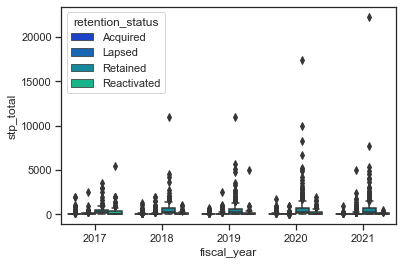

In [195]:
ax = sns.set(style="ticks", palette="pastel") #Update sns version to access set_theme attribute, but investigate all implications before updating te version

# Load the example tips dataset
#tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
ax = sns.boxplot(x="fiscal_year", y="stp_total",
            hue="retention_status", palette='winter',
            data=donor_details)
#sns.despine(offset=10, trim=True)

In [196]:
# >>> g = sns.catplot(x="sex", y="total_bill",
# ...                 hue="smoker", col="time",
# ...                 data=tips, kind="box",
# ...                 height=4, aspect=.7);

In [197]:
# sns.set(style="ticks", palette="pastel") #Update sns version to access set_theme attribute, but investigate all implications before updating te version

# # Load the example tips dataset
# tips = sns.load_dataset("tips")

# # Draw a nested boxplot to show bills by day and time
# sns.boxplot(x="day", y="total_bill",
#             hue="smoker", palette=["m", "g"],
#             data=tips)
# sns.despine(offset=10, trim=True)

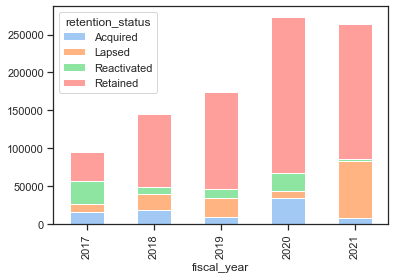

In [204]:
donor_details.pivot_table(values = 'stp_total', index='fiscal_year', columns='retention_status', aggfunc='sum').plot(kind='bar', stacked='True')

#pd.pivot_table(values=donor_details., columns=donor_details['stp_level'], index=donor_details['fiscal_year'])
#ax = donor_details.loc[:, ['retention_status', 'stp_level']].plot(kind='bar')

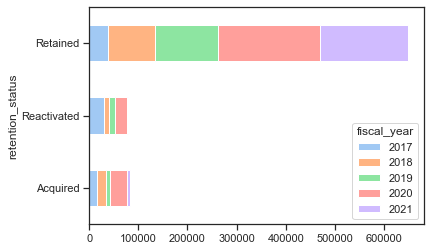

In [200]:
donor_details[donor_details['retention_status'] != 'Lapsed'].pivot_table(values = 'stp_total', index='fiscal_year', columns='retention_status', aggfunc='sum').T.plot(kind='barh', stacked='True')


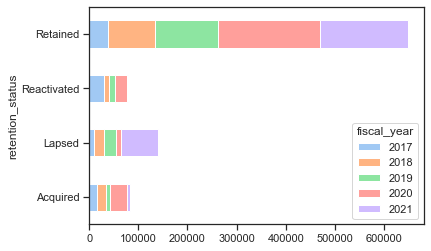

In [201]:
donor_details.pivot_table(values = 'stp_total', index='fiscal_year', columns='retention_status', aggfunc='sum').T.plot(kind='barh', stacked='True')

In [202]:
donor_details.pivot_table(values = 'stp_total', index='fiscal_year', columns='retention_status', aggfunc='sum').T

fiscal_year           2017      2018       2019       2020       2021
retention_status                                                     
Acquired          15912.16  17878.25    9298.63   33649.56    7143.83
Lapsed             9687.50  20994.25   24521.75    9542.17   75284.30
Reactivated       30737.74   9350.50   12548.24   23944.55    3168.75
Retained          38355.26  96438.80  128165.37  206446.81  178582.00

In [203]:
donor_details.pivot_table(values = 'stp_total', index='fiscal_year', columns=['retention_status', 'stp_level'], aggfunc='sum').T

fiscal_year                       2017      2018      2019      2020      2021
retention_status stp_level                                                    
Acquired         Investor      1750.00   1789.00   1202.20   4310.50   1000.00
                 Performer     7115.00   2275.00       NaN   3681.52   1000.00
                 Pre-Steward   3993.16   6239.25   4505.42  14830.10   3465.33
                 Supporter     1150.00   3175.00   1783.01   5884.50   1678.50
                 Underwriter   1904.00   4400.00   1808.00   4942.94       NaN
Lapsed           Director      2500.00       NaN   2500.00       NaN       NaN
                 Investor      1900.00   2620.00   3128.00   1829.00  11725.05
                 Performer     1000.00   9115.00   4020.00   2000.00  11301.52
                 Pre-Steward   1962.50   4515.16   5910.75   4115.17  17939.74
                 Producer          NaN       NaN       NaN       NaN   5000.00
                 Supporter      325.00    941.09   5438.00   1598.00  12918.90
                 Underwriter   2000.00   3803.00   3525.00       NaN  16399.09
Reactivated      Investor      4390.00   2071.75   1811.00   3880.00    791.00
                 Performer    13100.00   2020.00   2000.00   9300.00       NaN
                 Pre-Steward   2506.50   2268.75   1122.24   2948.55   1145.25
                 Producer      5442.25       NaN   5000.00       NaN       NaN
                 Supporter     1505.00   1865.00   1055.00   4023.50    732.50
                 Underwriter   3793.99   1125.00   1560.00   3792.50    500.00
Retained         Director     12053.08  15097.01  16968.00  30960.10  40454.30
                 Investor      5098.00   8729.00  13091.50  22684.82  16070.25
                 Performer     8019.33  36693.04  48723.75  63560.54  52069.07
                 Pre-Steward    795.00   1904.00   3408.00   4240.20   4006.15
                 Producer          NaN  11026.25  21781.00  52747.00  35357.00
                 Supporter     5295.00   8046.50   8178.75   8649.65   8575.48
                 Underwriter   7094.85  14943.00  16014.37  23604.50  22049.75

In [205]:
donor_details.describe(include='all').T

count unique                  top  freq      first  \
account_id                7810   1562      0013600000VKRBG     5        NaT   
fiscal_year               7810      5                 2018  1562        NaT   
ret_rate_xfy              7810    NaN                  NaN   NaN        NaT   
lapse_rate_xfy            7810    NaN                  NaN   NaN        NaT   
number_of_donations_byFY  2565    NaN                  NaN   NaN        NaT   
donor_total_byFY          2565    NaN                  NaN   NaN        NaT   
donor_median_byFY         2565    NaN                  NaN   NaN        NaT   
donor_avg_byFY            2565    NaN                  NaN   NaN        NaT   
donor_max_byFY            2565    NaN                  NaN   NaN        NaT   
donor_min_byFY            2565    NaN                  NaN   NaN        NaT   
donor_last_gift_date      2565    572  2020-12-01 00:00:00   218 2016-07-19   
donor_first_gift_date     2565    751  2020-06-30 00:00:00   105 2007-09-16   
retention_status          3896      4               Lapsed  1331        NaT   
stp_total                 7810    NaN                  NaN   NaN        NaT   
stp_level                 7810      8         Did Not Give  3914        NaT   
currentVlapsed            3896      2              Current  2565        NaT   

                               last     mean      std    min    25%    50%  \
account_id                      NaT      NaN      NaN    NaN    NaN    NaN   
fiscal_year                     NaT      NaN      NaN    NaN    NaN    NaN   
ret_rate_xfy                    NaT    46.93  10.9163  27.58  45.24  47.12   
lapse_rate_xfy                  NaT    53.07  10.9163  41.91  43.38  52.88   
number_of_donations_byFY        NaT  1.54464  1.53077      1      1      1   
donor_total_byFY                NaT  198.066  548.041   0.25     20     50   
donor_median_byFY               NaT  109.421  248.584   0.25     13     50   
donor_avg_byFY                  NaT  116.874  258.182   0.25     15     50   
donor_max_byFY                  NaT  156.854  461.616   0.25     16     50   
donor_min_byFY                  NaT   96.289  240.725   0.25     10     28   
donor_last_gift_date     2021-01-20      NaN      NaN    NaN    NaN    NaN   
donor_first_gift_date    2021-01-20      NaN      NaN    NaN    NaN    NaN   
retention_status                NaT      NaN      NaN    NaN    NaN    NaN   
stp_total                       NaT   121.85  557.599      0      0      0   
stp_level                       NaT      NaN      NaN    NaN    NaN    NaN   
currentVlapsed                  NaT      NaN      NaN    NaN    NaN    NaN   

                            75%    max  
account_id                  NaN    NaN  
fiscal_year                 NaN    NaN  
ret_rate_xfy              56.62  58.09  
lapse_rate_xfy            54.76  72.42  
number_of_donations_byFY      2     28  
donor_total_byFY            150  12045  
donor_median_byFY           100   5000  
donor_avg_byFY            112.5   5000  
donor_max_byFY              125  10000  
donor_min_byFY              100   5000  
donor_last_gift_date        NaN    NaN  
donor_first_gift_date       NaN    NaN  
retention_status            NaN    NaN  
stp_total                    50  22277  
stp_level                   NaN    NaN  
currentVlapsed              NaN    NaN

# Calculate retention rate by stp_level and fy

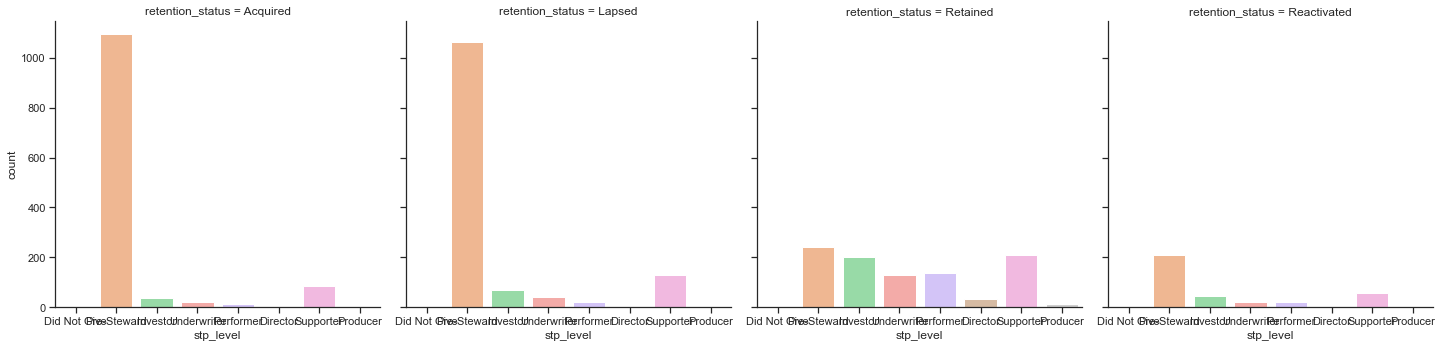

In [206]:
sns.catplot(x='stp_level',col='retention_status',kind='count',data=donor_details)

In [207]:
donor_details.loc[(donor_details.fiscal_year == '2017') & (donor_details.stp_level == 'Supporter'), 'account_id']

215     0013600000VKQlc
243     0013600000VKQma
248     0013600000VKQmm
250     0013600000VKQmt
264     0013600000VKQna
301     0013600000VKQoo
303     0013600000VKQoq
314     0013600000VKQpI
320     0013600000VKQpY
322     0013600000VKQpd
327     0013600000VKQpv
339     0013600000VKQqY
347     0013600000VKQqq
348     0013600000VKQqs
380     0013600000VKQxt
392     0013600000VKQzH
412     0013600000VKR4G
415     0013600000VKR4t
431     0013600000VKR7K
436     0013600000VKR7q
461     0013600000VKRBD
521     0013600000VKRIC
574     0013600000VKRS1
575     0013600000VKRSZ
588     0013600000VKRTp
616     0013600000VKRXf
641     0013600000VKRav
668     0013600000VKRev
670     0013600000VKRfX
681     0013600000VKRh3
691     0013600000VKRjt
693     0013600000VKRkI
709     0013600000VKRmy
716     0013600000VKRoD
741     0013600000VKRrc
746     0013600000VKRsb
804     0013600000YDbzj
844     0013600000YkQ4H
850     0013600000ebAhB
870     0013600000ggdB5
874     0013600000ggdDM
875     00136000

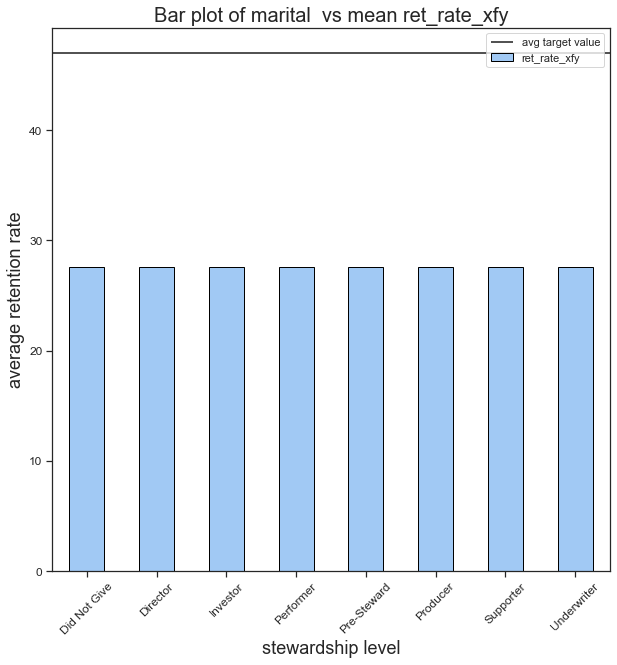

In [208]:
g = donor_details[donor_details['fiscal_year'] == '2021'].groupby("stp_level").mean()
mean_y = donor_details.ret_rate_xfy.mean()
feature = 'ret_rate_xfy'
fig = plt.figure(figsize = (10,10))
plt.title('Bar plot of marital  vs mean ' + feature, fontsize= 20)
d = g[feature]
d.plot(kind = 'bar', edgecolor = 'black')
plt.hlines(mean_y, xmin = -1, xmax = donor_details[donor_details['fiscal_year'] == '2021'].stp_level.nunique(), label = 'avg target value')
plt.xlabel("stewardship level", fontsize= 18)
plt.ylabel('average retention rate', fontsize= 18)
plt.xticks(fontsize= 12, rotation = 45)
plt.yticks(fontsize= 12)
plt.legend()
plt.show()

In [209]:
# g = df.groupby("marital").mean()
# mean_y = df.y.mean()
# feature = 'y'
# fig = plt.figure(figsize = (10,10))
# plt.title('Bar plot of marital  vs mean ' + feature, fontsize= 20)
# d = g[feature]
# d.plot(kind = 'bar', edgecolor = 'black')
# plt.hlines(mean_y, xmin = -1, xmax = df.job.nunique(), label = 'avg target value')
# plt.xlabel("marital categories", fontsize= 18)
# plt.ylabel('average target value', fontsize= 18)
# plt.xticks(fontsize= 12, rotation = 45)
# plt.yticks(fontsize= 12)
# plt.legend()
# plt.show()

In [210]:
stp_stats_fy = donor_details.pivot_table(values = 'stp_total', index='fiscal_year', columns='stp_level', aggfunc='sum').T.set_index(pd.Index(['Did Not Give', 'Pre-Steward', 'Supporter', 'Investor', 'Underwriter', 'Performer', 'Director', 'Producer'])).iloc[1:,]
type(stp_stats_fy)

pandas.core.frame.DataFrame

In [211]:
stp_stats_fy.index

Index(['Pre-Steward', 'Supporter', 'Investor', 'Underwriter', 'Performer',
       'Director', 'Producer'],
      dtype='object')

In [212]:
stp_stats_fy.values

array([[14553.08, 15097.01, 19468.  , 30960.1 , 40454.3 ],
       [13138.  , 15209.75, 19232.7 , 32704.32, 29586.3 ],
       [29234.33, 50103.04, 54743.75, 78542.06, 64370.59],
       [ 9257.16, 14927.16, 14946.41, 26134.02, 26556.47],
       [ 5442.25, 11026.25, 26781.  , 52747.  , 40357.  ],
       [ 8275.  , 14027.59, 16454.76, 20155.65, 23905.38],
       [14792.84, 24271.  , 22907.37, 32339.94, 38948.84]])

In [213]:
stp_stats_fy.columns

Index(['2017', '2018', '2019', '2020', '2021'], dtype='object', name='fiscal_year')

In [214]:
donor_details.head()

account_id fiscal_year  ret_rate_xfy  lapse_rate_xfy  \
0  0011R00001yzm4S        2017         56.62           43.38   
1  0011R00001zaq0m        2017         56.62           43.38   
2  0011R00001zbJNc        2017         56.62           43.38   
3  0011R00001zbJO4        2017         56.62           43.38   
4  0011R00001zcCFw        2017         56.62           43.38   

   number_of_donations_byFY  donor_total_byFY  donor_median_byFY  \
0                       NaN               NaN                NaN   
1                       NaN               NaN                NaN   
2                       NaN               NaN                NaN   
3                       NaN               NaN                NaN   
4                       NaN               NaN                NaN   

   donor_avg_byFY  donor_max_byFY  donor_min_byFY donor_last_gift_date  \
0             NaN             NaN             NaN                  NaT   
1             NaN             NaN             NaN                  NaT   
2             NaN             NaN             NaN                  NaT   
3             NaN             NaN             NaN                  NaT   
4             NaN             NaN             NaN                  NaT   

  donor_first_gift_date retention_status  stp_total     stp_level  \
0                   NaT              NaN        0.0  Did Not Give   
1                   NaT              NaN        0.0  Did Not Give   
2                   NaT              NaN        0.0  Did Not Give   
3                   NaT              NaN        0.0  Did Not Give   
4                   NaT              NaN        0.0  Did Not Give   

  currentVlapsed  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN

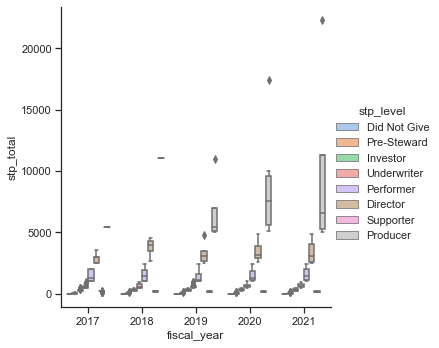

In [215]:
sns.catplot(x='fiscal_year',
            y='stp_total',
            data=donor_details,
            kind='box',
            hue='stp_level')

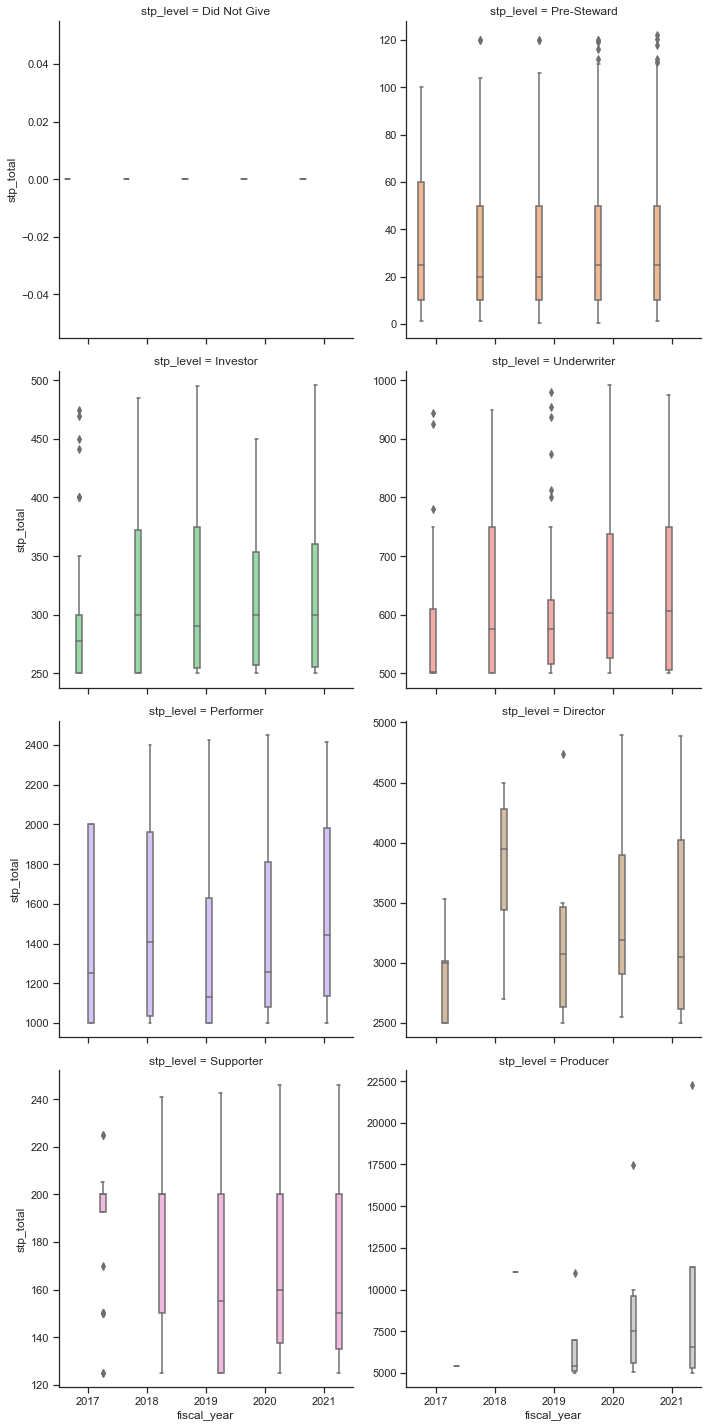

In [216]:
sns.catplot(x='fiscal_year',
            y='stp_total',
            data=donor_details,
            kind='box',
            hue='stp_level',
           col='stp_level',
           col_wrap=2,
           sharex = True,
            sharey=False)

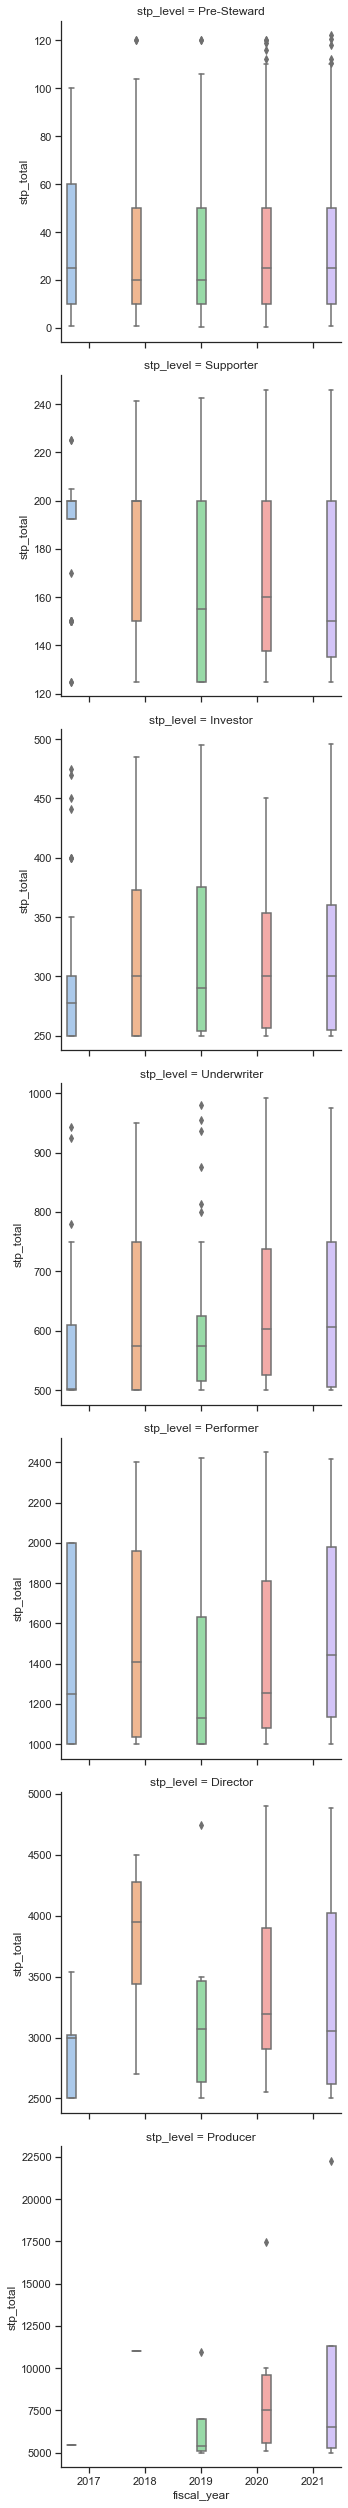

In [217]:
sns.catplot(x='fiscal_year',
            y='stp_total',
            data=donor_details.loc[donor_details.stp_level != 'Did Not Give'],
            kind='box',
            hue='fiscal_year',
           col='stp_level',
           col_wrap=1,
            col_order=['Pre-Steward', 'Supporter', 'Investor', 'Underwriter', 'Performer',
       'Director', 'Producer'],
           sharex = True,
            sharey=False,
           legend_out=True)

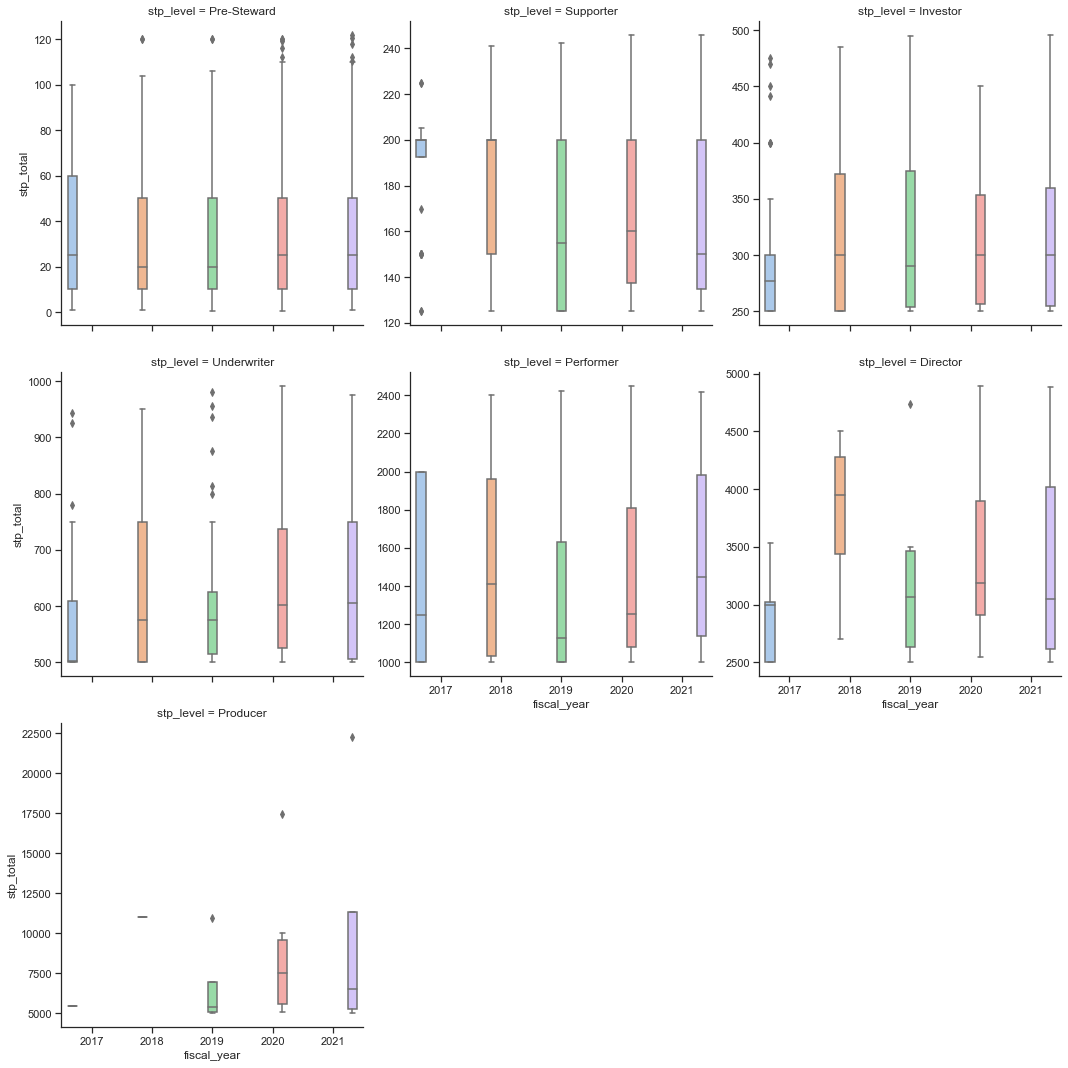

In [218]:
sns.catplot(x='fiscal_year',
            y='stp_total',
            data=donor_details.loc[donor_details.stp_level != 'Did Not Give'],
            kind='box',
            hue='fiscal_year',
           col='stp_level',
           col_wrap=3,
            col_order=['Pre-Steward', 'Supporter', 'Investor', 'Underwriter', 'Performer',
       'Director', 'Producer'],
           sharex = True,
            sharey=False,
           legend_out=True)

In [219]:
#Summary stats showing concrete numbers of graphs above
donor_details.groupby(['stp_level', 'fiscal_year'])['stp_total'].describe().T

stp_level   Did Not Give                                 Director  \
fiscal_year         2017   2018   2019   2020   2021         2017   
count             1191.0  924.0  821.0  468.0  510.0     5.000000   
mean                 0.0    0.0    0.0    0.0    0.0  2910.616000   
std                  0.0    0.0    0.0    0.0    0.0   431.735697   
min                  0.0    0.0    0.0    0.0    0.0  2500.000000   
25%                  0.0    0.0    0.0    0.0    0.0  2500.000000   
50%                  0.0    0.0    0.0    0.0    0.0  3000.000000   
75%                  0.0    0.0    0.0    0.0    0.0  3019.070000   
max                  0.0    0.0    0.0    0.0    0.0  3534.010000   

stp_level                                                          Investor  \
fiscal_year         2018         2019         2020         2021        2017   
count           4.000000     6.000000     9.000000    12.000000   44.000000   
mean         3774.252500  3244.666667  3440.011111  3371.191667  298.590909   
std           790.591636   839.996825   772.079757   835.572716   66.282892   
min          2700.000000  2500.000000  2550.000000  2500.000000  250.000000   
25%          3442.500000  2633.500000  2910.000000  2614.750000  250.000000   
50%          3948.505000  3070.000000  3190.000000  3050.000000  277.500000   
75%          4280.257500  3467.500000  3895.000000  4020.800000  300.000000   
max          4500.000000  4740.000000  4896.100000  4886.100000  475.000000   

stp_level                                                      Performer  \
fiscal_year        2018        2019        2020        2021         2017   
count         48.000000   61.000000  104.000000   93.000000    21.000000   
mean         316.869792  315.290164  314.464615  318.132258  1392.110952   
std           76.597837   68.255275   59.529818   70.136527   426.389760   
min          250.000000  250.000000  250.000000  250.000000  1000.000000   
25%          250.000000  254.000000  256.875000  255.000000  1000.000000   
50%          300.000000  290.000000  300.000000  300.000000  1250.000000   
75%          372.562500  375.000000  353.187500  360.000000  2000.000000   
max          485.000000  495.000000  450.000000  496.000000  2000.000000   

stp_level                                                       Pre-Steward  \
fiscal_year         2018         2019         2020         2021        2017   
count          34.000000    40.000000    54.000000    42.000000  231.000000   
mean         1473.618824  1368.593750  1454.482593  1532.633095   40.074286   
std           430.337224   421.211214   465.470574   455.886967   34.468513   
min          1000.000000  1000.000000  1000.000000  1000.000000    1.000000   
25%          1035.500000  1000.000000  1079.385000  1136.250000   10.000000   
50%          1409.375000  1130.000000  1255.000000  1445.410000   25.000000   
75%          1960.000000  1630.500000  1811.250000  1981.875000   60.000000   
max          2400.000000  2423.000000  2450.000000  2414.000000  100.000000   

stp_level                                                   Producer  \
fiscal_year        2018        2019        2020        2021     2017   
count        434.000000  494.000000  753.000000  698.000000     1.00   
mean          34.394378   30.255891   34.706534   38.046519  5442.25   
std           31.544118   28.516209   31.044774   30.347278      NaN   
min            1.000000    0.250000    0.250000    1.000000  5442.25   
25%           10.000000   10.000000   10.000000   10.000000  5442.25   
50%           20.000000   20.000000   25.000000   25.000000  5442.25   
75%           50.000000   50.000000   50.000000   50.000000  5442.25   
max          120.000000  120.000000  120.000000  122.000000  5442.25   

stp_level                                                         Supporter  \
fiscal_year      2018          2019          2020          2021        2017   
count            1.00      4.000000      6.000000      4.000000   44.000000   
mean    

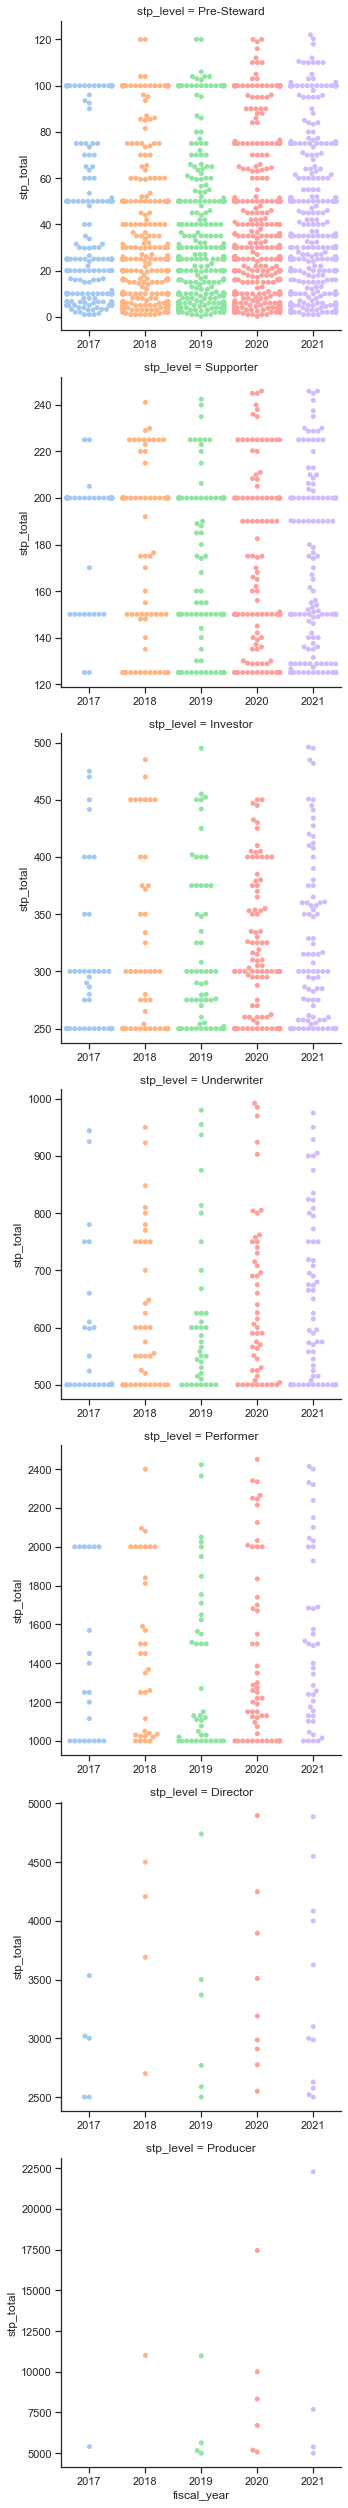

In [220]:
sns.catplot(x='fiscal_year',
            y='stp_total',
            data=donor_details.loc[donor_details.stp_level != 'Did Not Give'],
            kind='swarm',
            hue='fiscal_year',
           col='stp_level',
           col_wrap=1,
            col_order=['Pre-Steward', 'Supporter', 'Investor', 'Underwriter', 'Performer',
       'Director', 'Producer'],
           sharex = False,
            sharey=False,
           legend_out=True)
plt.show()

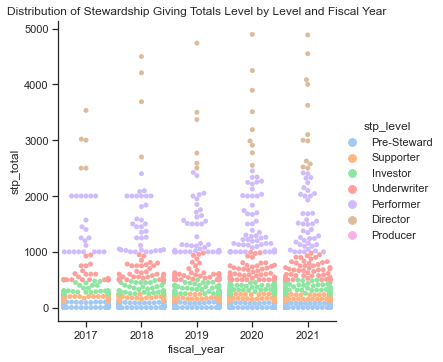

In [221]:
sns.catplot(x='fiscal_year',
            y='stp_total',
            data=donor_details.loc[(donor_details.stp_level != 'Did Not Give') & (donor_details.stp_level != 'Producer')],
            kind='swarm',
            hue='stp_level', hue_order=['Pre-Steward', 'Supporter', 'Investor', 'Underwriter', 'Performer', 'Director', 'Producer'],
           #col='stp_level',
           #col_wrap=1,
            #col_order=['Pre-Steward', 'Supporter', 'Investor', 'Underwriter', 'Performer',
       #'Director', 'Producer'],
           sharex = True,
            sharey=True,
           legend_out=True)
plt.title('Distribution of Stewardship Giving Totals Level by Level and Fiscal Year')
plt.show()

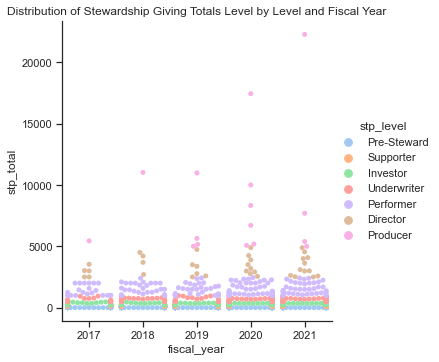

In [222]:
sns.catplot(x='fiscal_year',
            y='stp_total',
            data=donor_details.loc[(donor_details.stp_level != 'Did Not Give')],
            kind='swarm',
            hue='stp_level', hue_order=['Pre-Steward', 'Supporter', 'Investor', 'Underwriter', 'Performer', 'Director', 'Producer'],
           #col='stp_level',
           #col_wrap=1,
            #col_order=['Pre-Steward', 'Supporter', 'Investor', 'Underwriter', 'Performer',
       #'Director', 'Producer'],
           sharex = True,
            sharey=True,
           legend_out=True)
plt.title('Distribution of Stewardship Giving Totals Level by Level and Fiscal Year')
plt.show()

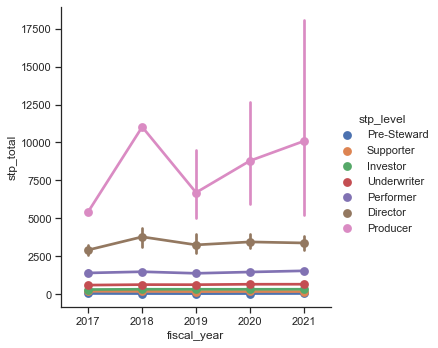

In [316]:
sns.catplot(x='fiscal_year',
            y='stp_total',
            data=donor_details.loc[donor_details.stp_level != 'Did Not Give'],
            kind='point',
            hue='stp_level', hue_order=['Pre-Steward', 'Supporter', 'Investor', 'Underwriter', 'Performer', 'Director', 'Producer'],
           #col='stp_level',
           #col_wrap=1,
            #col_order=['Pre-Steward', 'Supporter', 'Investor', 'Underwriter', 'Performer',
       #'Director', 'Producer'],
           sharex = True,
            sharey=False,
           legend_out=True)
plt.show()

In [320]:
donor_details.loc[donor_details.stp_level != 'Did Not Give',]['stp_level'].value_counts()

Pre-Steward    2610
Supporter       482
Investor        350
Underwriter     211
Performer       191
Director         36
Producer         16
Name: stp_level, dtype: int64

In [321]:
donor_details.loc[donor_details.stp_level != 'Did Not Give', 'stp_level']

180     Pre-Steward
188     Pre-Steward
198        Investor
200     Underwriter
202        Investor
           ...     
7805    Pre-Steward
7806    Pre-Steward
7807    Pre-Steward
7808    Pre-Steward
7809    Pre-Steward
Name: stp_level, Length: 3896, dtype: object

In [323]:
#Filter out 'Did Not Give' records and set similarly filtered stp_level column as df index
donor_details.loc[donor_details.stp_level != 'Did Not Give',].set_index(pd.Index(donor_details.loc[donor_details.stp_level != 'Did Not Give', 'stp_level']))

account_id fiscal_year  ret_rate_xfy  lapse_rate_xfy  \
stp_level                                                                
Pre-Steward  0013600000VKQhm        2017         56.62           43.38   
Pre-Steward  0013600000VKQjK        2017         56.62           43.38   
Investor     0013600000VKQkx        2017         56.62           43.38   
Underwriter  0013600000VKQl1        2017         56.62           43.38   
Investor     0013600000VKQl3        2017         56.62           43.38   
...                      ...         ...           ...             ...   
Pre-Steward  0013p000025LmcD        2021         27.58           72.42   
Pre-Steward  0013p000025LoAk        2021         27.58           72.42   
Pre-Steward  0013p000025MPPB        2021         27.58           72.42   
Pre-Steward  0013p000025Mgo0        2021         27.58           72.42   
Pre-Steward  0013p000025Mmo1        2021         27.58           72.42   

             number_of_donations_byFY  donor_total_byFY  donor_median_byFY  \
stp_level                                                                    
Pre-Steward                       1.0              3.25               3.25   
Pre-Steward                       1.0             10.00              10.00   
Investor                          NaN               NaN                NaN   
Underwriter                       NaN               NaN                NaN   
Investor                          NaN               NaN                NaN   
...                               ...               ...                ...   
Pre-Steward                       1.0              5.00               5.00   
Pre-Steward                       1.0             10.00              10.00   
Pre-Steward                       1.0             10.00              10.00   
Pre-Steward                       1.0              5.00               5.00   
Pre-Steward                       1.0              1.00               1.00   

             donor_avg_byFY  donor_max_byFY  donor_min_byFY  \
stp_level                                                     
Pre-Steward            3.25            3.25            3.25   
Pre-Steward           10.00           10.00           10.00   
Investor                NaN             NaN             NaN   
Underwriter             NaN             NaN             NaN   
Investor                NaN             NaN             NaN   
...                     ...             ...             ...   
Pre-Steward            5.00            5.00            5.00   
Pre-Steward           10.00           10.00           10.00   
Pre-Steward           10.00           10.00           10.00   
Pre-Steward            5.00            5.00            5.00   
Pre-Steward            1.00            1.00            1.00   

            donor_last_gift_date donor_first_gift_date retention_status  \
stp_level                                                                 
Pre-Steward           2019-04-18            2017-06-23         Acquired   
Pre-Steward           2019-03-11            2017-03-16         Acquired   
Investor                     NaT                   NaT           Lapsed   
Underwriter                  NaT                   NaT           Lapsed   
Investor                     NaT                   NaT           Lapsed   
...                          ...                   ...              ...   
Pre-Steward           2021-01-10            2021-01-10         Acquired   
Pre-Steward           2021-01-10            2021-01-10         Acquired   
Pre-Steward           2021-01-11            2021-01-11         Acquired   
Pre-Steward           2021-01-13            2021-01-13         Acquired   
Pre-Steward           2021-01-13            2021-01-13         Acquired   

             stp_total    stp_level currentVlapsed  
stp_level                                           
Pre-Steward       3.25  Pre-Steward        Current  
Pre-Steward      10.00  Pre-Steward        Current  
Investor        250.00     Inves

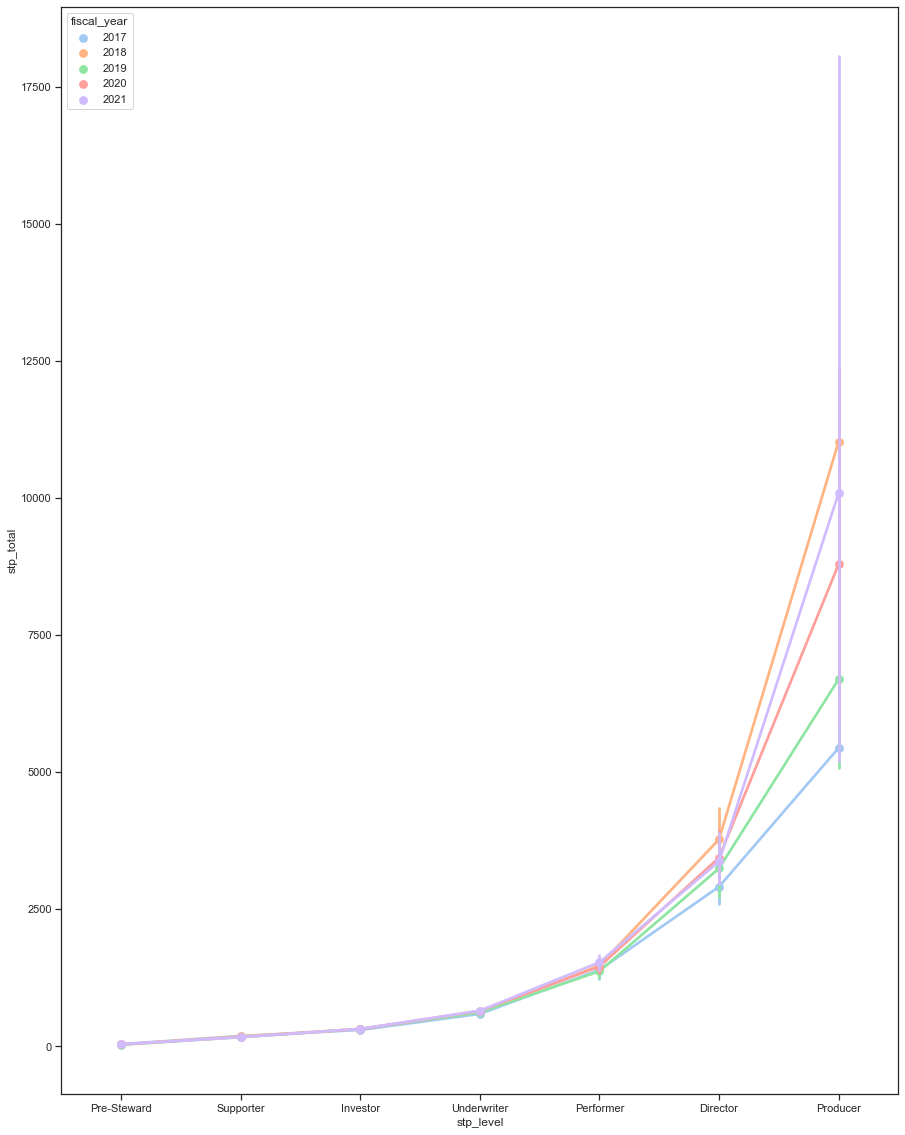

In [225]:
fig, ax = plt.subplots(figsize=(15,20))
ax = sns.pointplot(ax=ax, x='stp_level',
            y='stp_total',
            data=donor_details.loc[donor_details.stp_level != 'Did Not Give'],
            hue='fiscal_year',
            order=['Pre-Steward', 'Supporter', 'Investor', 'Underwriter', 'Performer', 'Director', 'Producer'],
           alpha=.5,
                   #col='stp_level',
           #col_wrap=1,
            #col_order=['Pre-Steward', 'Supporter', 'Investor', 'Underwriter', 'Performer',
       #'Director', 'Producer'],
           sharex = True,
            sharey=False,
           legend_out=True)
plt.show()

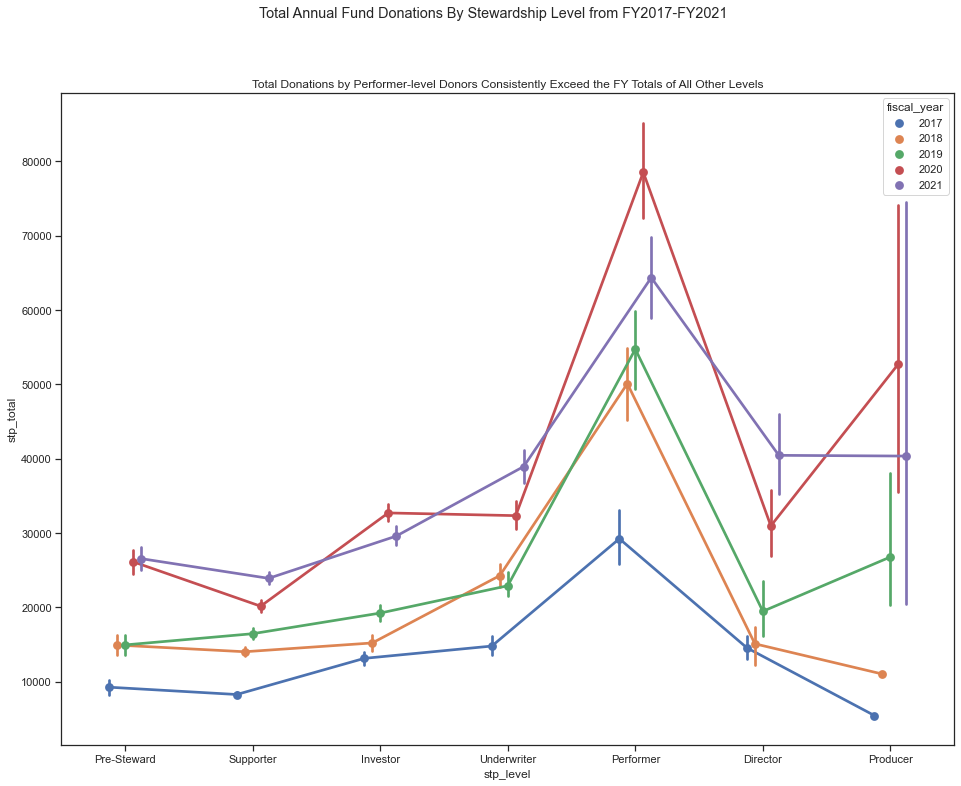

In [337]:
fig, ax = plt.subplots(figsize=(16,12))
ax = sns.pointplot(ax=ax, x='stp_level',
            y='stp_total',
            data=donor_details.loc[donor_details.stp_level != 'Did Not Give'],
            estimator=sum,
            hue='fiscal_year',
            order=['Pre-Steward', 'Supporter', 'Investor', 'Underwriter', 'Performer', 'Director', 'Producer'],
           alpha=.5,
            dodge=.25,
                   #col='stp_level',
           #col_wrap=1,
            #col_order=['Pre-Steward', 'Supporter', 'Investor', 'Underwriter', 'Performer',
       #'Director', 'Producer'],
           sharex = True,
            sharey=False,
           legend_out=True)
plt.suptitle("Total Annual Fund Donations By Stewardship Level from FY2017-FY2021")
plt.title("Performer-level Donors Consistently Account for the Majority of Annual Fund Donations")
plt.show()

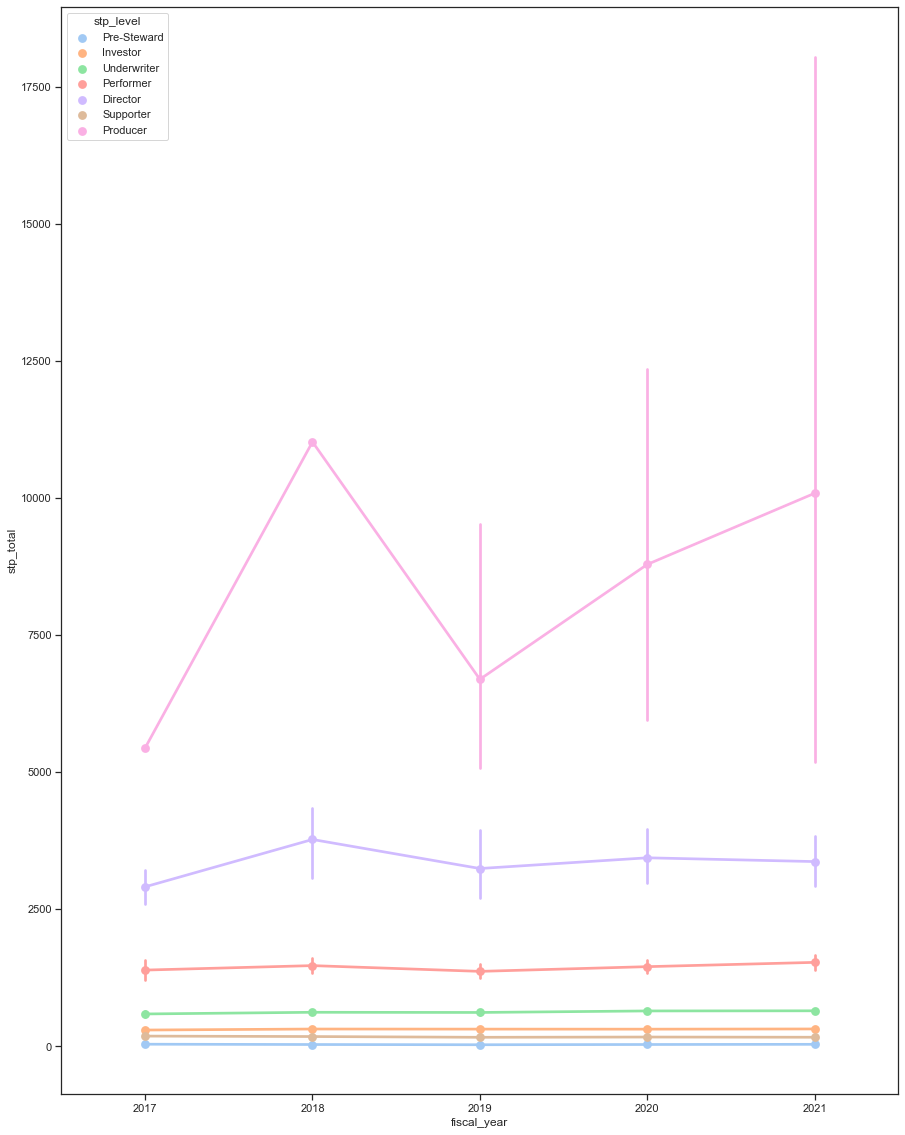

In [226]:
fig, ax = plt.subplots(figsize=(15,20))
ax = sns.pointplot(ax=ax, x='fiscal_year',
            y='stp_total',
            data=donor_details.loc[donor_details.stp_level != 'Did Not Give'],
            #kind='point',
            hue='stp_level',
           #col='stp_level',
           #col_wrap=1,
            #col_order=['Pre-Steward', 'Supporter', 'Investor', 'Underwriter', 'Performer',
       #'Director', 'Producer'],
           sharex = True,
            sharey=False,
           legend_out=True)
plt.show()

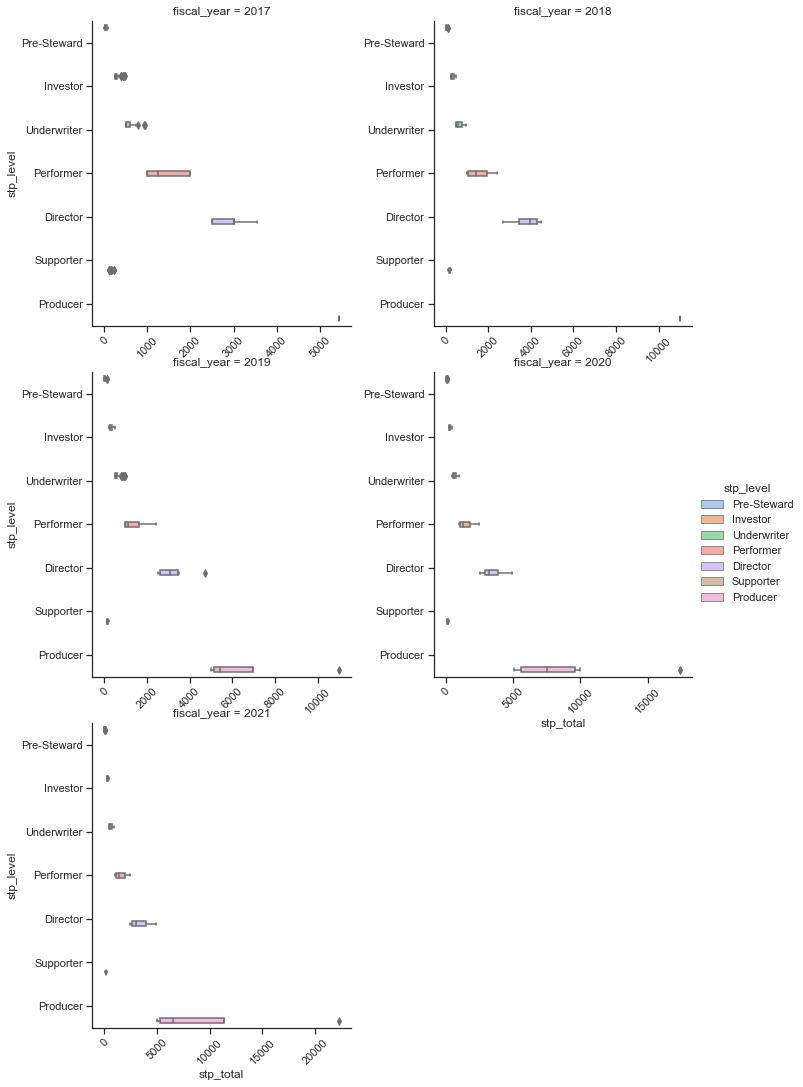

In [227]:
g = sns.catplot(y='stp_level',
            x='stp_total',
            data=donor_details.loc[donor_details.stp_level != 'Did Not Give'],
            kind='box',
            hue='stp_level',
           col='fiscal_year',
           col_wrap=2,
           sharex = False,
            sharey=False,
           legend_out=True)
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

**Reorder Y Axes Above**

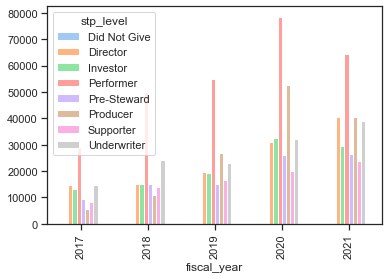

In [228]:
donor_details.pivot_table(values = 'stp_total', index='fiscal_year', columns='stp_level', aggfunc='sum').plot(kind='bar')

In [230]:
#Check that all stewardship levels are present in each season
level_cols = ['stp_total_s28_level', 'stp_total_s27_level', 'stp_total_s26_level', 'stp_total_s25_level', 'stp_total_s24_level',
              'stp_toDate_s28_level', 'stp_toDate_s27_level', 'stp_toDate_s26_level', 'stp_toDate_s25_level', 'stp_toDate_s24_level']
for col in level_cols:
    print(levels_by_season_df[col].value_counts(dropna=False))

Pre-Steward     698
Did Not Give    510
Supporter       143
Investor         93
Underwriter      60
Performer        42
Director         12
Producer          4
Name: stp_total_s28_level, dtype: int64
Pre-Steward     753
Did Not Give    468
Supporter       118
Investor        104
Performer        54
Underwriter      50
Director          9
Producer          6
Name: stp_total_s27_level, dtype: int64
Did Not Give    821
Pre-Steward     494
Supporter        99
Investor         61
Performer        40
Underwriter      37
Director          6
Producer          4
Name: stp_total_s26_level, dtype: int64
Did Not Give    924
Pre-Steward     434
Supporter        78
Investor         48
Underwriter      39
Performer        34
Director          4
Producer          1
Name: stp_total_s25_level, dtype: int64
Did Not Give    1191
Pre-Steward      231
Supporter         44
Investor          44
Underwriter       25
Performer         21
Director           5
Producer           1
Name: stp_total_s24_level, dtype

In [231]:
#Check that all stewardship levels are present in each season (display as relative frequencies)
level_cols = ['stp_total_s28_level', 'stp_total_s27_level', 'stp_total_s26_level', 'stp_total_s25_level', 'stp_total_s24_level',
              'stp_toDate_s28_level', 'stp_toDate_s27_level', 'stp_toDate_s26_level', 'stp_toDate_s25_level', 'stp_toDate_s24_level']
for col in level_cols:
    print(levels_by_season_df[col].value_counts(normalize = True, dropna=False))

Pre-Steward     0.446863
Did Not Give    0.326504
Supporter       0.091549
Investor        0.059539
Underwriter     0.038412
Performer       0.026889
Director        0.007682
Producer        0.002561
Name: stp_total_s28_level, dtype: float64
Pre-Steward     0.482074
Did Not Give    0.299616
Supporter       0.075544
Investor        0.066581
Performer       0.034571
Underwriter     0.032010
Director        0.005762
Producer        0.003841
Name: stp_total_s27_level, dtype: float64
Did Not Give    0.525608
Pre-Steward     0.316261
Supporter       0.063380
Investor        0.039052
Performer       0.025608
Underwriter     0.023688
Director        0.003841
Producer        0.002561
Name: stp_total_s26_level, dtype: float64
Did Not Give    0.591549
Pre-Steward     0.277849
Supporter       0.049936
Investor        0.030730
Underwriter     0.024968
Performer       0.021767
Director        0.002561
Producer        0.000640
Name: stp_total_s25_level, dtype: float64
Did Not Give    0.762484
Pre-Ste

In [353]:
stp_allDonors_s24 = levels_by_season_df.groupby('stp_total_s24_level')['account_id'].count().rename('stp_total_s24_level')
stp_allDonors_s24

stp_total_s24_level
Did Not Give    1191
Director           5
Investor          44
Performer         21
Pre-Steward      231
Producer           1
Supporter         44
Underwriter       25
Name: stp_total_s24_level, dtype: int64

In [339]:
stp_allDonors_s25 = levels_by_season_df.groupby('stp_total_s25_level')['account_id'].count().rename('stp_total_s25_level')

In [340]:
stp_allDonors_s25.loc['Producer'] = 0

In [341]:
stp_allDonors_s25

stp_total_s25_level
Did Not Give    924
Director          4
Investor         48
Performer        34
Pre-Steward     434
Producer          0
Supporter        78
Underwriter      39
Name: stp_total_s25_level, dtype: int64

In [354]:
stp_allDonors_s26 = levels_by_season_df.groupby('stp_total_s26_level')['account_id'].count().rename('stp_total_s26_level')
stp_allDonors_s26

stp_total_s26_level
Did Not Give    821
Director          6
Investor         61
Performer        40
Pre-Steward     494
Producer          4
Supporter        99
Underwriter      37
Name: stp_total_s26_level, dtype: int64

In [355]:
stp_allDonors_s27 = levels_by_season_df.groupby('stp_total_s27_level')['account_id'].count().rename('stp_total_s27_level')
stp_allDonors_s27

stp_total_s27_level
Did Not Give    468
Director          9
Investor        104
Performer        54
Pre-Steward     753
Producer          6
Supporter       118
Underwriter      50
Name: stp_total_s27_level, dtype: int64

In [356]:
stp_allDonors_s28 = levels_by_season_df.groupby('stp_total_s28_level')['account_id'].count().rename('stp_total_s28_level')
stp_allDonors_s28

stp_total_s28_level
Did Not Give    510
Director         12
Investor         93
Performer        42
Pre-Steward     698
Producer          4
Supporter       143
Underwriter      60
Name: stp_total_s28_level, dtype: int64

In [357]:
stp_toDateDonors_s24 = levels_by_season_df.groupby('stp_toDate_s24_level')['account_id'].count().rename('stp_toDate_s24_level')
stp_toDateDonors_s24

stp_toDate_s24_level
Did Not Give    1260
Director           3
Investor          38
Performer         16
Pre-Steward      178
Supporter         41
Underwriter       26
Name: stp_toDate_s24_level, dtype: int64

In [363]:
stp_toDateDonors_s24.loc['Producer'] = 0
stp_toDateDonors_s24

stp_toDate_s24_level
Did Not Give    1260
Director           3
Investor          38
Performer         16
Pre-Steward      178
Supporter         41
Underwriter       26
Producer           0
Name: stp_toDate_s24_level, dtype: int64

In [358]:
stp_toDateDonors_s25 = levels_by_season_df.groupby('stp_toDate_s25_level')['account_id'].count().rename('stp_toDate_s25_level')
stp_toDateDonors_s25

stp_toDate_s25_level
Did Not Give    1121
Director           3
Investor          45
Performer         26
Pre-Steward      280
Producer           1
Supporter         57
Underwriter       29
Name: stp_toDate_s25_level, dtype: int64

In [347]:
#stp_toDateDonors_s25.loc['Producer'] = 0

In [364]:
stp_toDateDonors_s26 = levels_by_season_df.groupby('stp_toDate_s26_level')['account_id'].count().rename('stp_toDate_s26_level')
stp_toDateDonors_s26

stp_toDate_s26_level
Did Not Give    959
Director          5
Investor         47
Performer        27
Pre-Steward     403
Producer          2
Supporter        80
Underwriter      39
Name: stp_toDate_s26_level, dtype: int64

In [349]:
#stp_toDateDonors_s26.loc['Producer'] = 0

In [361]:
stp_toDateDonors_s27 = levels_by_season_df.groupby('stp_toDate_s27_level')['account_id'].count().rename('stp_toDate_s27_level')
stp_toDateDonors_s27

stp_toDate_s27_level
Did Not Give    867
Director          6
Investor         62
Performer        37
Pre-Steward     487
Producer          5
Supporter        62
Underwriter      36
Name: stp_toDate_s27_level, dtype: int64

In [362]:
stp_toDateDonors_s28 = levels_by_season_df.groupby('stp_toDate_s28_level')['account_id'].count().rename('stp_toDate_s28_level')
stp_toDateDonors_s28

stp_toDate_s28_level
Did Not Give    510
Director         12
Investor         93
Performer        42
Pre-Steward     698
Producer          4
Supporter       143
Underwriter      60
Name: stp_toDate_s28_level, dtype: int64

In [365]:
#Concatenate the series above to facilitate visualizing stewardship levels by season
stp_level_dist = (pd.concat([stp_allDonors_s24, stp_allDonors_s25, stp_allDonors_s26, stp_allDonors_s27, stp_allDonors_s28, stp_toDateDonors_s24, stp_toDateDonors_s25, stp_toDateDonors_s26, stp_toDateDonors_s27, stp_toDateDonors_s28], axis=1, join='inner', copy=False))
stp_level_dist

stp_total_s24_level  stp_total_s25_level  stp_total_s26_level  \
Did Not Give                 1191                  924                  821   
Director                        5                    4                    6   
Investor                       44                   48                   61   
Performer                      21                   34                   40   
Pre-Steward                   231                  434                  494   
Producer                        1                    0                    4   
Supporter                      44                   78                   99   
Underwriter                    25                   39                   37   

              stp_total_s27_level  stp_total_s28_level  stp_toDate_s24_level  \
Did Not Give                  468                  510                  1260   
Director                        9                   12                     3   
Investor                      104                   93                    38   
Performer                      54                   42                    16   
Pre-Steward                   753                  698                   178   
Producer                        6                    4                     0   
Supporter                     118                  143                    41   
Underwriter                    50                   60                    26   

              stp_toDate_s25_level  stp_toDate_s26_level  \
Did Not Give                  1121                   959   
Director                         3                     5   
Investor                        45                    47   
Performer                       26                    27   
Pre-Steward                    280                   403   
Producer                         1                     2   
Supporter                       57                    80   
Underwriter                     29                    39   

              stp_toDate_s27_level  stp_toDate_s28_level  
Did Not Give                   867                   510  
Director                         6                    12  
Investor                        62                    93  
Performer                       37                    42  
Pre-Steward                    487                   698  
Producer                         5                     4  
Supporter                       62                   143  
Underwriter                     36                    60

In [366]:
stp_level_dist.index

Index(['Did Not Give', 'Director', 'Investor', 'Performer', 'Pre-Steward',
       'Producer', 'Supporter', 'Underwriter'],
      dtype='object')

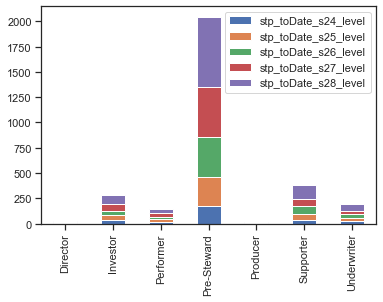

In [367]:
ax = stp_level_dist.iloc[1:,5:].plot(kind='bar', stacked=True)

In [368]:
#Arrange levels in proper order.
stp_level_dist = stp_level_dist.loc[['Did Not Give', 'Pre-Steward', 'Supporter', 'Investor', 'Underwriter', 'Performer', 'Director', 'Producer']]
stp_level_dist

stp_total_s24_level  stp_total_s25_level  stp_total_s26_level  \
Did Not Give                 1191                  924                  821   
Pre-Steward                   231                  434                  494   
Supporter                      44                   78                   99   
Investor                       44                   48                   61   
Underwriter                    25                   39                   37   
Performer                      21                   34                   40   
Director                        5                    4                    6   
Producer                        1                    0                    4   

              stp_total_s27_level  stp_total_s28_level  stp_toDate_s24_level  \
Did Not Give                  468                  510                  1260   
Pre-Steward                   753                  698                   178   
Supporter                     118                  143                    41   
Investor                      104                   93                    38   
Underwriter                    50                   60                    26   
Performer                      54                   42                    16   
Director                        9                   12                     3   
Producer                        6                    4                     0   

              stp_toDate_s25_level  stp_toDate_s26_level  \
Did Not Give                  1121                   959   
Pre-Steward                    280                   403   
Supporter                       57                    80   
Investor                        45                    47   
Underwriter                     29                    39   
Performer                       26                    27   
Director                         3                     5   
Producer                         1                     2   

              stp_toDate_s27_level  stp_toDate_s28_level  
Did Not Give                   867                   510  
Pre-Steward                    487                   698  
Supporter                       62                   143  
Investor                        62                    93  
Underwriter                     36                    60  
Performer                       37                    42  
Director                         6                    12  
Producer                         5                     4

**Merge aFund df with a subset of donor_details to append stewardship level and retention metrics to former in which each row is a donation.**

In [249]:
aFund.shape, donor_details.shape

((4111, 40), (7810, 16))

In [250]:
keep=[0,3,5,7,8,10,11,13,16, 17, 18, 19, 20,22,23,26,28,29,30,31,32]
np.take(aFund.columns, keep)

Index(['account_id', 'donation_record_type', 'close_date', 'mailing_city',
       'mailing_state', 'fund', 'frequency', 'type', 'fiscal_quarter',
       'last_donation_amount', 'last_donation_date', 'close_month',
       'anonymous', 'check_date', 'matching_amount', 'lifetime_donation_count',
       'lifetime_single_ticket_purchase_total', 'lifetime_order_count',
       'stp_total_s28', 'stp_total_s27', 'stp_total_s26'],
      dtype='object')

In [251]:
#Prepare aFund subset to join with donor_details df
#Select relevant columns and filter out rows where fiscal year is 2016 (2016 not included in donor_details df)
# aFund_subset = aFund.loc[,['account_id', 'account_record_type', 'donation_record_type', 'amount',
#        'close_date', 'mailing_city', 'mailing_state', 'fund', 'type', 'stage',
#        'fiscal_year', 'fiscal_quarter', 'last_donation_amount', 'close_month',
#        'anonymous', 'matching_amount', 'lifetime_donation_total_amount',
#        'lifetime_donation_count', 'lifetime_subscription_purchase_total',
#        'lifetime_single_ticket_purchase_total', 'lifetime_order_count']]
# aFund_subset.sort_values('fiscal_year').reset_index(drop=True)

In [252]:
#Prepare aFund subset to join with donor_details df
#Select relevant columns and filter out rows where fiscal year is 2016 (2016 not included in donor_details df)
aFund_subset = aFund.loc[:,['account_id', 'account_record_type', 'donation_record_type', 'amount',
       'close_date', 'mailing_city', 'mailing_state', 'fund', 'type', 'stage',
       'fiscal_year', 'fiscal_quarter', 'last_donation_amount', 'close_month',
       'anonymous', 'matching_amount', 'lifetime_donation_total_amount',
       'lifetime_donation_count', 'lifetime_subscription_purchase_total',
       'lifetime_single_ticket_purchase_total', 'lifetime_order_count']]
aFund_subset.sort_values('fiscal_year').reset_index(drop=True)

account_id account_record_type donation_record_type  amount  \
0     0013600000VKRKh           Household             Donation    50.0   
1     0013600000VKRM5          Individual             Donation    25.0   
2     0013600000VKRkI          Individual             Donation   100.0   
3     0013600000ggdbY          Individual             Donation    50.0   
4     0013600000VKR4t          Individual             Donation   100.0   
...               ...                 ...                  ...     ...   
4106  0013600001YpTJq           Household             Donation    25.0   
4107  0013600001YpTJq           Household             Donation    25.0   
4108  0013600001YpTJq           Household             Donation    25.0   
4109  0013600001koFlU          Individual             Donation    10.0   
4110  0013600000VKRM7           Household             Donation    15.0   

     close_date     mailing_city mailing_state         fund           type  \
0    2016-01-05          Henrico            VA  Annual Fund           Gift   
1    2016-01-05         Richmond            VA  Annual Fund           Gift   
2    2016-01-05  Mechanicsville,            VA  Annual Fund           Gift   
3    2015-12-18         Richmond            VA  Annual Fund           Gift   
4    2015-12-18       Glen Allen            VA  Annual Fund           Gift   
...         ...              ...           ...          ...            ...   
4106 2020-10-22           Durham            NC  Annual Fund            NaN   
4107 2020-11-22           Durham            NC  Annual Fund            NaN   
4108 2020-12-22           Durham            NC  Annual Fund            NaN   
4109 2020-12-01         Richmond            VA  Annual Fund  GivingTuesday   
4110 2020-12-03          henrico            VA  Annual Fund            NaN   

       stage fiscal_year fiscal_quarter  last_donation_amount close_month  \
0     Posted        2016        Q3-2016                128.75           1   
1     Posted        2016        Q3-2016                 50.00           1   
2     Posted        2016        Q3-2016                150.00           1   
3     Posted        2016        Q2-2016                 50.00          12   
4     Posted        2016        Q2-2016                100.00          12   
...      ...         ...            ...                   ...         ...   
4106  Posted        2021        Q2-2021                 25.00          10   
4107  Posted        2021        Q2-2021                 25.00          11   
4108  Posted        2021        Q2-2021                 25.00          12   
4109  Posted        2021        Q2-2021                 10.00          12   
4110  Posted        2021        Q2-2021                 15.00          12   

     anonymous  matching_amount  lifetime_donation_total_amount  \
0            0              0.0                         1133.75   
1            0              0.0                           75.00   
2            0              0.0                          925.00   
3            0              0.0                          180.00   
4            0              0.0                          700.00   
...        ...              ...                             ...   
4106         0              0.0                          890.00   
4107         0              0.0                          890.00   
4108         0              0.0                          890.00   
4109         0              0.0                         3335.00   
4110         0              0.0                          475.00   

      lifetime_donation_count  lifetime_subscription_purchase_total  \
0                        12.0                                   0.0   
1                         2.0                                   0.0   
2                         8.0                                 455.0   
3                         4.0                                   0.0   
4                         4.0                                   0.0   
...                       ...

# Add donor_detail columns to aFund_subset to faciliate deeper analysis.

In [253]:
aFund_donations = pd.merge(aFund_subset, donor_details, how='left', on=['account_id', 'fiscal_year']).sort_values(by=['fiscal_year', 'account_id']).reset_index(drop=True)
aFund_donations.head()

account_id account_record_type donation_record_type  amount  \
0  0013600000VKQkx           Household             Donation   250.0   
1  0013600000VKQl1           Household             Donation   500.0   
2  0013600000VKQl3           Household             Donation   250.0   
3  0013600000VKQl6           Household             Donation   500.0   
4  0013600000VKQlH           Household             Donation  1000.0   

  close_date mailing_city mailing_state         fund  type   stage  \
0 2016-04-19     Richmond            VA  Annual Fund  Gift  Posted   
1 2015-12-30     Richmond            VA  Annual Fund  Gift  Posted   
2 2016-01-18   Midlothian            VA  Annual Fund  Gift  Posted   
3 2015-12-29     Richmond            VA  Annual Fund  Gift  Posted   
4 2015-12-01    Baltimore            MD  Annual Fund  Gift  Posted   

  fiscal_year fiscal_quarter  last_donation_amount close_month anonymous  \
0        2016        Q4-2016                 257.5           4         0   
1        2016        Q2-2016                 500.0          12         0   
2        2016        Q3-2016                 250.0           1         0   
3        2016        Q2-2016                  25.0          12         0   
4        2016        Q2-2016                1000.0          12         0   

   matching_amount  lifetime_donation_total_amount  lifetime_donation_count  \
0              0.0                         3722.50                     19.0   
1              0.0                        15250.00                      9.0   
2              0.0                          350.00                      2.0   
3              0.0                         7085.00                     16.0   
4              0.0                        42546.09                     27.0   

   lifetime_subscription_purchase_total  \
0                                1280.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   

   lifetime_single_ticket_purchase_total  lifetime_order_count  ret_rate_xfy  \
0                                 1921.5                  23.0           NaN   
1                                  263.5                   4.0           NaN   
2                                  439.5                   8.0           NaN   
3                                 1056.5                  15.0           NaN   
4                                   90.0                  35.0           NaN   

   lapse_rate_xfy  number_of_donations_byFY  donor_total_byFY  \
0             NaN                       NaN               NaN   
1             NaN                       NaN               NaN   
2             NaN                       NaN               NaN   
3             NaN                       NaN               NaN   
4             NaN                       NaN               NaN   

   donor_median_byFY  donor_avg_byFY  donor_max_byFY  donor_min_byFY  \
0                NaN             NaN             NaN             NaN   
1                NaN             NaN             NaN             NaN   
2                NaN             NaN             NaN             NaN   
3                NaN             NaN             NaN             NaN   
4                NaN             NaN             NaN             NaN   

  donor_last_gift_date donor_first_gift_date retention_status  stp_total  \
0                  NaT                   NaT              NaN        NaN   
1                  NaT                   NaT              NaN        NaN   
2                  NaT                   NaT              NaN        NaN   
3                  NaT                   NaT              NaN        NaN   
4                  NaT                   NaT              NaN        NaN   

  stp_level currentVlapsed  
0       NaN            NaN  
1       NaN            NaN  
2       NaN            NaN  
3       NaN            NaN  
4       NaN            NaN

In [254]:
donor_details_afund = pd.merge(donor_details, aFund_subset, how='left', on=['account_id', 'fiscal_year']).sort_values(by=['fiscal_year', 'account_id']).reset_index(drop=True)
donor_details_afund.head()

account_id fiscal_year  ret_rate_xfy  lapse_rate_xfy  \
0  0011R00001yzm4S        2017         56.62           43.38   
1  0011R00001zaq0m        2017         56.62           43.38   
2  0011R00001zbJNc        2017         56.62           43.38   
3  0011R00001zbJO4        2017         56.62           43.38   
4  0011R00001zcCFw        2017         56.62           43.38   

   number_of_donations_byFY  donor_total_byFY  donor_median_byFY  \
0                       NaN               NaN                NaN   
1                       NaN               NaN                NaN   
2                       NaN               NaN                NaN   
3                       NaN               NaN                NaN   
4                       NaN               NaN                NaN   

   donor_avg_byFY  donor_max_byFY  donor_min_byFY donor_last_gift_date  \
0             NaN             NaN             NaN                  NaT   
1             NaN             NaN             NaN                  NaT   
2             NaN             NaN             NaN                  NaT   
3             NaN             NaN             NaN                  NaT   
4             NaN             NaN             NaN                  NaT   

  donor_first_gift_date retention_status  stp_total     stp_level  \
0                   NaT              NaN        0.0  Did Not Give   
1                   NaT              NaN        0.0  Did Not Give   
2                   NaT              NaN        0.0  Did Not Give   
3                   NaT              NaN        0.0  Did Not Give   
4                   NaT              NaN        0.0  Did Not Give   

  currentVlapsed account_record_type donation_record_type  amount close_date  \
0            NaN                 NaN                  NaN     NaN        NaT   
1            NaN                 NaN                  NaN     NaN        NaT   
2            NaN                 NaN                  NaN     NaN        NaT   
3            NaN                 NaN                  NaN     NaN        NaT   
4            NaN                 NaN                  NaN     NaN        NaT   

  mailing_city mailing_state fund type stage fiscal_quarter  \
0          NaN           NaN  NaN  NaN   NaN            NaN   
1          NaN           NaN  NaN  NaN   NaN            NaN   
2          NaN           NaN  NaN  NaN   NaN            NaN   
3          NaN           NaN  NaN  NaN   NaN            NaN   
4          NaN           NaN  NaN  NaN   NaN            NaN   

   last_donation_amount close_month anonymous  matching_amount  \
0                   NaN         NaN       NaN              NaN   
1                   NaN         NaN       NaN              NaN   
2                   NaN         NaN       NaN              NaN   
3                   NaN         NaN       NaN              NaN   
4                   NaN         NaN       NaN              NaN   

   lifetime_donation_total_amount  lifetime_donation_count  \
0                             NaN                      NaN   
1                             NaN                      NaN   
2                             NaN                      NaN   
3                             NaN                      NaN   
4                             NaN                      NaN   

   lifetime_subscription_purchase_total  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                                   NaN   
4                                   NaN   

   lifetime_single_ticket_purchase_total  lifetime_order_count  
0                                    NaN                   NaN  
1                                    NaN                   NaN  
2                                    NaN                   NaN  
3                                    NaN                   NaN  
4                                    NaN                   NaN

In [255]:
#Create dataframe of af donation totals by fiscal year and the contributors' stewardship level
totals_fyStp = donor_details_afund.groupby(['fiscal_year', 'stp_level'])['amount'].sum().reset_index()
totals_fyStp

fiscal_year     stp_level    amount
0         2017  Did Not Give      0.00
1         2017      Director   8159.01
2         2017      Investor   8698.00
3         2017     Performer  25357.43
4         2017   Pre-Steward   6894.66
5         2017      Producer   5442.25
6         2017     Supporter   5335.00
7         2017   Underwriter   9439.08
8         2018  Did Not Give      0.00
9         2018      Director   6688.00
10        2018      Investor   9049.75
11        2018     Performer  21059.12
12        2018   Pre-Steward   9630.50
13        2018      Producer   5584.00
14        2018     Supporter   9127.00
15        2018   Underwriter  14198.00
16        2019  Did Not Give      0.00
17        2019      Director  11658.00
18        2019      Investor  10221.20
19        2019     Performer  32074.00
20        2019   Pre-Steward   7303.16
21        2019      Producer  20097.00
22        2019     Supporter   7277.76
23        2019   Underwriter  10566.50
24        2020  Did Not Give      0.00
25        2020      Director  17378.10
26        2020      Investor  21575.08
27        2020     Performer  48642.06
28        2020   Pre-Steward  20504.35
29        2020      Producer  27850.00
30        2020     Supporter  15199.64
31        2020   Underwriter  23236.24
32        2021  Did Not Give      0.00
33        2021      Director  17645.20
34        2021      Investor   8309.75
35        2021     Performer  24940.53
36        2021   Pre-Steward   6551.48
37        2021      Producer  17232.00
38        2021     Supporter   5877.20
39        2021   Underwriter   9237.25

# Use the 3 below (after perfecting them)

In [256]:
totals_fyStp.pivot_table(values='amount', index='fiscal_year', columns='stp_level').loc[:,['Pre-Steward', 'Supporter', 'Investor', 'Underwriter', 'Performer', 'Director', 'Producer']].columns

Index(['Pre-Steward', 'Supporter', 'Investor', 'Underwriter', 'Performer',
       'Director', 'Producer'],
      dtype='object', name='stp_level')

In [373]:
totals_fyStp.pivot_table(values='amount', index='fiscal_year', columns='stp_level').loc[:,['Pre-Steward', 'Supporter', 'Investor', 'Underwriter', 'Performer', 'Director', 'Producer']].unstack().values

array([ 6894.66,  9630.5 ,  7303.16, 20504.35,  6551.48,  5335.  ,
        9127.  ,  7277.76, 15199.64,  5877.2 ,  8698.  ,  9049.75,
       10221.2 , 21575.08,  8309.75,  9439.08, 14198.  , 10566.5 ,
       23236.24,  9237.25, 25357.43, 21059.12, 32074.  , 48642.06,
       24940.53,  8159.01,  6688.  , 11658.  , 17378.1 , 17645.2 ,
        5442.25,  5584.  , 20097.  , 27850.  , 17232.  ])

In [376]:
totals_fyStp.pivot_table(values='amount', index='fiscal_year', columns='stp_level').loc[:,['Pre-Steward', 'Supporter', 'Investor', 'Underwriter', 'Performer', 'Director', 'Producer']].columns

Index(['Pre-Steward', 'Supporter', 'Investor', 'Underwriter', 'Performer',
       'Director', 'Producer'],
      dtype='object', name='stp_level')

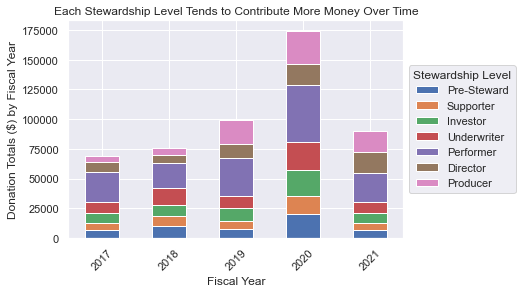

In [258]:
ax = totals_fyStp.pivot_table(values='amount', index='fiscal_year', columns='stp_level').loc[:,['Pre-Steward', 'Supporter', 'Investor', 'Underwriter', 'Performer', 'Director', 'Producer']].plot(kind='bar', stacked=True)
plt.title("Each Stewardship Level Tends to Contribute More Money Over Time")
plt.xlabel("Fiscal Year")
plt.xticks(rotation=45)
plt.ylabel("Donation Totals ($) by Fiscal Year")
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)).set_title('Stewardship Level')

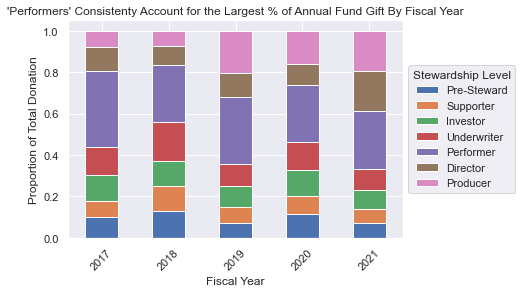

In [377]:
#Plot each stewardship level's contribution to the annual fund totals by fiscal year
ax = pd.crosstab(index=totals_fyStp.fiscal_year, columns=totals_fyStp.stp_level, values=totals_fyStp.amount, aggfunc='max', normalize='index').loc[:,['Pre-Steward', 'Supporter', 'Investor', 'Underwriter', 'Performer', 'Director', 'Producer']].plot(kind='bar', stacked=True, rot=45)
plt.title("'Performers' Consistenty Account for the Largest % of Annual Fund Gift By Fiscal Year")
plt.xlabel("Fiscal Year")
plt.xticks(rotation=45)
plt.ylabel("Proportion of Total Donation")
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)).set_title('Stewardship Level')

In [378]:
pd.crosstab(index=totals_fyStp.fiscal_year, columns=totals_fyStp.stp_level, values=totals_fyStp.amount, aggfunc='max', normalize='index').loc[:,['Pre-Steward', 'Supporter', 'Investor', 'Underwriter', 'Performer', 'Director', 'Producer']]

stp_level    Pre-Steward  Supporter  Investor  Underwriter  Performer  \
fiscal_year                                                             
2017            0.099454   0.076956  0.125466     0.136156   0.365774   
2018            0.127833   0.121150  0.120125     0.188461   0.279535   
2019            0.073622   0.073366  0.103039     0.106520   0.323334   
2020            0.117581   0.087161  0.123721     0.133246   0.278934   
2021            0.072962   0.065452  0.092543     0.102872   0.277755   

stp_level    Director  Producer  
fiscal_year                      
2017         0.117691  0.078503  
2018         0.088775  0.074121  
2019         0.117523  0.202596  
2020         0.099653  0.159704  
2021         0.196509  0.191907

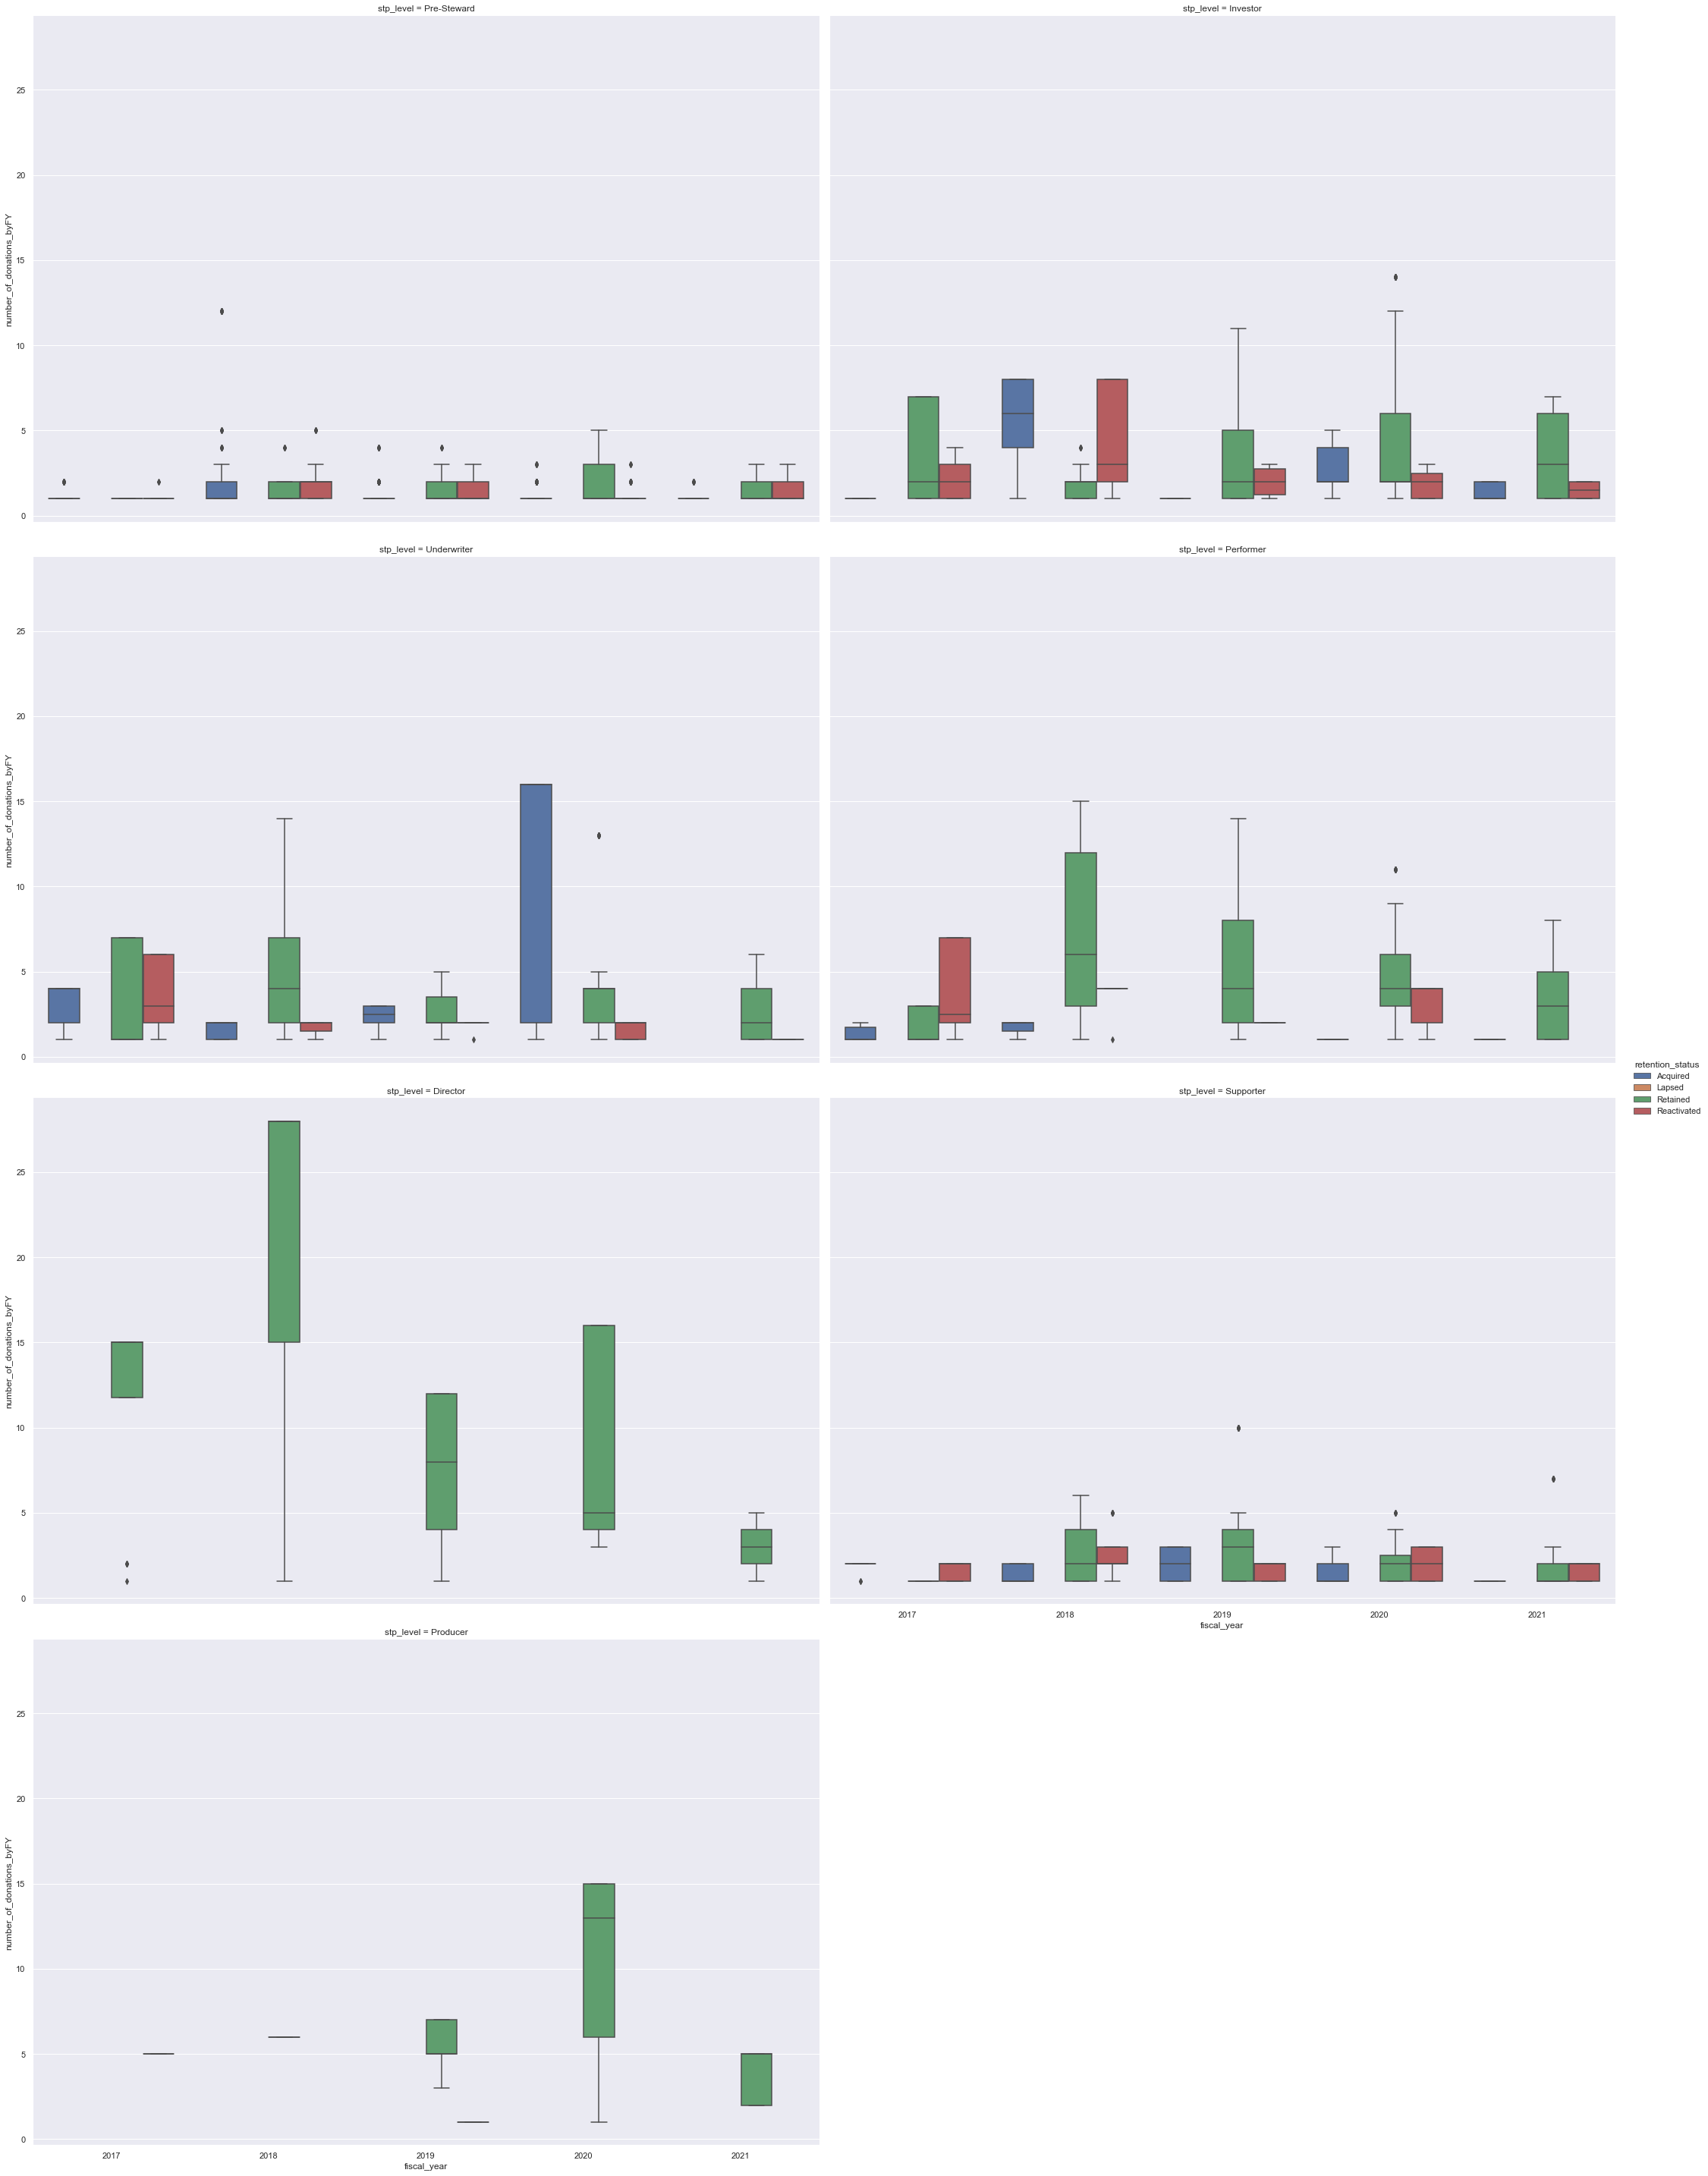

In [379]:
g = sns.catplot(x="fiscal_year", y="number_of_donations_byFY",
                 hue="retention_status", col="stp_level", col_wrap=2,
                 data=donor_details_afund[donor_details_afund.stp_level != 'Did Not Give'], kind="box",
                 height=10, aspect=1.5)

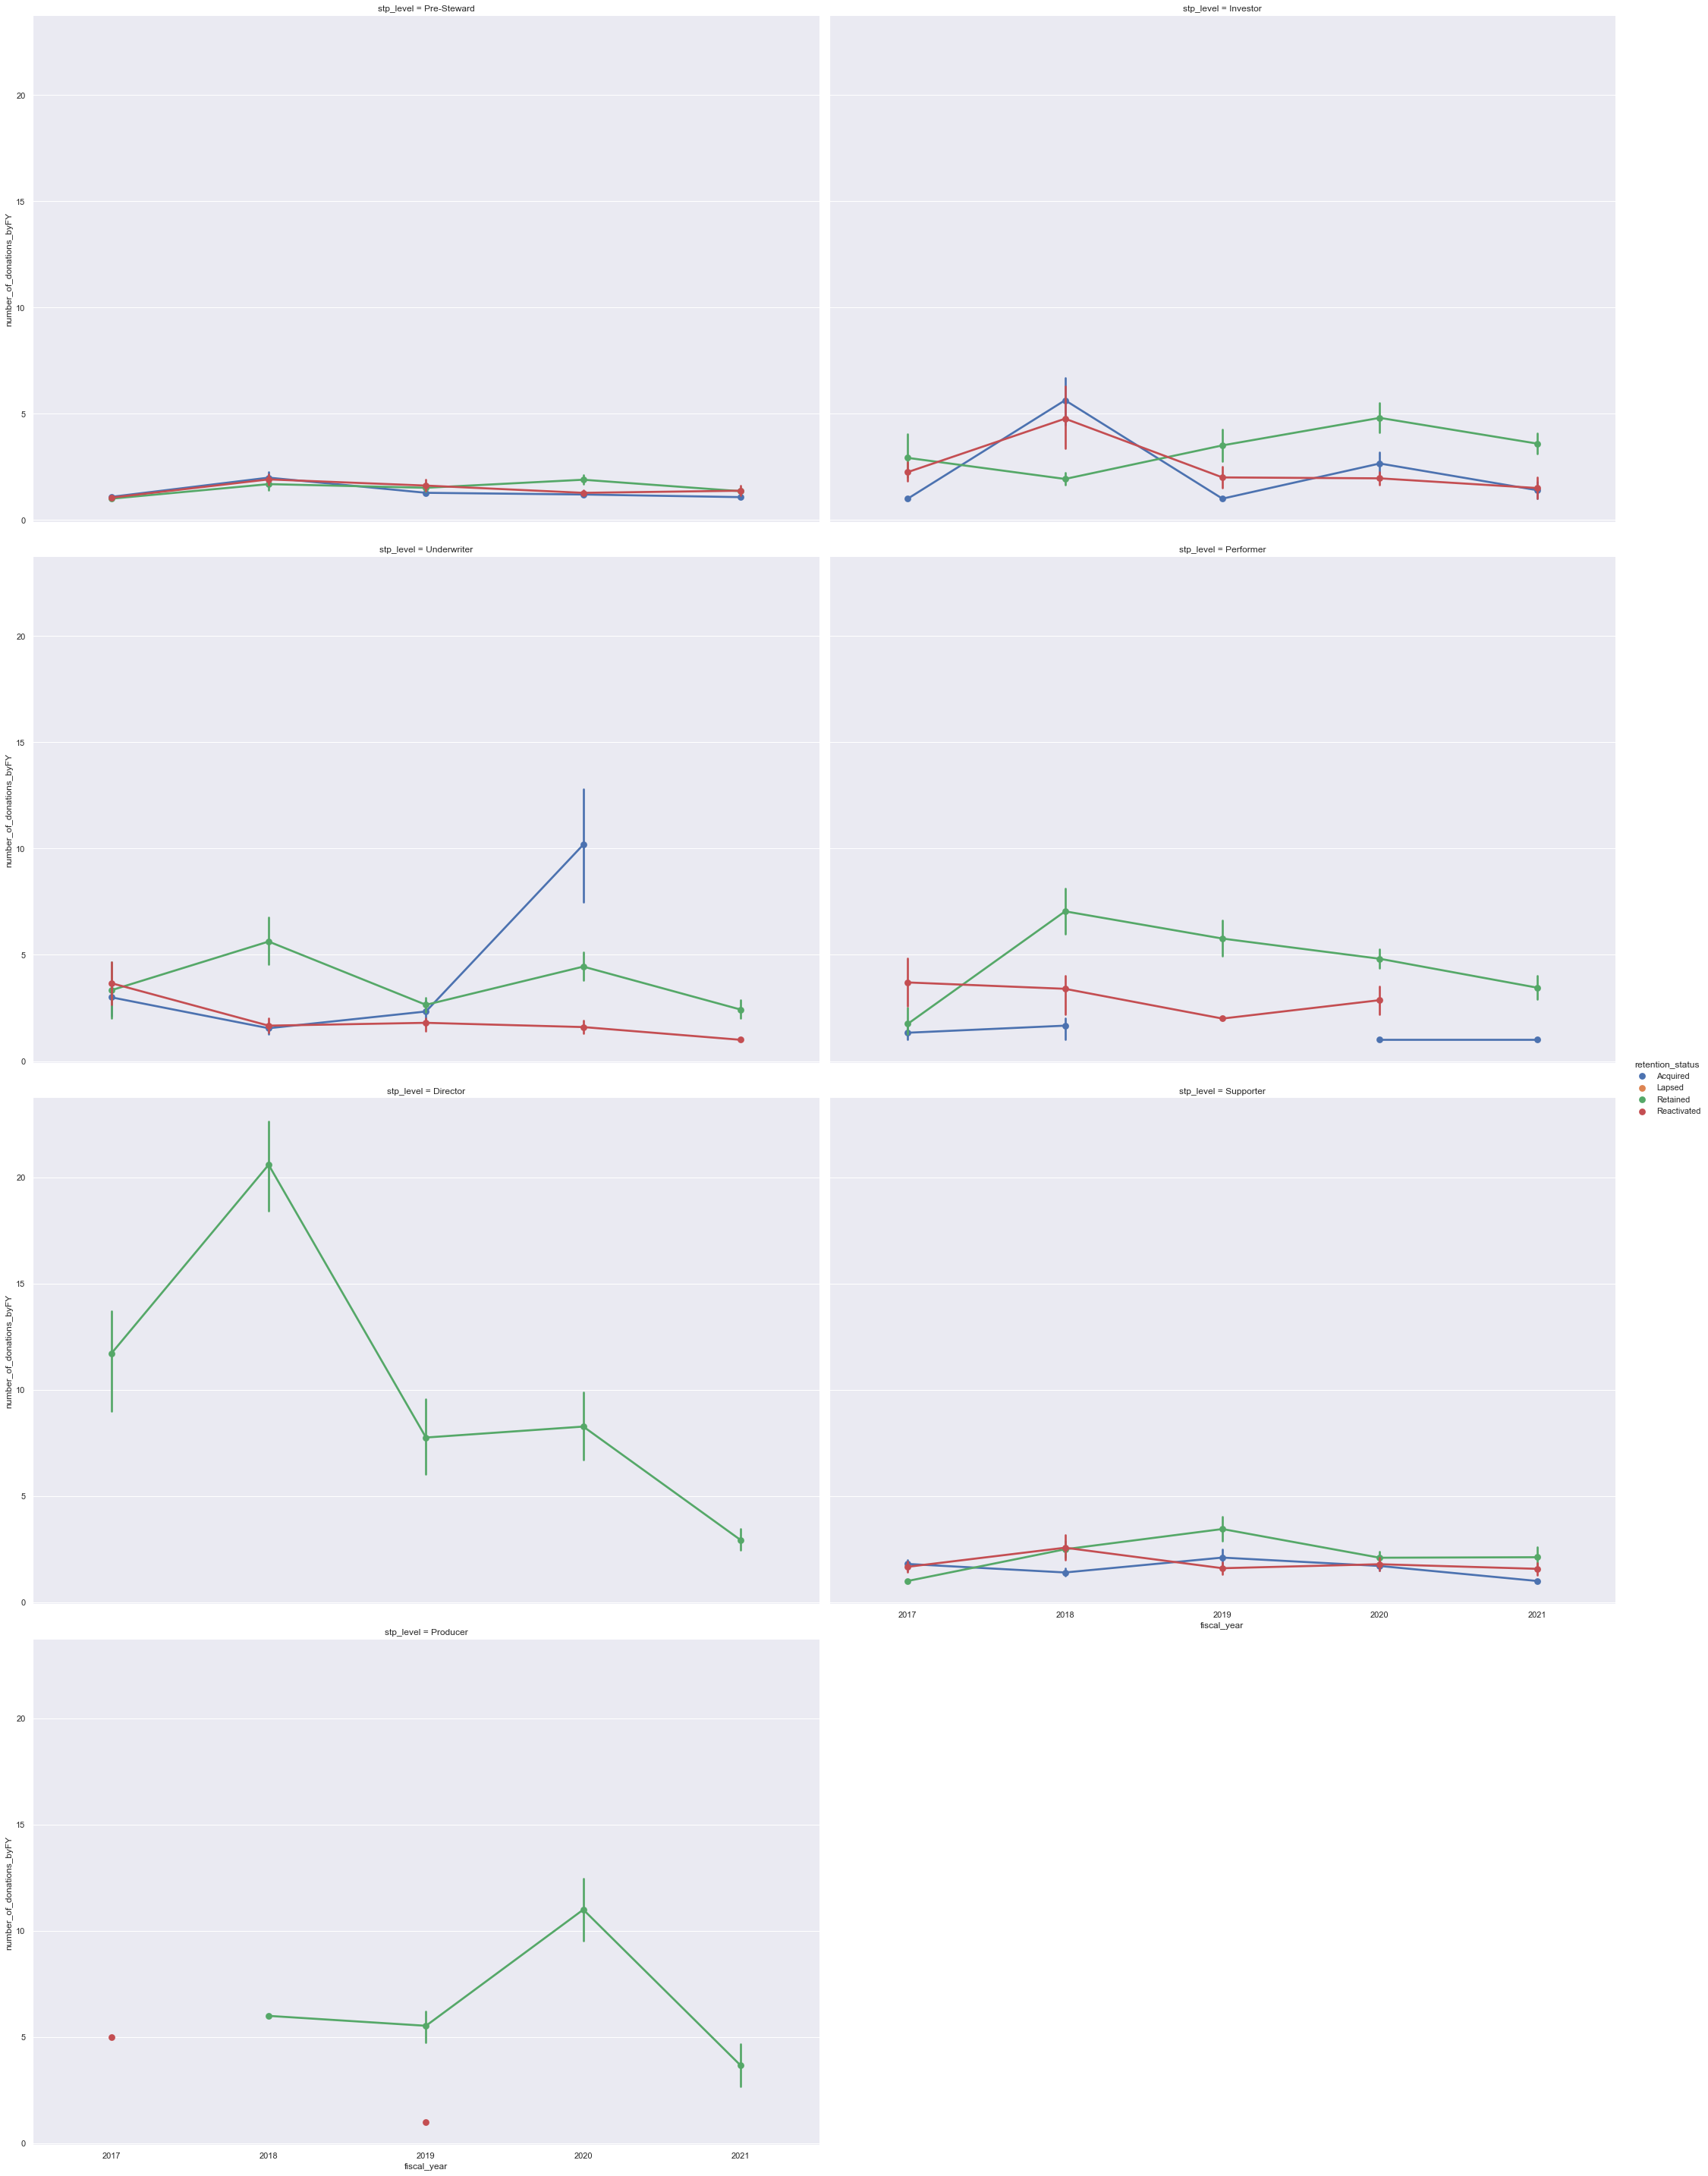

In [380]:
g = sns.catplot(x="fiscal_year", y="number_of_donations_byFY",
                 hue="retention_status", col="stp_level", col_wrap=2,
                 data=donor_details_afund[donor_details_afund.stp_level != 'Did Not Give'], kind="point",
                 height=10, aspect=1.5)


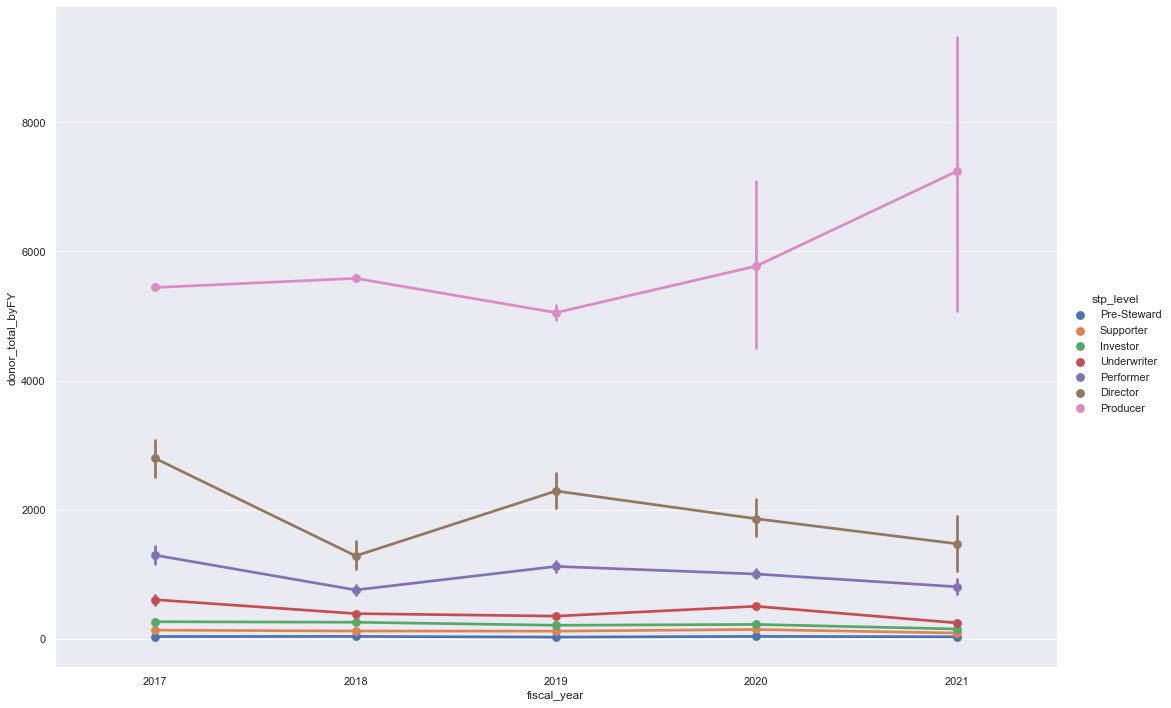

In [381]:
g = sns.catplot(x="fiscal_year", y="donor_total_byFY",
                 hue="stp_level", hue_order=['Pre-Steward', 'Supporter', 'Investor', 'Underwriter', 'Performer', 'Director', 'Producer'],
                 data=donor_details_afund[donor_details_afund.stp_level != 'Did Not Give'], kind="point",
                 height=10, aspect=1.5)

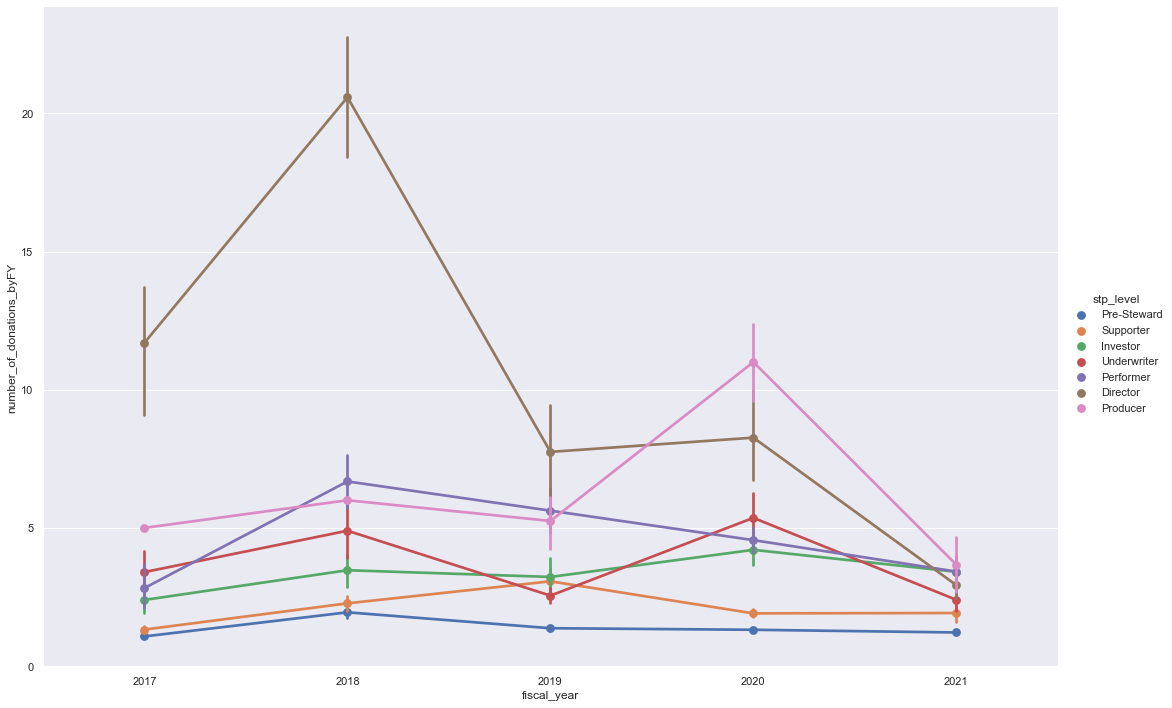

In [382]:
g = sns.catplot(x="fiscal_year", y="number_of_donations_byFY",
                 hue="stp_level", hue_order=['Pre-Steward', 'Supporter', 'Investor', 'Underwriter', 'Performer', 'Director', 'Producer'],
                 data=donor_details_afund[donor_details_afund.stp_level != 'Did Not Give'], kind="point",
                 height=10, aspect=1.5)

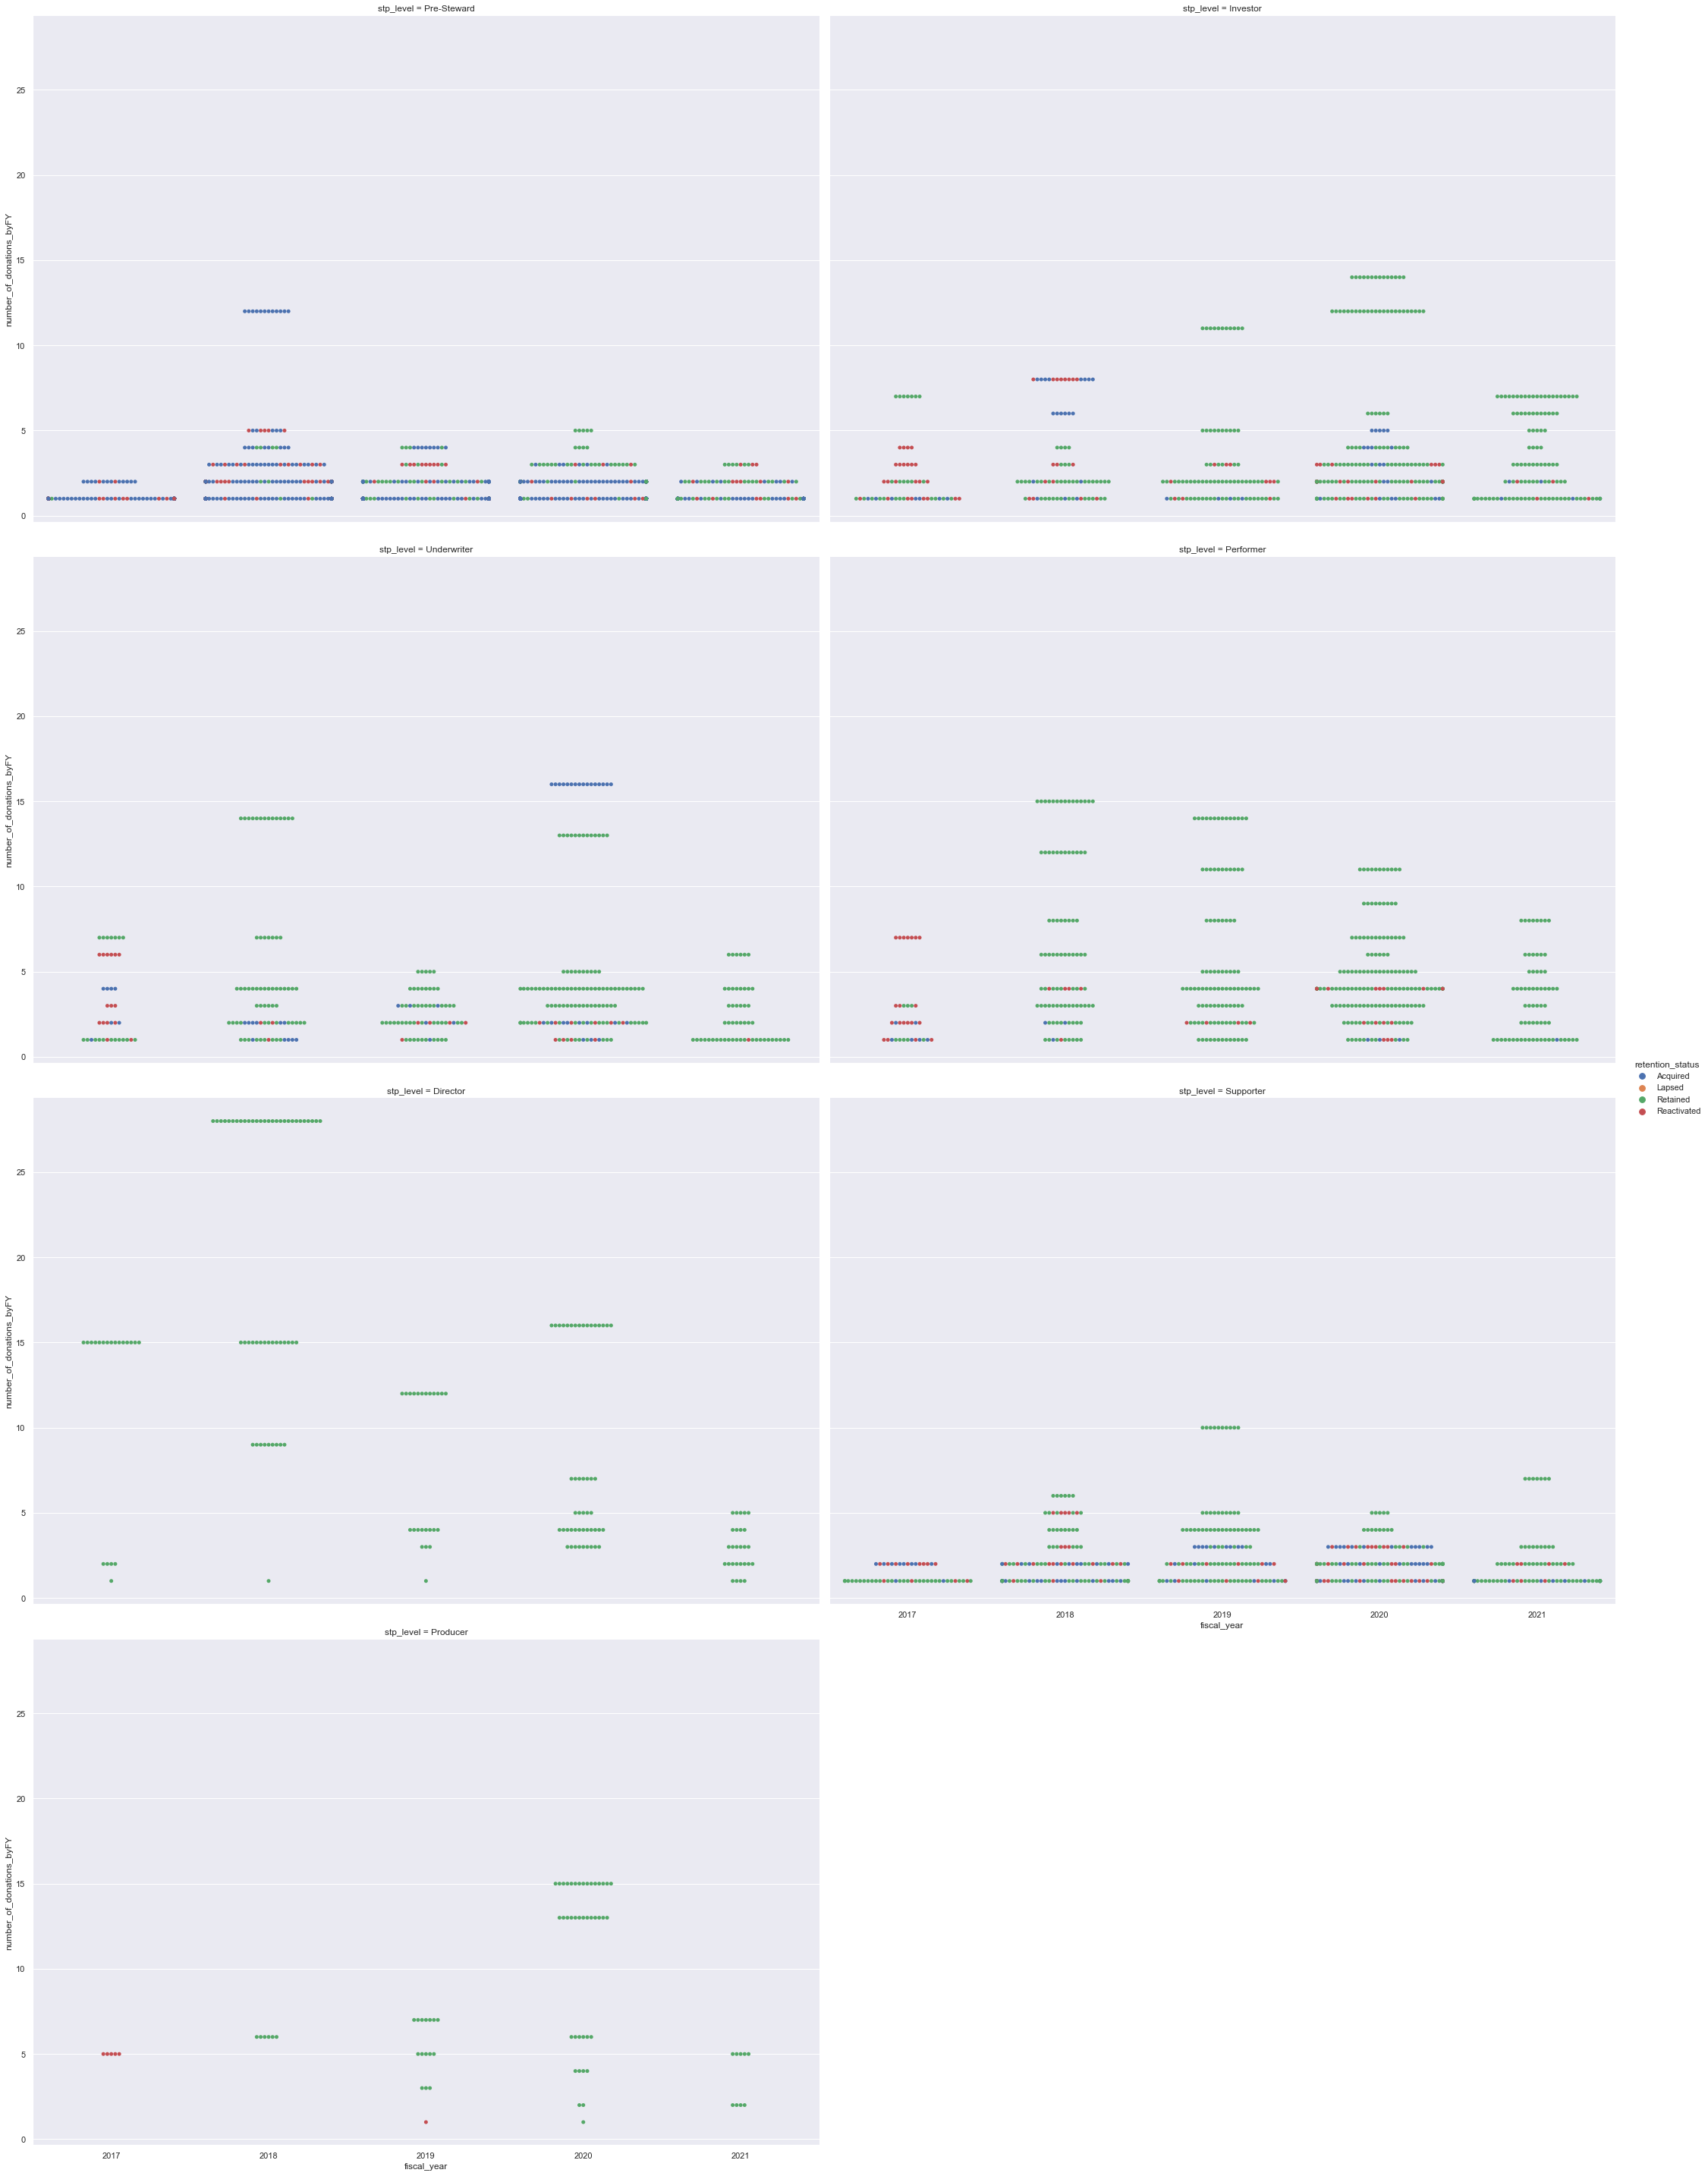

In [383]:
g = sns.catplot(x="fiscal_year", y="number_of_donations_byFY",
                 hue="retention_status", col="stp_level", col_wrap=2,
                 data=donor_details_afund[donor_details_afund.stp_level != 'Did Not Give'], kind="swarm",
                 height=10, aspect=1.5)

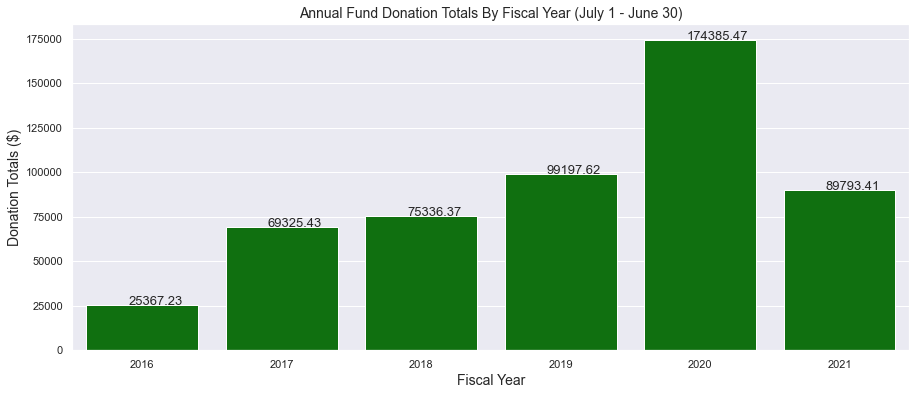

In [384]:
#Plot the annual fund means by fiscal year

#set style
sns.set(style='darkgrid')

#Adjust the plot size
plt.figure(figsize=[15,6])

#Line Plot
sns.barplot(x=aFund.groupby(['fiscal_year'])['amount'].sum().index, y=aFund.groupby(['fiscal_year'])['amount'].sum().values, color='green')

#Assign axis labels:
plt.ylabel('Donation Totals ($)', fontsize=14)
plt.xlabel('Fiscal Year', fontsize=14)
plt.title('Annual Fund Donation Totals By Fiscal Year (July 1 - June 30)', fontsize=14)

#Annotate
# This is the location for the annotated text
i = 1.0
j = 10
# Annotating the bar plot with the values (means by fy)
for i in range(len(np.sort(aFund.fiscal_year.unique()))):
    plt.annotate(round(aFund.groupby(['fiscal_year'])['amount'].sum().loc[['2016', '2017', '2018', '2019', '2020', '2021']], 2).values[i],
                 (-0.1 + i, aFund.groupby(['fiscal_year'])['amount'].sum().loc[['2016', '2017', '2018', '2019', '2020', '2021']].values[i] + j), 
                 fontsize=13)
    
plt.show()

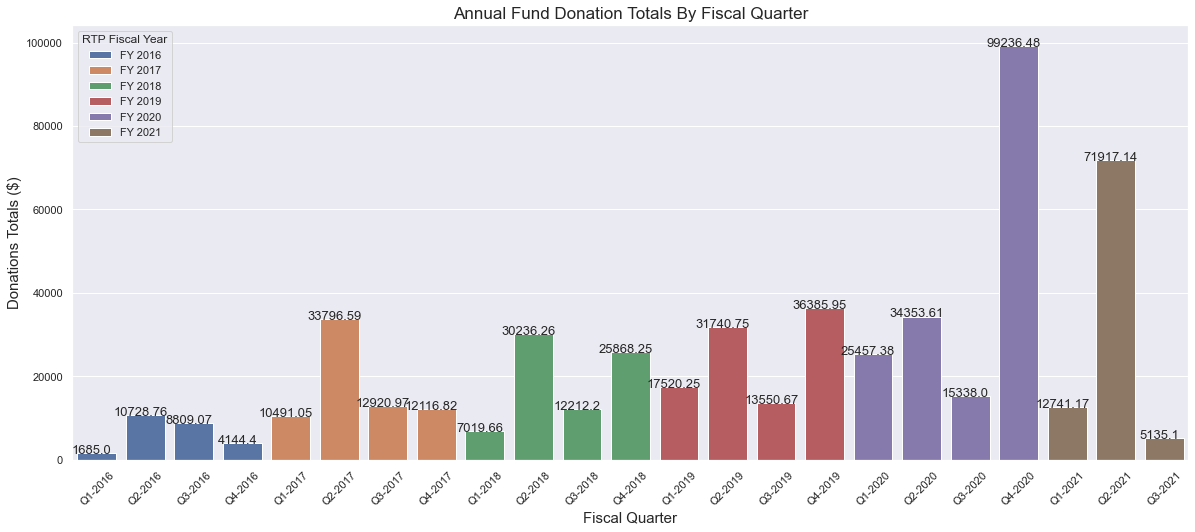

In [385]:
#Plot the annual fund totals by fiscal quarter

#set style
sns.set(style='darkgrid')

#Adjust the plot size
plt.figure(figsize=[20,8])

#Line Plot
g = sns.barplot(x=aFund.groupby(['fiscal_quarter'])['amount'].sum().loc[['Q1-2016', 'Q2-2016', 'Q3-2016','Q4-2016', 'Q1-2017', 'Q2-2017', 'Q3-2017','Q4-2017','Q1-2018', 'Q2-2018', 'Q3-2018','Q4-2018', 'Q1-2019', 'Q2-2019', 'Q3-2019','Q4-2019',
                     'Q1-2020', 'Q2-2020', 'Q3-2020','Q4-2020', 'Q1-2021', 'Q2-2021', 'Q3-2021']].index, 
            y=aFund.groupby(['fiscal_quarter'])['amount'].sum().loc[['Q1-2016', 'Q2-2016', 'Q3-2016','Q4-2016', 'Q1-2017', 'Q2-2017', 'Q3-2017','Q4-2017','Q1-2018', 'Q2-2018', 'Q3-2018','Q4-2018', 'Q1-2019', 'Q2-2019', 'Q3-2019','Q4-2019',
                     'Q1-2020', 'Q2-2020', 'Q3-2020','Q4-2020', 'Q1-2021', 'Q2-2021', 'Q3-2021']].values, 
            hue = fq_wfy['fiscal_year'].values,
           dodge=False)
g.legend(loc='upper left').set_title('RTP Fiscal Year')
#Assign axis labels:
plt.ylabel('Donations Totals ($)', fontsize=15)
plt.xlabel('Fiscal Quarter', fontsize=15)
plt.xticks(rotation=45)
plt.title('Annual Fund Donation Totals By Fiscal Quarter', fontsize=17)

#Annotate
# This is the location for the annotated text
i = 1.0
j = 2000
# Annotating the bar plot with the values 
for i in range(len(['Q1-2016', 'Q2-2016', 'Q3-2016','Q4-2016', 'Q1-2017', 'Q2-2017', 'Q3-2017','Q4-2017','Q1-2018', 'Q2-2018', 'Q3-2018','Q4-2018', 'Q1-2019', 'Q2-2019', 'Q3-2019','Q4-2019',
                     'Q1-2020', 'Q2-2020', 'Q3-2020','Q4-2020', 'Q1-2021', 'Q2-2021', 'Q3-2021'])):
    plt.annotate(round(aFund.groupby(['fiscal_quarter'])['amount'].sum().loc[['Q1-2016', 'Q2-2016', 'Q3-2016','Q4-2016', 'Q1-2017', 'Q2-2017', 'Q3-2017','Q4-2017','Q1-2018', 'Q2-2018', 'Q3-2018','Q4-2018', 'Q1-2019', 'Q2-2019', 'Q3-2019','Q4-2019',
                     'Q1-2020', 'Q2-2020', 'Q3-2020','Q4-2020', 'Q1-2021', 'Q2-2021', 'Q3-2021']], 2).values[i], (-0.1 + i, aFund.groupby(['fiscal_quarter'])['amount'].sum().loc[['Q1-2016', 'Q2-2016', 'Q3-2016','Q4-2016', 'Q1-2017', 'Q2-2017', 'Q3-2017','Q4-2017','Q1-2018', 'Q2-2018', 'Q3-2018','Q4-2018', 'Q1-2019', 'Q2-2019', 'Q3-2019','Q4-2019',
                     'Q1-2020', 'Q2-2020', 'Q3-2020','Q4-2020', 'Q1-2021', 'Q2-2021', 'Q3-2021']].values[i] + j), 
                 horizontalalignment='center',
                 verticalalignment='top',
                 fontsize=13)

KeyError: "None of [Index(['2017', '2018', '2019', '2020', '2021'], dtype='object')] are in the [index]"

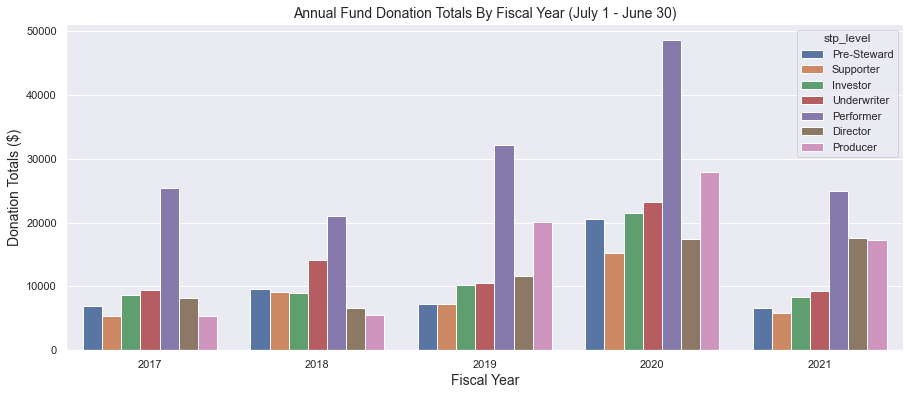

In [432]:
#Come back to fix the keyError here

#Plot the annual fund means by fiscal year

# #set style
# sns.set(style='darkgrid')

# #Adjust the plot size
# plt.figure(figsize=[15,6])

# #Line Plot
# sns.barplot(data=totals_fyStp, x='fiscal_year', y='amount', hue='stp_level', hue_order=['Pre-Steward', 'Supporter', 'Investor', 'Underwriter', 'Performer', 'Director', 'Producer'], ci=None)

# #Assign axis labels:
# plt.ylabel('Donation Totals ($)', fontsize=14)
# plt.xlabel('Fiscal Year', fontsize=14)
# plt.title('Annual Fund Donation Totals By Fiscal Year (July 1 - June 30)', fontsize=14)

# #Annotate
# # This is the location for the annotated text
# i = 1.0
# j = 10
# # Annotating the bar plot with the values (means by fy)
# for i in range(len(np.sort(aFund.fiscal_year.unique()))):
#     plt.annotate(round(totals_fyStp['amount'].loc[['2017', '2018', '2019', '2020', '2021']], 2).values[i],
#                  (-0.1 + i, totals_fyStp['amount'].loc[['2017', '2018', '2019', '2020', '2021']].values[i] + j), 
#                  fontsize=13)
    
# plt.show()

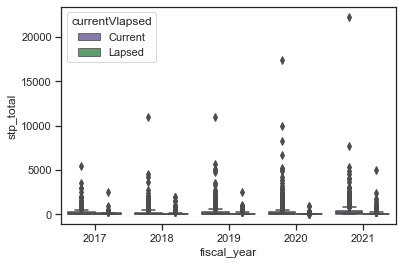

In [389]:
ax = sns.set(style="ticks") #Update sns version to access set_theme attribute, but investigate all implications before updating te version

# Load the example tips dataset
#tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
ax = sns.boxplot(x="fiscal_year", y="stp_total",
            hue='currentVlapsed', palette=["m", "g"],
            data=donor_details)
#sns.despine(offset=10, trim=True)

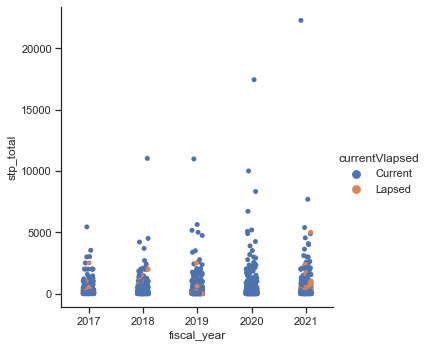

In [390]:
sns.set(style="ticks")
g = sns.catplot(x="fiscal_year", y="stp_total",
            hue='currentVlapsed',
            data=donor_details)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

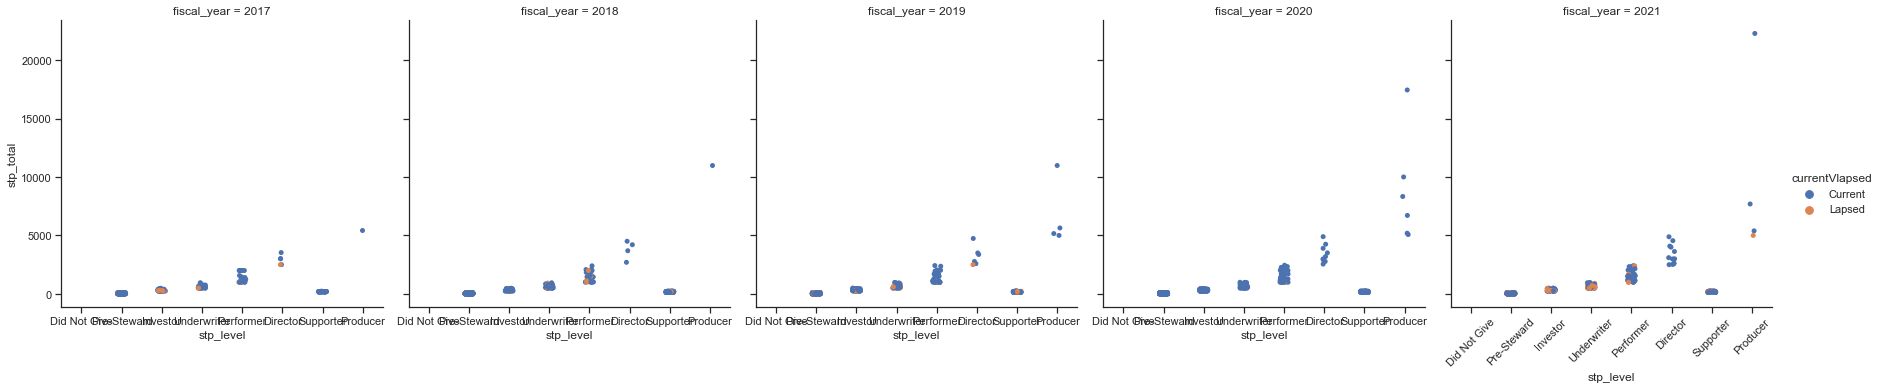

In [391]:
sns.set(style="ticks")
g = sns.catplot(x='stp_level', y="stp_total",
            hue='currentVlapsed', col="fiscal_year",
            data=donor_details)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

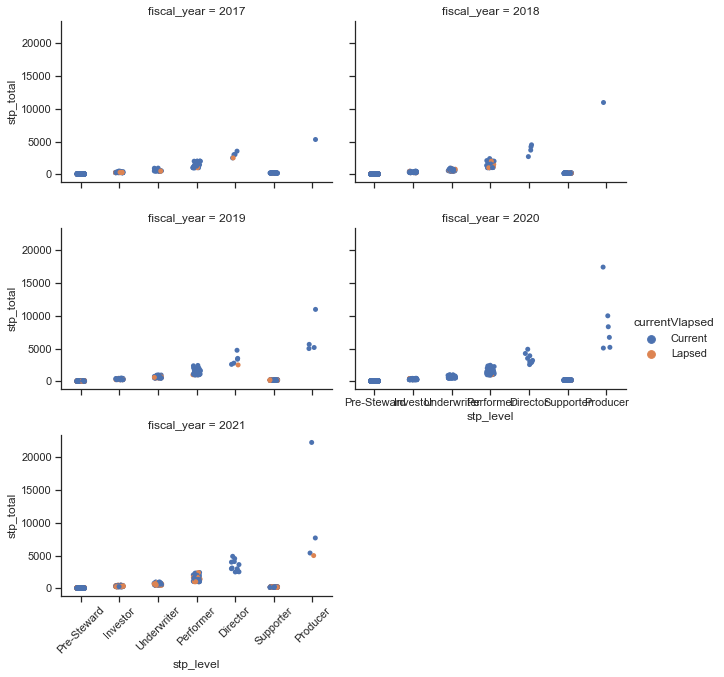

In [392]:
sns.set(style="ticks")
g = sns.catplot(x='stp_level', y="stp_total",
            hue='currentVlapsed', col="fiscal_year", col_wrap=2,
            data=donor_details[donor_details.stp_level != 'Did Not Give'],  height=3, aspect=1.5, jitter=True)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

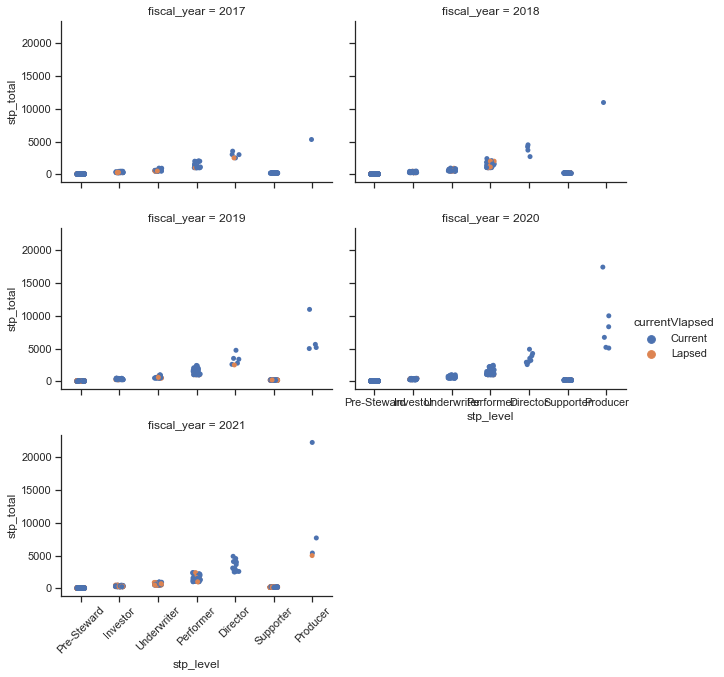

In [393]:
sns.set(style="ticks")
g = sns.catplot(x='stp_level', y="stp_total",
            hue='currentVlapsed', col="fiscal_year", col_wrap=2,
            data=donor_details[donor_details.stp_level != 'Did Not Give'],  height=3, aspect=1.5)
plt.xticks(rotation=45)

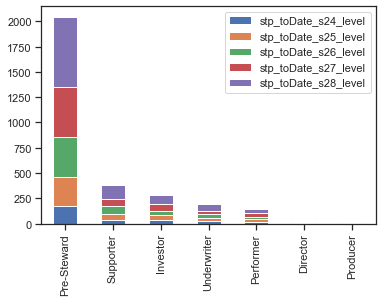

In [394]:
ax = stp_level_dist.iloc[1:,5:].plot(kind='bar', stacked=True)

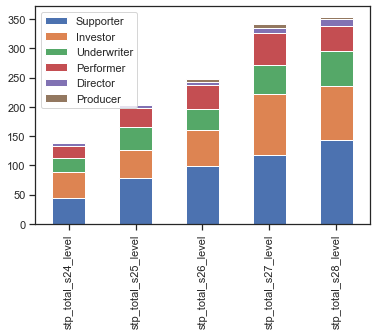

In [395]:
ax = stp_level_dist.iloc[2:,0:5].T.plot(kind='bar', stacked=True)

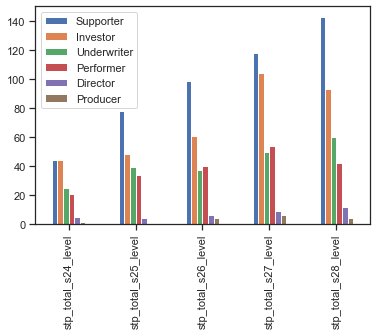

In [396]:
ax = stp_level_dist.iloc[2:,0:5].T.plot(kind='bar', stacked=False)

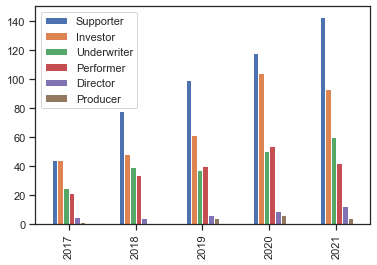

In [397]:
ax = stp_level_dist.iloc[2:,0:5].T.set_index(pd.Index(['2017', '2018', '2019', '2020', '2021'])).plot(kind='bar', stacked=False) 

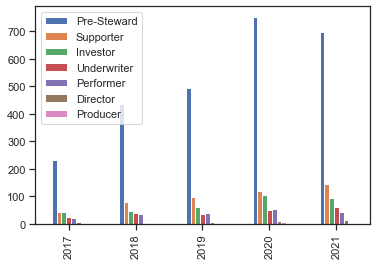

In [398]:
ax = stp_level_dist.iloc[1:,0:5].T.set_index(pd.Index(['2017', '2018', '2019', '2020', '2021'])).plot(kind='bar', stacked=False)
ax.legend(loc='upper left')#.set_title('Stewardship Level')
plt.show()

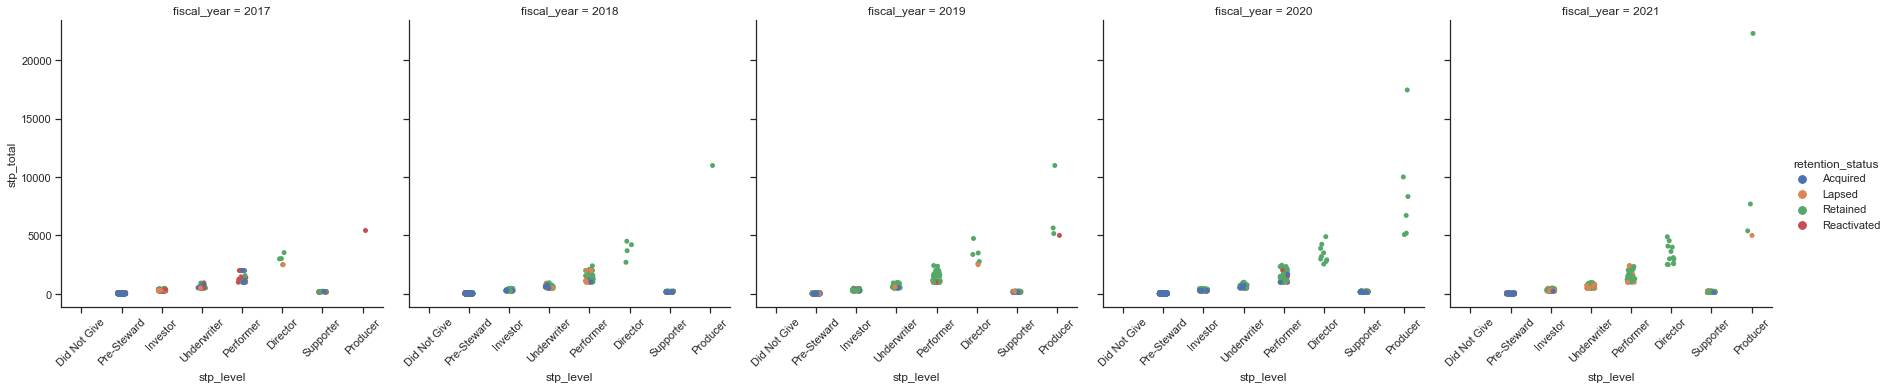

In [399]:
sns.set(style="ticks")
g = sns.catplot(x='stp_level', y="stp_total",
            hue='retention_status', col="fiscal_year",
            data=donor_details)
#plt.xticks(rotation=45)
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

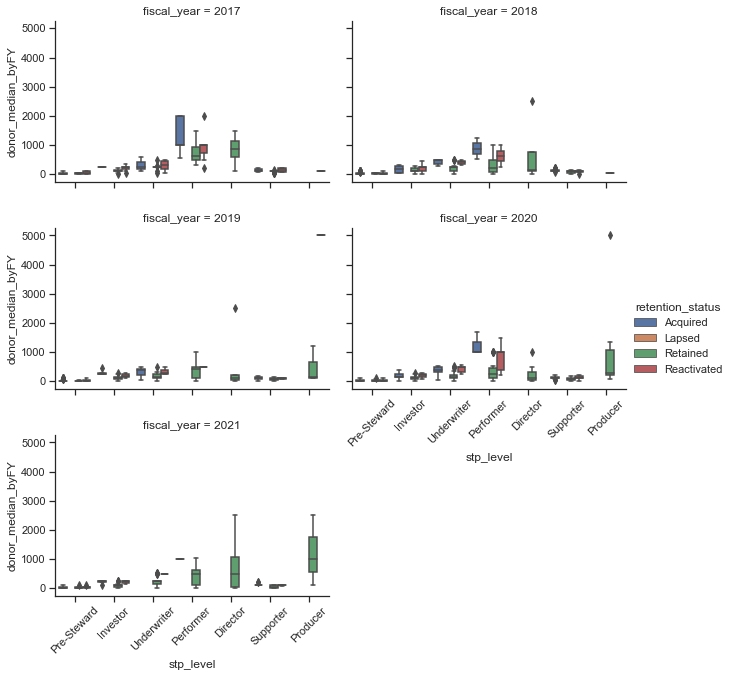

In [400]:

sns.set(style="ticks")
g = sns.catplot(x='stp_level', y="donor_median_byFY",
            hue='retention_status', col="fiscal_year", kind='box',
            col_wrap=2,
            data=donor_details[donor_details.stp_level != 'Did Not Give'],  height=3, aspect=1.5)
#plt.xticks(rotation=45)
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)


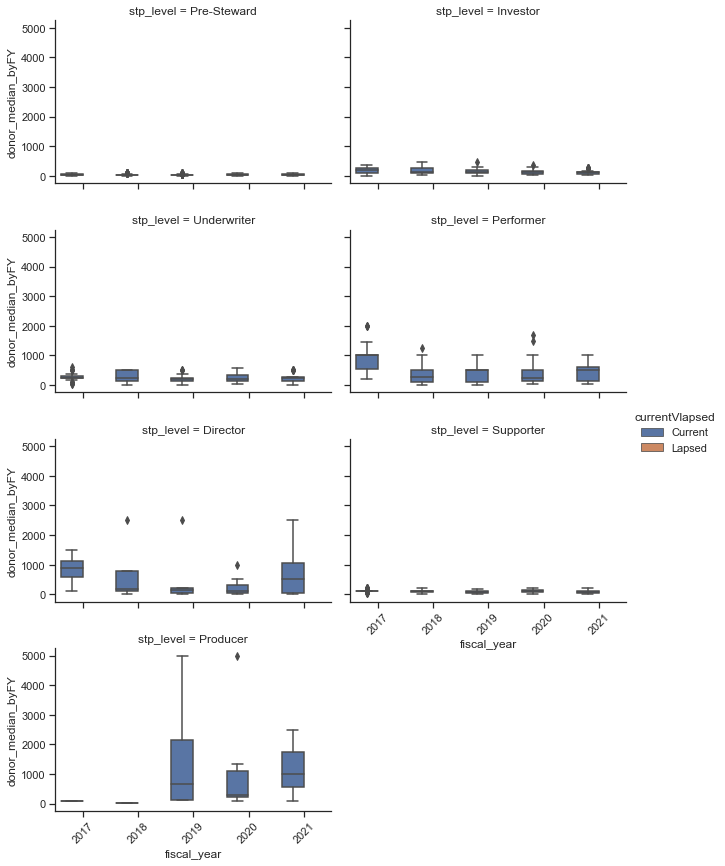

In [401]:
sns.set(style="ticks")
g = sns.catplot(x="fiscal_year", y="donor_median_byFY",
            hue='currentVlapsed', col='stp_level' , kind='box',
            col_wrap=2,
            data=donor_details[donor_details.stp_level != 'Did Not Give'],  height=3, aspect=1.5)
#plt.xticks(rotation=45)
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)


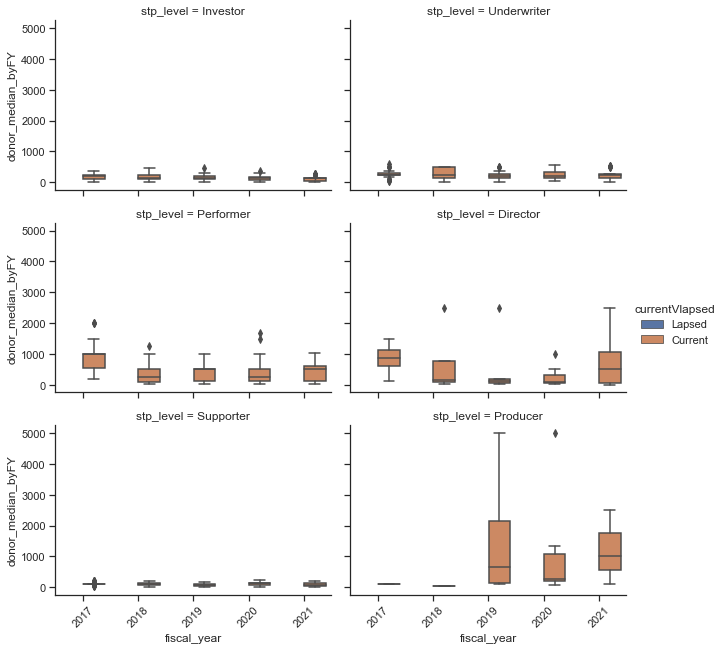

In [402]:
sns.set(style="ticks")
g = sns.catplot(x="fiscal_year", y="donor_median_byFY",
            hue='currentVlapsed', col='stp_level' , kind='box',
            col_wrap=2,
            data=donor_details.loc[donor_details.stp_level.isin(['Supporter', 'Investor', 'Underwriter', 'Performer', 'Director', 'Producer'])],  height=3, aspect=1.5)
#plt.xticks(rotation=45)
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)


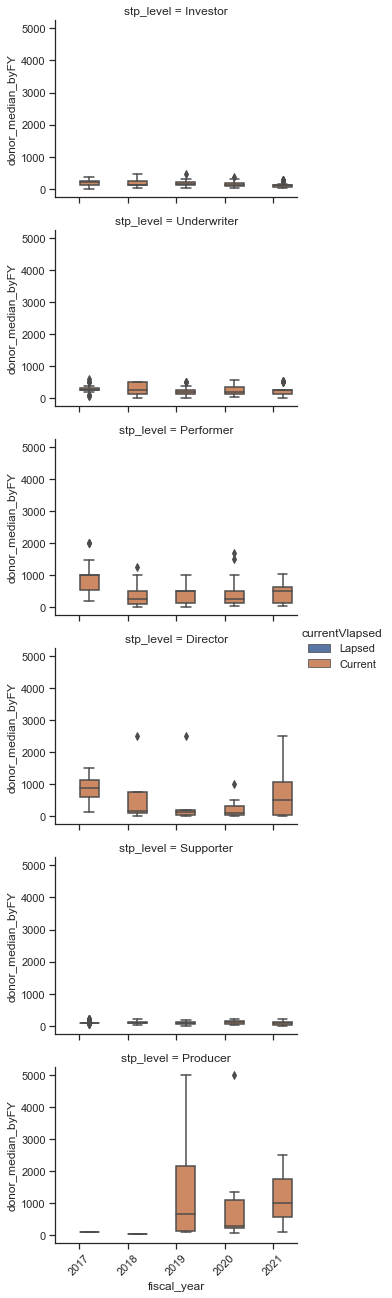

In [403]:
sns.set(style="ticks")
g = sns.catplot(x="fiscal_year", y="donor_median_byFY",
            hue='currentVlapsed', col='stp_level' , kind='box',
            col_wrap=1,
            data=donor_details.loc[donor_details.stp_level.isin(['Supporter', 'Investor', 'Underwriter', 'Performer', 'Director', 'Producer'])],  height=3, aspect=1.5)
#plt.xticks(rotation=45)
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

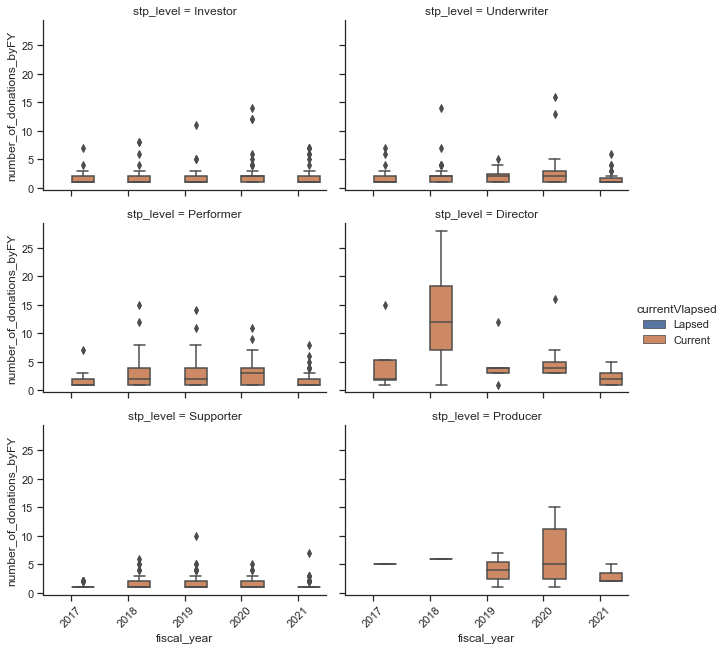

In [404]:
sns.set(style="ticks")
g = sns.catplot(x="fiscal_year", y="number_of_donations_byFY",
            hue='currentVlapsed', col='stp_level' , kind='box',
            col_wrap=2,
            data=donor_details.loc[donor_details.stp_level.isin(['Supporter', 'Investor', 'Underwriter', 'Performer', 'Director', 'Producer'])],  height=3, aspect=1.5)
#plt.xticks(rotation=45)
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

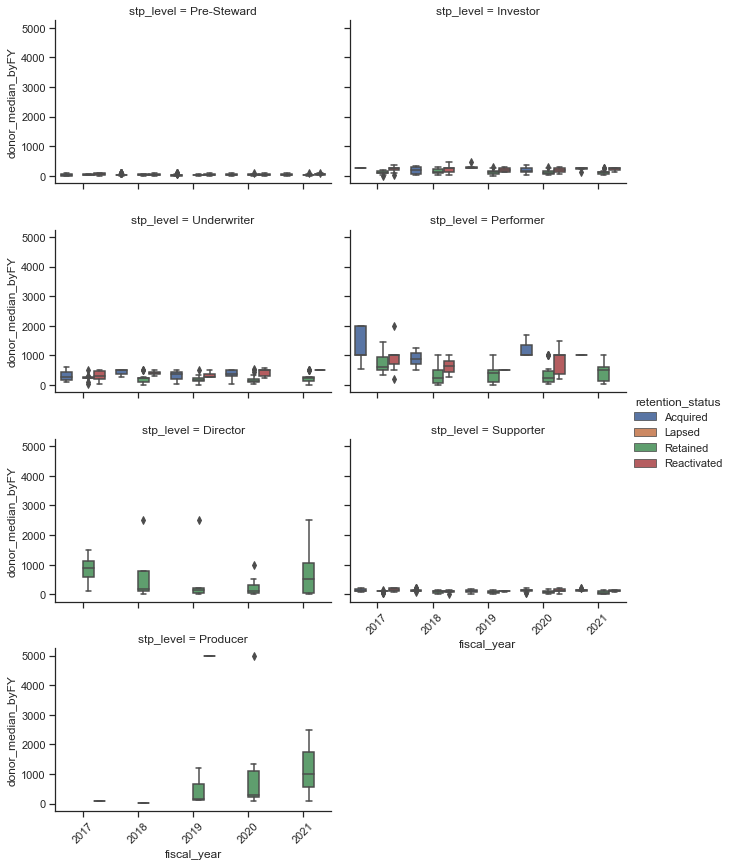

In [405]:
sns.set(style="ticks")
g = sns.catplot(x="fiscal_year", y="donor_median_byFY",
            hue='retention_status', col='stp_level' , kind='box',
            col_wrap=2,
            data=donor_details[donor_details.stp_level != 'Did Not Give'],  height=3, aspect=1.5)
#plt.xticks(rotation=45)
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)


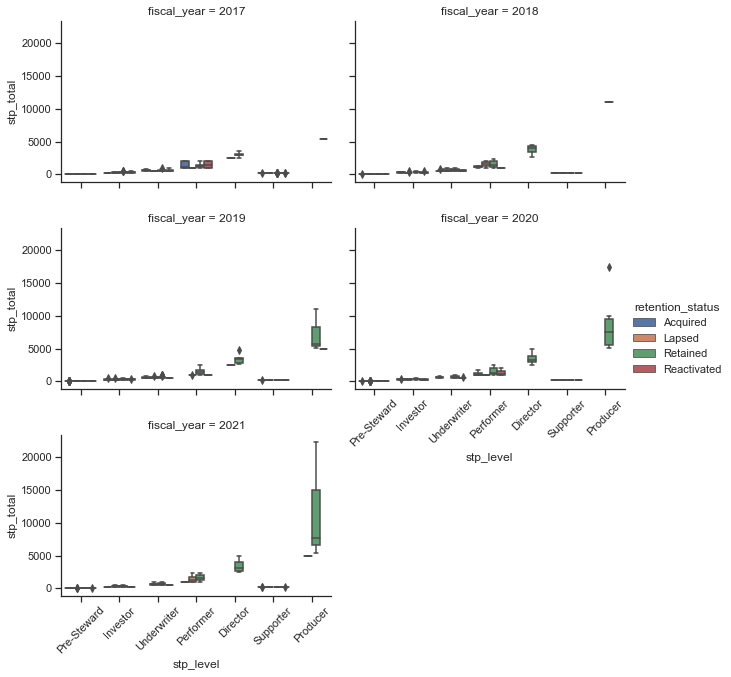

In [406]:
sns.set(style="ticks")
g = sns.catplot(x='stp_level', y="stp_total",
            hue='retention_status', col="fiscal_year", kind='box',
            col_wrap=2,
            data=donor_details[donor_details.stp_level != 'Did Not Give'],  height=3, aspect=1.5)
#plt.xticks(rotation=45)
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

In [407]:
stp_level_dist.iloc[:,0:5].T.set_index(pd.Index(['2017', '2018', '2019', '2020', '2021']))

Did Not Give  Pre-Steward  Supporter  Investor  Underwriter  Performer  \
2017          1191          231         44        44           25         21   
2018           924          434         78        48           39         34   
2019           821          494         99        61           37         40   
2020           468          753        118       104           50         54   
2021           510          698        143        93           60         42   

      Director  Producer  
2017         5         1  
2018         4         0  
2019         6         4  
2020         9         6  
2021        12         4

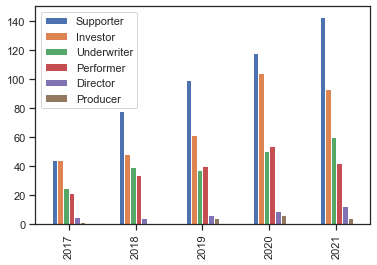

In [408]:
stp_level_dist.iloc[2:,0:5].T.set_index(pd.Index(['2017', '2018', '2019', '2020', '2021'])).plot(kind='bar', stacked=False)

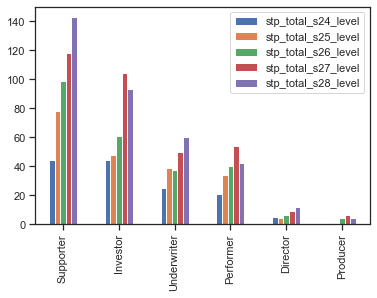

In [409]:
ax = stp_level_dist.iloc[2:,0:5].plot(kind='bar', stacked=False)

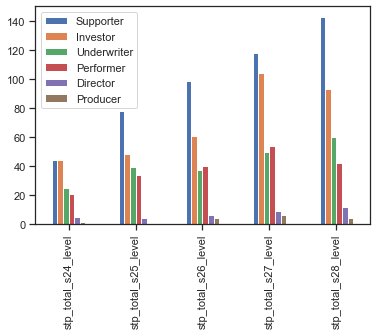

In [410]:
ax = stp_level_dist.iloc[2:,0:5].T.plot(kind='bar', stacked=False)

# Facet wrap w/ fiscal year

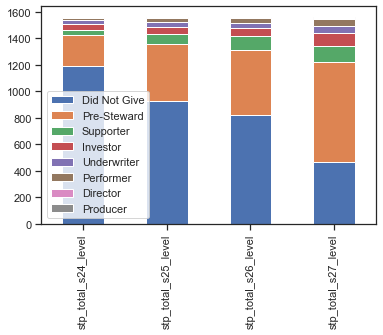

In [411]:
ax = stp_level_dist.T.iloc[0:4,:].plot(kind='bar', stacked=True)

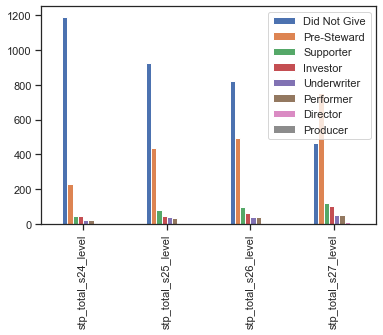

In [412]:
ax = stp_level_dist.T.iloc[0:4,:].plot(kind='bar', stacked=False)

In [413]:
stp_level_dist.T

Did Not Give  Pre-Steward  Supporter  Investor  \
stp_total_s24_level           1191          231         44        44   
stp_total_s25_level            924          434         78        48   
stp_total_s26_level            821          494         99        61   
stp_total_s27_level            468          753        118       104   
stp_total_s28_level            510          698        143        93   
stp_toDate_s24_level          1260          178         41        38   
stp_toDate_s25_level          1121          280         57        45   
stp_toDate_s26_level           959          403         80        47   
stp_toDate_s27_level           867          487         62        62   
stp_toDate_s28_level           510          698        143        93   

                      Underwriter  Performer  Director  Producer  
stp_total_s24_level            25         21         5         1  
stp_total_s25_level            39         34         4         0  
stp_total_s26_level            37         40         6         4  
stp_total_s27_level            50         54         9         6  
stp_total_s28_level            60         42        12         4  
stp_toDate_s24_level           26         16         3         0  
stp_toDate_s25_level           29         26         3         1  
stp_toDate_s26_level           39         27         5         2  
stp_toDate_s27_level           36         37         6         5  
stp_toDate_s28_level           60         42        12         4

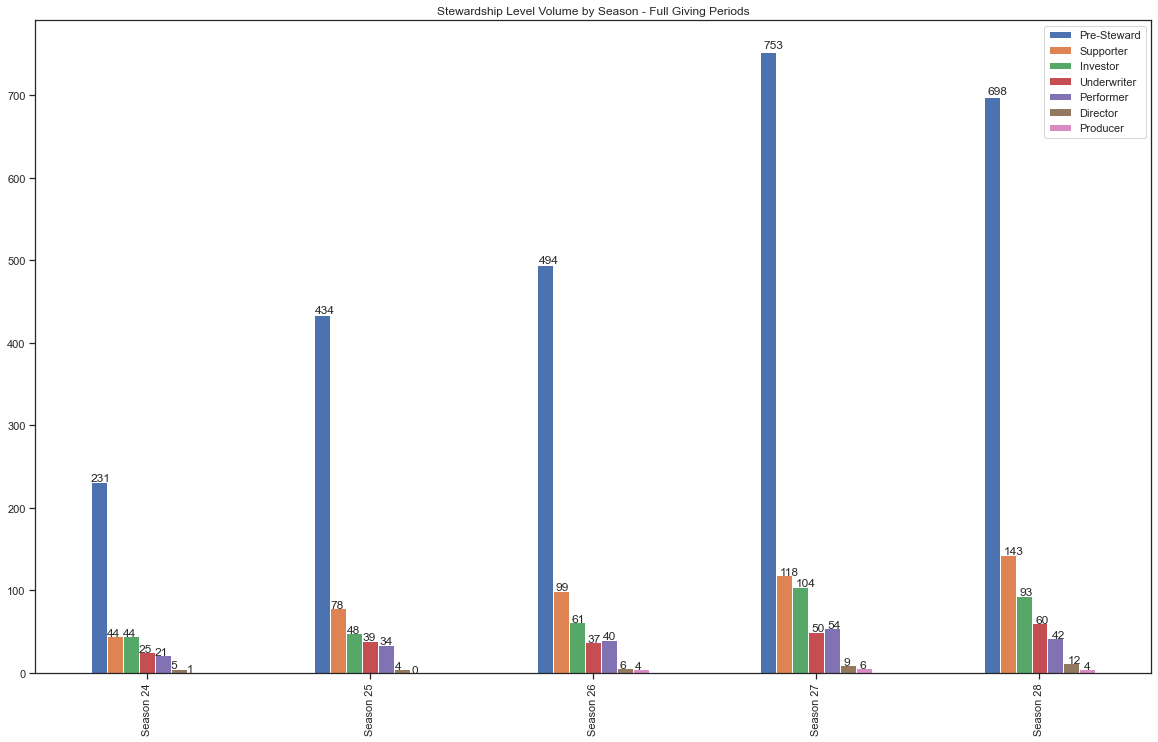

In [414]:
ax = stp_level_dist.T.iloc[:5,1:].set_index(pd.Index(['Season 24', 'Season 25', 'Season 26', 'Season 27', 'Season 28'])).plot(kind='bar', stacked=False, figsize=(20,12), title='Stewardship Level Volume by Season - Full Giving Periods')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# ADD DOLLAR AMOUNTS TO STEWARDSHIP PERIOD LEGENDS & ANNOTATE GIVING PERIOD UNDER REVIEW

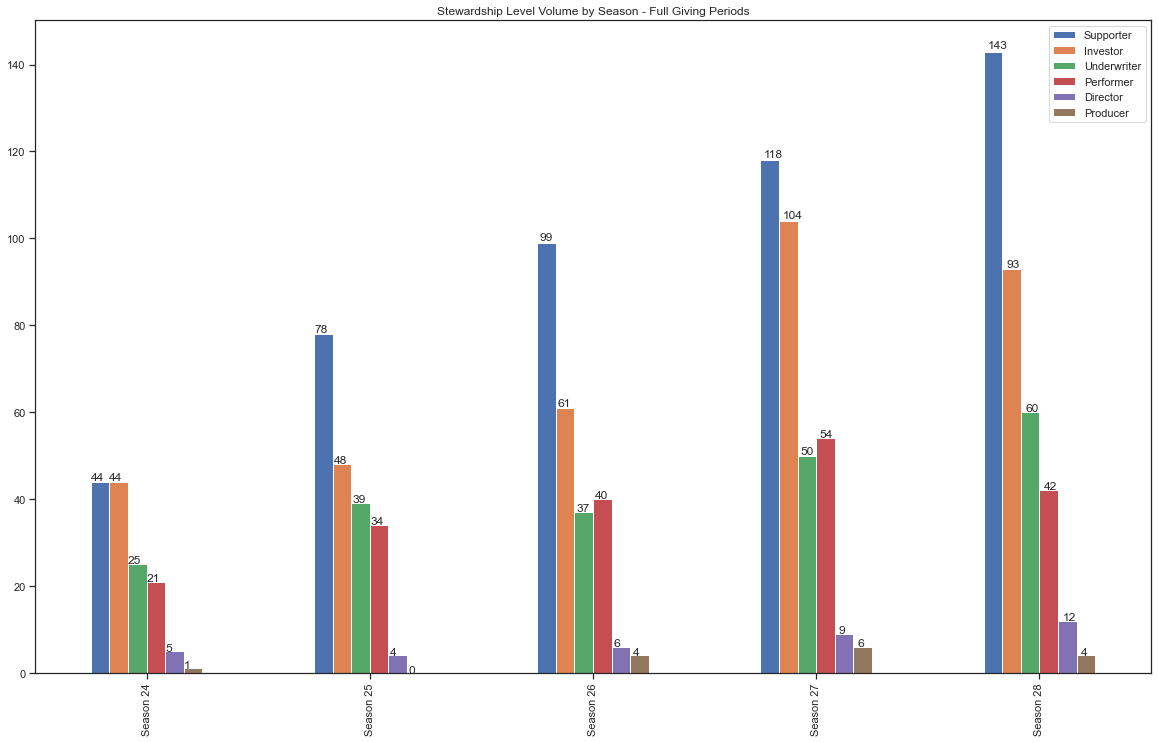

In [415]:
ax = stp_level_dist.T.iloc[:5,2:].set_index(pd.Index(['Season 24', 'Season 25', 'Season 26', 'Season 27', 'Season 28'])).plot(kind='bar', stacked=False, figsize=(20,12), title='Stewardship Level Volume by Season - Full Giving Periods')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

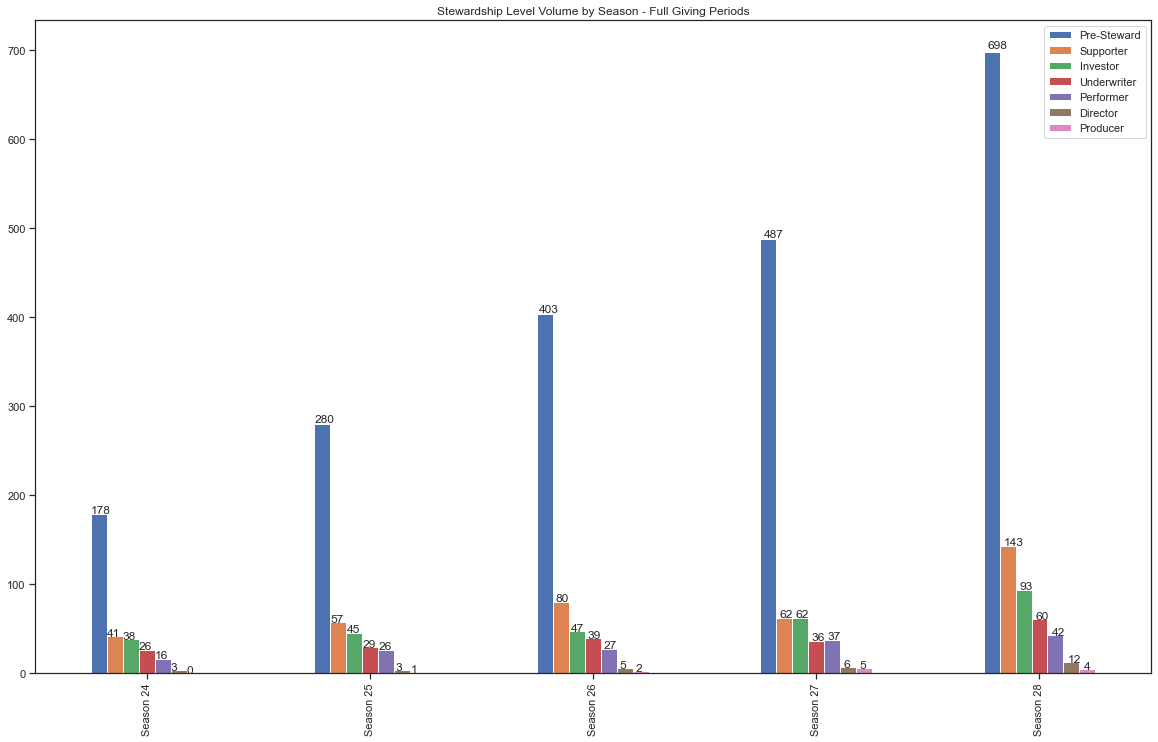

In [416]:
ax = stp_level_dist.T.iloc[5:,1:].set_index(pd.Index(['Season 24', 'Season 25', 'Season 26', 'Season 27', 'Season 28'])).plot(kind='bar', stacked=False, figsize=(20,12), title='Stewardship Level Volume by Season - Full Giving Periods')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

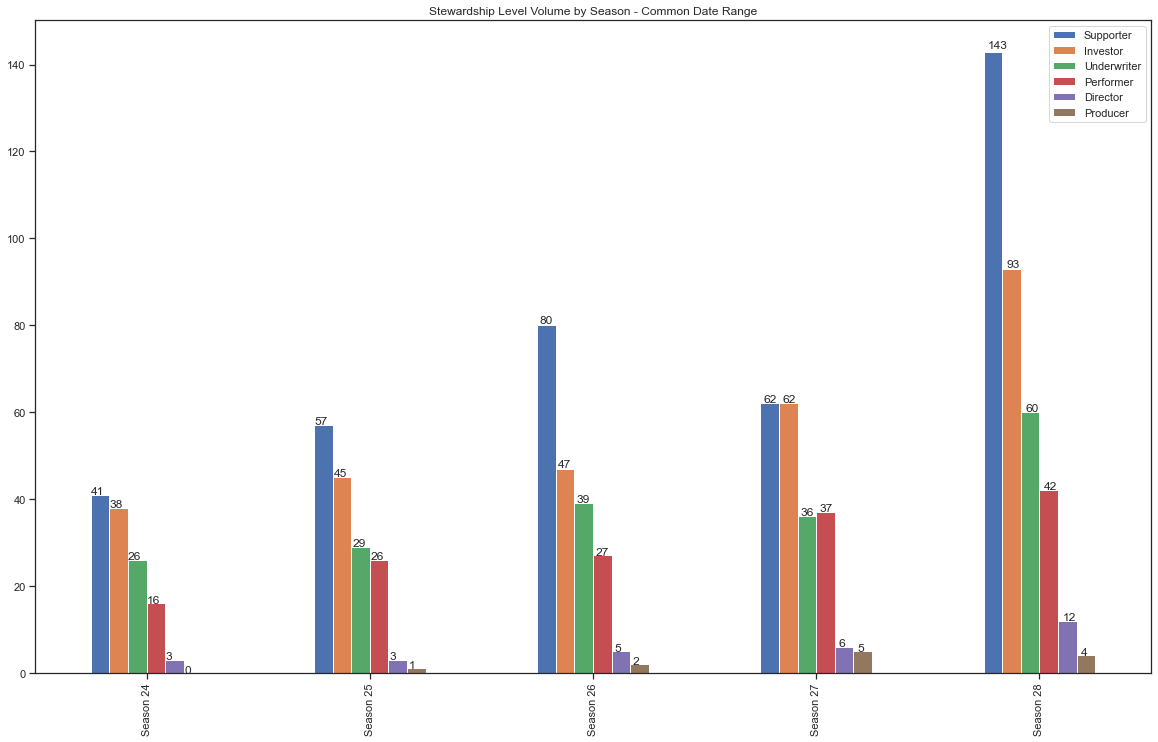

In [417]:
ax = stp_level_dist.T.iloc[5:,2:].set_index(pd.Index(['Season 24', 'Season 25', 'Season 26', 'Season 27', 'Season 28'])).plot(kind='bar', stacked=False, figsize=(20,12), title='Stewardship Level Volume by Season - Common Date Range')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

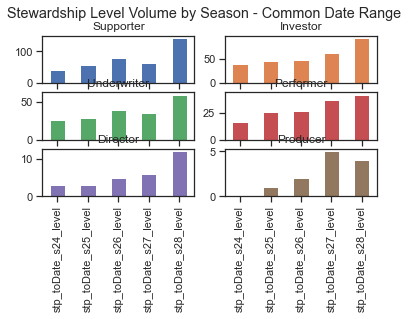

In [418]:
ax = stp_level_dist.T.iloc[5:,2:].plot(kind='bar', stacked=False, subplots=True, layout=(4,2), legend=False, title='Stewardship Level Volume by Season - Common Date Range')

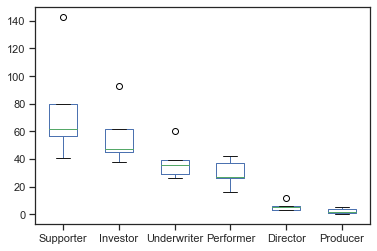

In [419]:
ax = stp_level_dist.T.iloc[5:,2:].plot(kind='box')

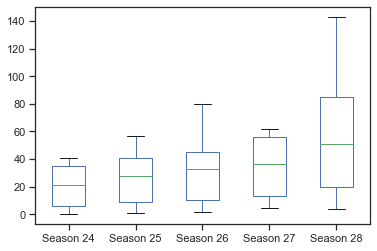

In [420]:
ax = stp_level_dist.T.iloc[5:,2:].set_index(pd.Index(['Season 24', 'Season 25', 'Season 26', 'Season 27', 'Season 28'])).T.plot(kind='box')


In [421]:
#Let's look specifically at the new stewardship total columns
aFund[['stp_total_s28', 'stp_total_s27', 'stp_total_s26', 'stp_total_s25']].sort_values(by='stp_total_s28')

stp_total_s28  stp_total_s27  stp_total_s26  stp_total_s25
532             0.0            0.0           10.0          10.00
566             0.0           10.5           10.5           0.00
567             0.0            0.0            2.0           2.00
568             0.0            0.0           20.0          20.00
569             0.0            0.0           16.5          16.50
...             ...            ...            ...            ...
3812        22277.0        17442.0        10981.0       11026.25
3813        22277.0        17442.0        10981.0       11026.25
3815        22277.0        17442.0        10981.0       11026.25
3808        22277.0        17442.0        10981.0       11026.25
3822        22277.0        17442.0        10981.0       11026.25

[4111 rows x 4 columns]

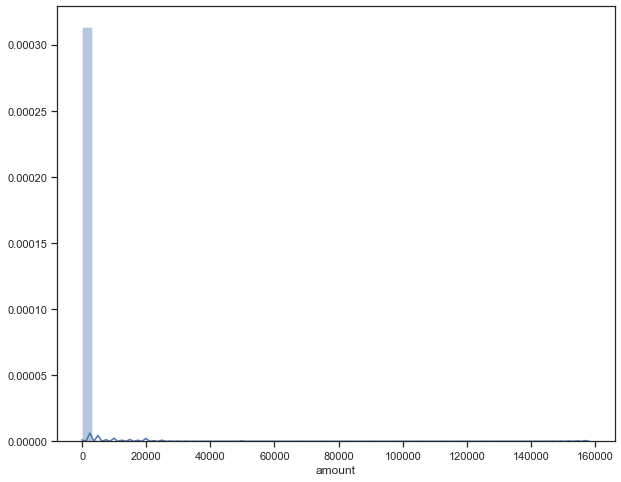

In [429]:
figure, ax = plt.subplots(1,1, figsize=(10,8), squeeze=False)

#See the distrubution of the data

sns.distplot(donations['amount'],ax= ax[0,0])
plt.show()

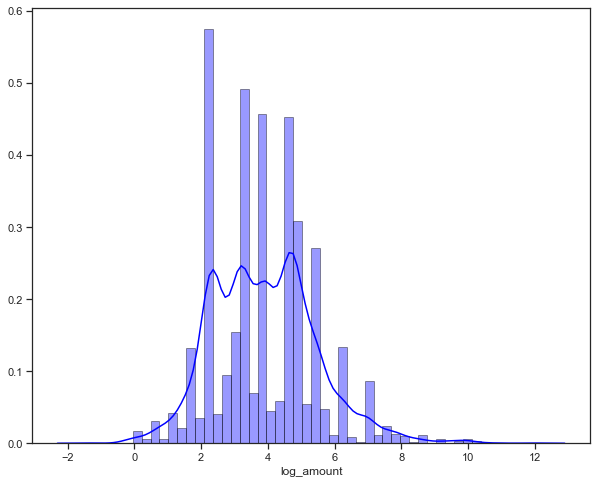

In [428]:
#Log transform the 'amount' column to address its skewness
donations['log_amount'] = np.log(donations['amount'])

figure, ax = plt.subplots(1,1, figsize=(10,8), squeeze=False)

#See the distrubution of the data

sns.distplot(donations['log_amount'], color = 'blue', hist=True,
             hist_kws={'edgecolor':'black'}, ax= ax[0,0])
plt.show()